In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math as mt
import os
import datetime as dt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)

In [2]:
os.getcwd()

'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/Codes python 2/4.5. Etiquetado de nuevos datos'

In [3]:
# creacion de variables con las rutas de ubicacion de los archivos y documentos para cambiar de directorio en la medida sea requerido
ruta_base = '/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS'
folder = '/BD procesada y sample/version 2'

In [4]:
print(ruta_base+folder)
nueva_ruta = ruta_base+folder
os.chdir(nueva_ruta)
print(os.getcwd())
os.listdir()

/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/version 2
/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/version 2


['df_preprocesado_target_real_knn_code2.csv',
 'df_feature_selection_code2.csv',
 'df_con_movil_diff_imputed.csv',
 'df_sample_imputed_knn_code2.csv',
 '.DS_Store',
 'df_cols_movil_and_diff_imputed_selected_reorded.csv',
 'df_cols_movil_and_diff_imputed_selected.csv',
 'df_preprocesado_target_real_knn.csv',
 'xgb_model_grid.json',
 'xgb_model_random_con_stomek.pkl',
 'xgb_model_random_enn.pkl',
 'df_cols_movil_and_diff_imputed_selected(antiguo).csv',
 'df_feature_selection.csv',
 'xgb_model_random.pkl',
 'df_sample_knn.csv',
 'xgb_model_grid.pkl',
 'xgb_model_random_con_enn.json',
 'xgb_model_grid_stomek.pkl',
 'xgb_model_grid_enn.pkl',
 'X_y_set_final.csv',
 'df_preprocesado_target_real_con_nan.csv',
 'df_set_final.csv',
 'df_con_target_and_cols_utils.csv',
 'df_clases.csv',
 'xgb_model_random.json',
 'df_sample_original_con_nan.csv',
 'df_preprocesado_target_real_code2.csv',
 'xgb_model_grid_enn.json']

## CARGA DEL CONJUNTO LIMPIO, MODIFICADO, IMPUTADO Y CON SELECCION DE ATRIBUTOS 

### (Incluye variables de varianza, desviacion y media movil para 9 dias)

In [5]:
df =  pd.read_csv('df_cols_movil_and_diff_imputed_selected.csv', sep=";", decimal=",", date_format='%Y-%m-%d')
print(df.shape, "Forma del df")
df.drop(columns=['Unnamed: 0','DIAS DE TRATAMIENTO','PERÍODO DE RESGUARDO LECHE','code_lac'], inplace=True)
df.shape

(876611, 42) Forma del df


(876611, 38)

In [7]:
df.sort_values(["N° de la Vaca","Nº de Lactancia","Fecha_dia","Hora inicio del ordeño en sgdos"], ascending=[True,True,True,True], inplace=True)
df.reset_index(drop=True, inplace=True)
df

Fecha_dia  edad_en_dias_al_ordeño  N° de la Vaca  Nº de Lactancia  \
0       2021-10-01                  2726.0        6281046              6.0   
1       2021-10-01                  2726.0        6281046              6.0   
2       2021-10-02                  2727.0        6281046              6.0   
3       2021-10-02                  2727.0        6281046              6.0   
4       2021-10-03                  2728.0        6281046              6.0   
...            ...                     ...            ...              ...   
876606  2024-03-08                   825.0       19444667              1.0   
876607  2024-03-09                   826.0       19444667              1.0   
876608  2024-03-09                   826.0       19444667              1.0   
876609  2024-03-10                   827.0       19444667              1.0   
876610  2024-03-10                   827.0       19444667              1.0   

        dias_en_leche Fecha del Ultimo Parto_lac Modo del Ultimo  Parto  \
0                 6.0                 2021-09-25                  Facil   
1                 6.0                 2021-09-25                  Facil   
2                 7.0                 2021-09-25                  Facil   
3                 7.0                 2021-09-25                  Facil   
4                 8.0                 2021-09-25                  Facil   
...               ...                        ...                    ...   
876606          129.0                 2023-10-31                  Facil   
876607          130.0                 2023-10-31                  Facil   
876608          130.0                 2023-10-31                  Facil   
876609          131.0                 2023-10-31                  Facil   
876610          131.0                 2023-10-31                  Facil   

         Turno  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0       Manana                 46824.528                          18751.0   
1        Tarde                 47342.993                          18752.0   
2       Manana                 47232.164                          18759.0   
3        Tarde                 46752.614                          18768.0   
4       Manana                 47615.811                          18773.0   
...        ...                       ...                              ...   
876606   Tarde                 49136.000                          24118.0   
876607  Manana                 49411.480                          24424.0   
876608   Tarde                 46457.000                          24427.0   
876609  Manana                 49957.990                          24436.0   
876610   Tarde                 49040.000                          24437.0   

        Porduccion del Turno  \
0                     17.950   
1                     15.830   
2                     12.510   
3                     14.140   
4                     14.790   
...                      ...   
876606                 8.980   
876607                 8.606   
876608                 8.667   
876609                 8.031   
876610                11.764   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                   6.372                               
1                                                  -1.220                               
2                                                   6.098                               
3                                                  -0.396                               
4                                                   1.027                               
...                                                   ...                               
876606                                             -1.833                               
876607                                             -2.430                               
876608                                             -1.144   

In [9]:
df[["Target_y","TIPO DE EVENTO"]].value_counts()

Target_y  TIPO DE EVENTO
0         desconocido       857888
2         dias_previos       12568
1         pre_clinico         2766
          pos_clinico         2318
          clinico             1071
Name: count, dtype: int64

In [10]:
#SELECCION DE LAS COLUMNAS NUMERICAS DEL DATASET
cols_flaot_int = list(df.select_dtypes(include=['float', "int"]).columns)
cols_delete = ['edad_en_dias_al_ordeño',"N° de la Vaca","Nº de Lactancia","dias_en_leche","Target_y"]
cols_flaot_int = [x for x in cols_flaot_int if x not in cols_delete]
print(len(cols_flaot_int), ":q de columnas numericas")
cols_flaot_int  

28 :q de columnas numericas


['lapso_sgdos_a_ordeña_ant',
 'Hora inicio del ordeño en sgdos',
 'Porduccion del Turno',
 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal',
 'Porcentaje de leche a los 2 minutos',
 'duracion en sgdos total ordeño',
 'Flujo Pico leche durante el ordeño',
 'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos',
 'Eventos de Salud del sistema enlos ultimos 365 dias',
 'Indice de Salud de Vacas en Ordeño',
 'Leche Diaria_mean_movil',
 'Actividad Diaria_mean_movil',
 'Ruminacion Diaria_mean_movil',
 'Coductividad Maxima 1_mean_movil',
 'sgdos al Pico de leche durante el Tiempo de ordeño_mean_movil',
 'Flujo a los 15 segundos_mean_movil',
 'Leche Diaria_std_movil',
 'Actividad Diaria_std_movil',
 'Ruminacion Diaria_std_movil',
 'Coductividad Maxima 1_std_movil',
 'sgdos al Pico de leche durante el Tiempo de ordeño_std_movil',
 'Flujo a los 15 segundos_std_movil',
 'diff_Leche Diaria_mean_movil',
 'diff_Actividad Diaria_mean_mov

In [11]:
print("Visualización de los valores nulos en las columnas numericas. Se observa que no hay NaN's")
(df[cols_flaot_int].isna().sum() / df.shape[0]*100).sort_values(ascending=False).head(30)

Visualización de los valores nulos en las columnas numericas. Se observa que no hay NaN's


lapso_sgdos_a_ordeña_ant                                                                 0.0
Hora inicio del ordeño en sgdos                                                          0.0
diff_Actividad Diaria_var_movil                                                          0.0
diff_Leche Diaria_var_movil                                                              0.0
diff_sgdos al Pico de leche durante el Tiempo de ordeño_mean_movil                       0.0
diff_Actividad Diaria_mean_movil                                                         0.0
diff_Leche Diaria_mean_movil                                                             0.0
Flujo a los 15 segundos_std_movil                                                        0.0
sgdos al Pico de leche durante el Tiempo de ordeño_std_movil                             0.0
Coductividad Maxima 1_std_movil                                                          0.0
Ruminacion Diaria_std_movil                                           

In [12]:
print("Distribución porcentual y absoluta de la variable Target_y")
print(df["Target_y"].value_counts() / df.shape[0]*100)
print(df["Target_y"].value_counts())

Distribución porcentual y absoluta de la variable Target_y
Target_y
0    97.864161
2     1.433703
1     0.702136
Name: count, dtype: float64
Target_y
0    857888
2     12568
1      6155
Name: count, dtype: int64


### CREACION DE UN DATASET CON LAS ETIQUETAS ORIGINALES

In [13]:
#Creacion de una copia del set original
df_original = df.copy()
print(df.shape, ": Forma del df")
print(df_original.shape, ": Forma del df original")

(876611, 38) : Forma del df
(876611, 38) : Forma del df original


In [14]:
#Exportacion del dataset para conservar una copia de seguridad del dataset original y procesos
df.reset_index().to_csv('df_cols_movil_and_diff_imputed_selected_reorded.csv', sep=";", decimal=",", index=False, date_format='%Y-%m-%d', float_format='%.3f')

In [15]:
#Creacion de un set copia del original solo con las columnas numericas
df_int_float = df[cols_flaot_int].copy()
print(df_int_float.shape, "Forma del df_int_float")

(876611, 28) Forma del df_int_float


In [16]:
#Normalizacion del set con solo las variables numericas
scaler = MinMaxScaler()
df_int_float_scaled = scaler.fit_transform(df_int_float)
print(df_int_float_scaled.shape, "Forma del df_int_float_scaled")

(876611, 28) Forma del df_int_float_scaled


In [17]:
df_int_float_scaled = pd.DataFrame(df_int_float_scaled, columns=cols_flaot_int)
df_int_float_scaled["Target_y"] = df["Target_y"]
print(df_int_float_scaled.shape, "Forma del df_int_float_scaled con el target")
df_int_float_scaled

(876611, 29) Forma del df_int_float_scaled con el target


lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0                       0.613985                         0.011364   
1                       0.629175                         0.011379   
2                       0.625928                         0.011485   
3                       0.611878                         0.011621   
4                       0.637168                         0.011697   
...                          ...                              ...   
876606                  0.681706                         0.092574   
876607                  0.689777                         0.097204   
876608                  0.603217                         0.097249   
876609                  0.705789                         0.097385   
876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                                                0.439576                                       
1                            

In [18]:
df_int_float_scaled["Target_y"].value_counts()

Target_y
0    857888
2     12568
1      6155
Name: count, dtype: int64

In [19]:
#CREACION DE UN SET CON SOLO LAS CLASES DE INTERES (1=CLINICO, 2=PREVIO A CLINICO)
clase_menor = df_int_float_scaled[df_int_float_scaled["Target_y"]==1]
clase_medio = df_int_float_scaled[df_int_float_scaled["Target_y"]==2]
df_clases = pd.concat([clase_menor, clase_medio], axis=0)
#n_clase_mayor = int(clase_medio.shape[0])
#print(n_clase_mayor,": n_clase_mayor")
#clase_mayor = df_int_float_scaled[df_int_float_scaled["Target_y"]==0].sample(n_clase_mayor)
#df_clases = pd.concat([clase_menor, clase_medio, clase_mayor], axis=0)

print(df_clases.shape)
df_clases["Target_y"].value_counts()

(18723, 29)


Target_y
2    12568
1     6155
Name: count, dtype: int64

In [20]:
#Modificación del codigo del Target para que sea 0 y 1
df_clases["Target_y"].replace(2, 0, inplace=True)
df_clases["Target_y"].value_counts()

/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_29784/371566816.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clases["Target_y"].replace(2, 0, inplace=True)


Target_y
0    12568
1     6155
Name: count, dtype: int64

### REDUCCION DE LA DIMENSIONALIDAD (solo para observacion y analisis del conjunto etiquetado)

In [23]:
print("VISUALIZACION DE INDICES AL AZAR PARA CORROBORAR LA CONSISTENCIA DE LOS DATOS Y SU UBICACION")
indices = df_clases.sample(5).index
print(len(indices), ": cantidad de indices", indices)
print("")
df_int_float_scaled.loc[indices]

VISUALIZACION DE INDICES AL AZAR PARA CORROBORAR LA CONSISTENCIA DE LOS DATOS Y SU UBICACION
5 : cantidad de indices Index([773456, 157227, 835012, 833674, 46577], dtype='int64')



lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
773456                  0.277628                         0.658894   
157227                  0.195089                         0.844147   
835012                  0.723134                         0.337066   
833674                  0.336371                         0.583026   
46577                   0.337191                         0.909938   

        Porduccion del Turno  \
773456              0.261123   
157227              0.124294   
835012              0.406144   
833674              0.261864   
46577               0.235523   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
773456                                           0.433455                               
157227                                           0.469387                               
835012                                           0.546300                               
833674                                           0.564087                               
46577                                            0.461030                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
773456                                 0.57                        0.311083   
157227                                 0.98                        0.175063   
835012                                 0.37                        0.772040   
833674                                 0.90                        0.279597   
46577                                  0.54                        0.283375   

        Flujo Pico leche durante el ordeño  \
773456                            0.329032   
157227                            0.380645   
835012                            0.445161   
833674                            0.554839   
46577                             0.290323   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
773456                                           0.473539                                       
157227                                           0.504889                                       
835012                                           0.377323                                       
833674                                           0.426961                                       
46577                                            0.443196                                       

        Eventos de Salud del sistema enlos ultimos 365 dias  \
773456                                           0.000000     
157227                                           0.130435     
835012                                           0.000000     
833674                                           0.000000     
46577                                            0.086957     

        Indice de Salud de Vacas en Ordeño  Leche Diaria_mean_movil  \
773456                            0.723908                 0.357087   
157227                            0.948205                 0.656643   
835012                            0.540220                 0.376676   
833674                            0.546348                 0.272530   
46577                             0.945822                 0.714541   

        Actividad Diaria_mean_movil  Ruminacion Diaria_mean_movil  \
773456                     0.406954                      0.591975   
157227                     0.422290                      0.605138   
835012                     0.401840                      0.431463   
833674                     0.467791                      0.542537   
46577                      0.558537                      0.338686   

        Coductividad Maxima 1_mean_movil  \
773456                          0.660267   
157227                          0.587200   
835012                          0.668267   
833674                          0.648533   
46577                           0.342222   

        sgdos al Pico de leche durante el Ti

In [24]:
df.loc[indices]

Fecha_dia  edad_en_dias_al_ordeño  N° de la Vaca  Nº de Lactancia  \
773456  2023-10-13                  1078.0       19444035              2.0   
157227  2023-09-09                  2217.0        6282494              5.0   
835012  2023-12-03                   848.0       19444378              1.0   
833674  2024-02-15                   923.0       19444372              1.0   
46577   2023-10-23                  2659.0        6281679              6.0   

        dias_en_leche Fecha del Ultimo Parto_lac Modo del Ultimo  Parto  \
773456            6.0                 2023-10-07                  Facil   
157227           18.0                 2023-08-22                  Facil   
835012          145.0                 2023-07-11                  Facil   
833674          175.0                 2023-08-24                  Facil   
46577            81.0                 2023-08-03             Leve Ayuda   

         Turno  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
773456   Tarde                 35344.000                          61545.0   
157227  Manana                 32526.788                          73788.0   
835012   Tarde                 50550.000                          40276.0   
833674  Manana                 37349.000                          56531.0   
46577   Manana                 37377.000                          78136.0   

        Porduccion del Turno  \
773456                 7.395   
157227                 3.520   
835012                11.502   
833674                 7.416   
46577                  6.670   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
773456                                             -1.257                               
157227                                             -0.453                               
835012                                              1.268                               
833674                                              1.666                               
46577                                              -0.640                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
773456                                 57.0                           247.0   
157227                                 98.0                           139.0   
835012                                 37.0                           613.0   
833674                                 90.0                           222.0   
46577                                  54.0                           225.0   

        Flujo Pico leche durante el ordeño  \
773456                                3.12   
157227                                3.60   
835012                                4.20   
833674                                5.22   
46577                                 2.76   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
773456                                              0.813                                       
157227                                              1.653                                       
835012                                             -1.765                                       
833674                                             -0.435                                       
46577                                              -0.000                                       

        Eventos de Salud del sistema enlos ultimos 365 dias  \
773456                                                0.0     
157227                                                3.0     
835012                                                0.0     
833674                                                0.0     
46577                                                 2.0     

        Indice de Salud de Vacas en Ordeño TIPO DE EVENTO  \
773456                              94.323    pre_clinico   
157227                              98.935   dias_previos   
8

In [25]:
df_clases.reset_index().to_csv('df_clases.csv', sep=";", decimal=",", index=False)

### Visualizacion de los grupos con PCA

(18723, 29) :forma del conjunto de datos normalizado
(18723, 2) :forma del conjunto de datos reducido por PCA
Varianza explicada por cada componente principal: [0.28396578 0.12172507]
Varianza total explicada: 0.40569085204155036


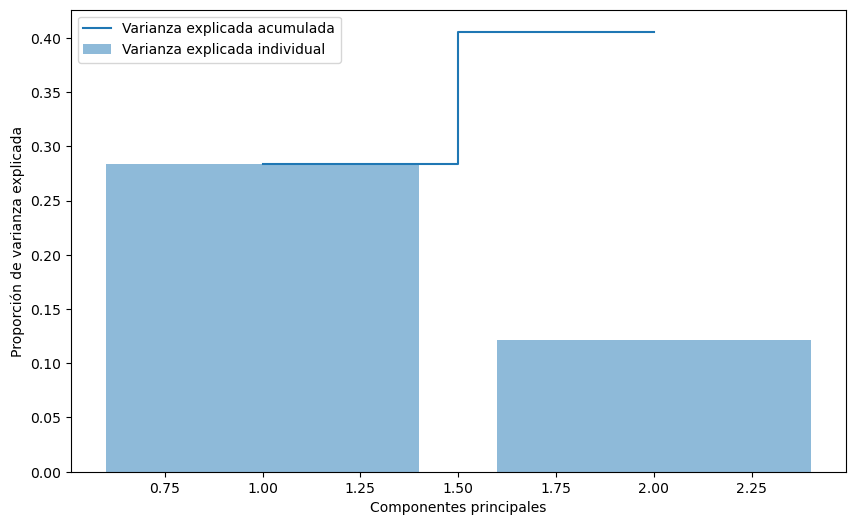

In [26]:
#Reducir la dimensionalidad de los datos
print(df_clases.shape, ":forma del conjunto de datos normalizado")
pca = PCA(n_components = 2)
X_scaled_pca = pca.fit_transform(df_clases.drop(columns=["Target_y"]))


#Crear un DataFrame con las componentes principales
X_pca_df = pd.DataFrame(data= X_scaled_pca, columns= [f"PCA{i}" for i in range(1, pca.n_components_ + 1)])
print(X_pca_df.shape, ":forma del conjunto de datos reducido por PCA")

#Analizar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

print(f'Varianza explicada por cada componente principal: {explained_variance}')
print(f'Varianza total explicada: {np.sum(explained_variance)}')

#Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Varianza explicada acumulada')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [27]:
X_pca_df["Target_y"] = df_clases["Target_y"].values
X_pca_df

PCA1      PCA2  Target_y
0      0.212514  0.460510         1
1      0.175333  0.335651         1
2      0.243948  0.307456         1
3     -0.195386 -0.444518         1
4      0.258209  0.284964         1
...         ...       ...       ...
18718 -0.189840 -0.591874         0
18719 -0.169617 -0.508663         0
18720 -0.296866 -0.073962         0
18721 -0.210954 -0.342423         0
18722 -0.346503  0.053293         0

[18723 rows x 3 columns]

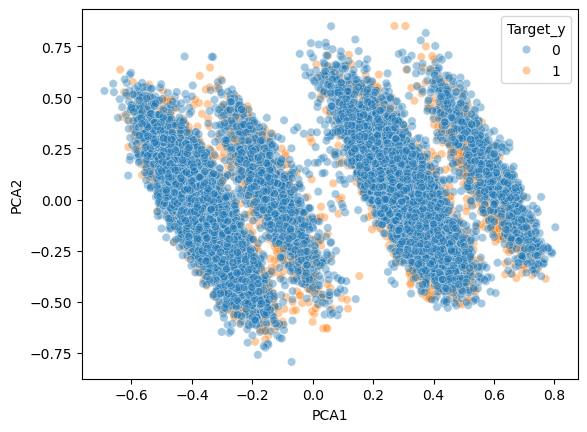

In [28]:
sns.scatterplot(data=X_pca_df, x="PCA1", y="PCA2", hue="Target_y", alpha=0.4)
plt.show()

### Visualizacion las grupos con TSNE (solo para observacion y analisis de patrones graficos)

In [29]:
print(df_clases.shape)
df_clases

(18723, 29)


lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
3829                    0.333997                         0.694075   
3830                    0.431501                         0.694120   
3831                    0.334730                         0.694256   
3832                    0.651676                         0.097521   
3833                    0.355180                         0.694332   
...                          ...                              ...   
875259                  0.797580                         0.138028   
875260                  0.695594                         0.138073   
875261                  0.684197                         0.138164   
875262                  0.708514                         0.138225   
875263                  0.734501                         0.138285   

        Porduccion del Turno  \
3829                0.345692   
3830                0.484110   
3831                0.409605   
3832                0.230862   
3833                0.340042   
...                      ...   
875259              0.258651   
875260              0.290007   
875261              0.314230   
875262              0.255438   
875263              0.240466   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
3829                                             0.707410                               
3830                                             0.435288                               
3831                                             0.467867                               
3832                                             0.422864                               
3833                                             0.542143                               
...                                                   ...                               
875259                                           0.461521                               
875260                                           0.551484                               
875261                                           0.352699                               
875262                                           0.474973                               
875263                                           0.392027                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
3829                                   0.20                        0.585642   
3830                                   0.28                        0.506297   
3831                                   0.30                        0.471033   
3832                                   0.78                        0.224181   
3833                                   0.33                        0.447103   
...                                     ...                             ...   
875259                                 0.92                        0.197733   
875260                                 0.88                        0.258186   
875261                                 0.38                        0.375315   
875262                                 0.62                        0.274559   
875263                                 0.24                        0.511335   

        Flujo Pico leche durante el ordeño  \
3829                              0.206452   
3830                              0.309677   
3831                              0.296774   
3832                              0.470968   
3833                              0.270968   
...                                    ...   
875259                            0.541935   
875260                            0.593548   
875261                            0.283871   
875262                            0.341935   
875263                            0.148387   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
3829                                             0.447115                                       
3830                         

In [30]:
# Reducción de dimensionalidad con t-SNE en 2 componentes
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform( df_clases.drop("Target_y", axis=1) )

print("Forma de X_tsne", X_tsne.shape)

Forma de X_tsne (18723, 2)


In [31]:
#Creacion de un DataFrame con las componentes principales
df_X_tsne = pd.DataFrame( X_tsne, columns=["tsne_1", "tsne_2"])
df_X_tsne["Target_y"] = df_clases["Target_y"].values
df_X_tsne

tsne_1     tsne_2  Target_y
0      23.531040  36.921108         1
1      31.975672  25.153913         1
2      32.200924  24.849661         1
3     -15.203431  21.039873         1
4      32.895008  25.305105         1
...          ...        ...       ...
18718 -47.543011  30.819843         0
18719 -48.284569  29.718647         0
18720 -23.737778   5.710598         0
18721 -36.472252  33.343071         0
18722 -22.652084   4.693437         0

[18723 rows x 3 columns]

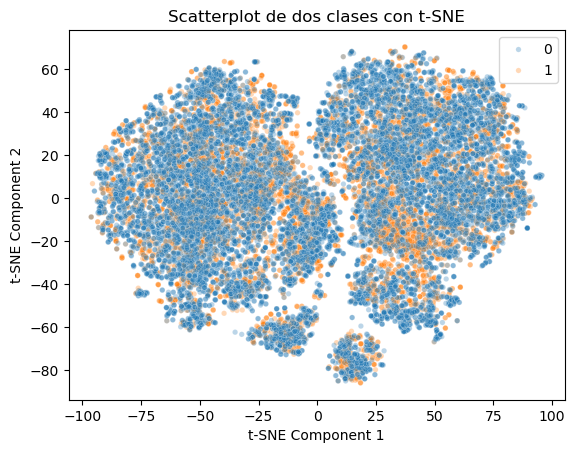

In [32]:
# Scatterplot de las dos clases con colores diferentes
sns.scatterplot( data = df_X_tsne, x="tsne_1", y="tsne_2", hue="Target_y", s= 15, alpha=0.3)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Scatterplot de dos clases con t-SNE')
plt.legend()
plt.show()

### Visualizacion de los grupos (etiquetas) con variables originales aleatorias

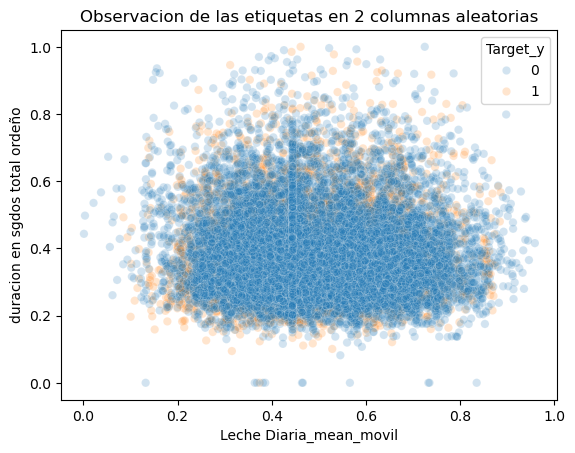

In [33]:
sns.scatterplot(data= df_clases, x="Leche Diaria_mean_movil", y="duracion en sgdos total ordeño", hue="Target_y", alpha=0.2)
plt.title("Observacion de las etiquetas en 2 columnas aleatorias")
plt.show()

## APLICACION DE CLUSTERING PARA EVALUACION DE LAS ETIQUETAS

In [34]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

### Clustering con dataset original (escalado)

In [35]:
print(df_clases.shape)
print(df_clases[cols_flaot_int].shape)

(18723, 29)
(18723, 28)


In [36]:
df_clases

lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
3829                    0.333997                         0.694075   
3830                    0.431501                         0.694120   
3831                    0.334730                         0.694256   
3832                    0.651676                         0.097521   
3833                    0.355180                         0.694332   
...                          ...                              ...   
875259                  0.797580                         0.138028   
875260                  0.695594                         0.138073   
875261                  0.684197                         0.138164   
875262                  0.708514                         0.138225   
875263                  0.734501                         0.138285   

        Porduccion del Turno  \
3829                0.345692   
3830                0.484110   
3831                0.409605   
3832                0.230862   
3833                0.340042   
...                      ...   
875259              0.258651   
875260              0.290007   
875261              0.314230   
875262              0.255438   
875263              0.240466   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
3829                                             0.707410                               
3830                                             0.435288                               
3831                                             0.467867                               
3832                                             0.422864                               
3833                                             0.542143                               
...                                                   ...                               
875259                                           0.461521                               
875260                                           0.551484                               
875261                                           0.352699                               
875262                                           0.474973                               
875263                                           0.392027                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
3829                                   0.20                        0.585642   
3830                                   0.28                        0.506297   
3831                                   0.30                        0.471033   
3832                                   0.78                        0.224181   
3833                                   0.33                        0.447103   
...                                     ...                             ...   
875259                                 0.92                        0.197733   
875260                                 0.88                        0.258186   
875261                                 0.38                        0.375315   
875262                                 0.62                        0.274559   
875263                                 0.24                        0.511335   

        Flujo Pico leche durante el ordeño  \
3829                              0.206452   
3830                              0.309677   
3831                              0.296774   
3832                              0.470968   
3833                              0.270968   
...                                    ...   
875259                            0.541935   
875260                            0.593548   
875261                            0.283871   
875262                            0.341935   
875263                            0.148387   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
3829                                             0.447115                                       
3830                         

In [37]:
#APLICACION DE CLUSTERING CON LOS HIPERPARAMETROS ENCONTRADOS

# Definir los estimadores de clustering
estimadores = {
    "KMeans": KMeans(n_clusters= 3, init='k-means++', n_init=10, random_state=11),
    "DBSCAN": DBSCAN(eps=0.45, min_samples=10),
    #"MeanShift": MeanShift( bandwidth=0.5),
    #"SpectralClustering": SpectralClustering(n_clusters=3, affinity='nearest_neighbors'),
    #"AgglomerativeClustering": AgglomerativeClustering(n_clusters=3, linkage='ward', )
}

# Aplicar los algoritmos de clustering
for nombre, estimador in estimadores.items():
    # Ajustar el estimador y predecir los clusters
    print(f"Aplicando {nombre}")
    clusters = estimador.fit_predict(df_clases[cols_flaot_int])
    
    # Añadir los clusters al DataFrame
    df_clases[f'cluster_{nombre}'] = clusters


Aplicando KMeans
Aplicando DBSCAN


In [38]:
#Observacion de la distribucion de las clases originales
print(df_clases["Target_y"].value_counts())
df_clases["Target_y"].value_counts() / df_clases.shape[0]*100

Target_y
0    12568
1     6155
Name: count, dtype: int64


Target_y
0    67.125995
1    32.874005
Name: count, dtype: float64

In [39]:
df_clases["cluster_KMeans"].value_counts()

cluster_KMeans
1    9080
0    4848
2    4795
Name: count, dtype: int64

In [40]:
(df_clases[["Target_y", "cluster_KMeans"]].value_counts()/ df_clases.shape[0]*100).reset_index().sort_values(["Target_y","cluster_KMeans"])

Target_y  cluster_KMeans      count
2         0               0  17.176734
0         0               1  32.030123
1         0               2  17.919137
4         1               0   8.716552
3         1               1  16.466378
5         1               2   7.691075

In [41]:
df_clases["cluster_DBSCAN"].value_counts() / df_clases.shape[0]*100

cluster_DBSCAN
 0    87.934626
-1    12.065374
Name: count, dtype: float64

In [42]:
(df_clases[["Target_y", "cluster_DBSCAN"]].value_counts()/ df_clases.shape[0]*100).reset_index().sort_values(["Target_y","cluster_DBSCAN"])

Target_y  cluster_DBSCAN      count
2         0              -1   7.028788
0         0               0  60.097207
3         1              -1   5.036586
1         1               0  27.837419

In [43]:
#CONCLUSION: Se probo con las etiquetas de los casos alrededor del dia del registro de tratamiento o diagnostico clinico (pre_clinico/clinico/pos_clinico)...
# , de además de estas mismas 3 etiquetas como clinicas y los 28 dias previos como otras etiquetas y el resultado es el mismo.
# tambien se realizo un analisis similar con 3 etiquetas como clinico = dia del tratamiento y dias previos y posteriores como unica etiqueta, 28 dias previos como otra etiqueta y un grupo aleatorio con el resto de las instancias como desconocido.
# En todos los casos es el mismo resultado distribuyendo una gran cantidad de datos en todas las etiquetas originales (25% aprox) no relacionandose con las etiquetas creadas por cluster.

In [44]:
#CONCLUSION: DB scan en varias combinaciones de "epsilon" y "min_samples" agrupa como cluster -1 un total de 99% de los datos varias veces, lo que no es optimo.
#En el caso con el set de datos no reducido por TSNE (o set original normalidad con 29 columnas) genera clusteres mas equilibrados, haciendo clusteres un poco mas claros.

### Reentrenamieto Clustering con los mejores parametros

In [45]:
#El set con los datos normalizados originales obtuvo mejor desempeño
df_clases

lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
3829                    0.333997                         0.694075   
3830                    0.431501                         0.694120   
3831                    0.334730                         0.694256   
3832                    0.651676                         0.097521   
3833                    0.355180                         0.694332   
...                          ...                              ...   
875259                  0.797580                         0.138028   
875260                  0.695594                         0.138073   
875261                  0.684197                         0.138164   
875262                  0.708514                         0.138225   
875263                  0.734501                         0.138285   

        Porduccion del Turno  \
3829                0.345692   
3830                0.484110   
3831                0.409605   
3832                0.230862   
3833                0.340042   
...                      ...   
875259              0.258651   
875260              0.290007   
875261              0.314230   
875262              0.255438   
875263              0.240466   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
3829                                             0.707410                               
3830                                             0.435288                               
3831                                             0.467867                               
3832                                             0.422864                               
3833                                             0.542143                               
...                                                   ...                               
875259                                           0.461521                               
875260                                           0.551484                               
875261                                           0.352699                               
875262                                           0.474973                               
875263                                           0.392027                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
3829                                   0.20                        0.585642   
3830                                   0.28                        0.506297   
3831                                   0.30                        0.471033   
3832                                   0.78                        0.224181   
3833                                   0.33                        0.447103   
...                                     ...                             ...   
875259                                 0.92                        0.197733   
875260                                 0.88                        0.258186   
875261                                 0.38                        0.375315   
875262                                 0.62                        0.274559   
875263                                 0.24                        0.511335   

        Flujo Pico leche durante el ordeño  \
3829                              0.206452   
3830                              0.309677   
3831                              0.296774   
3832                              0.470968   
3833                              0.270968   
...                                    ...   
875259                            0.541935   
875260                            0.593548   
875261                            0.283871   
875262                            0.341935   
875263                            0.148387   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
3829                                             0.447115                                       
3830                         

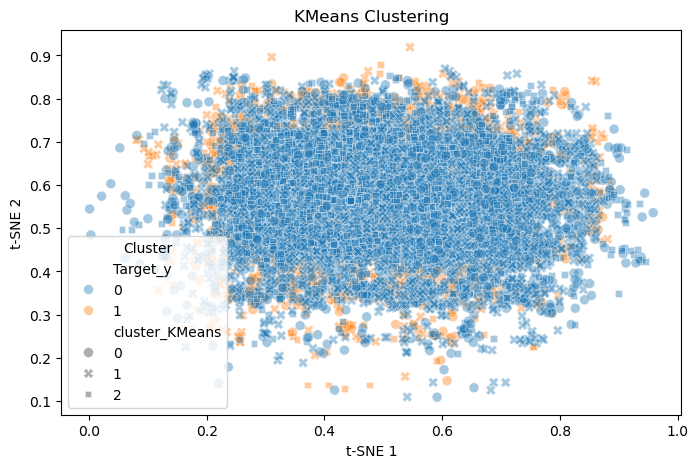

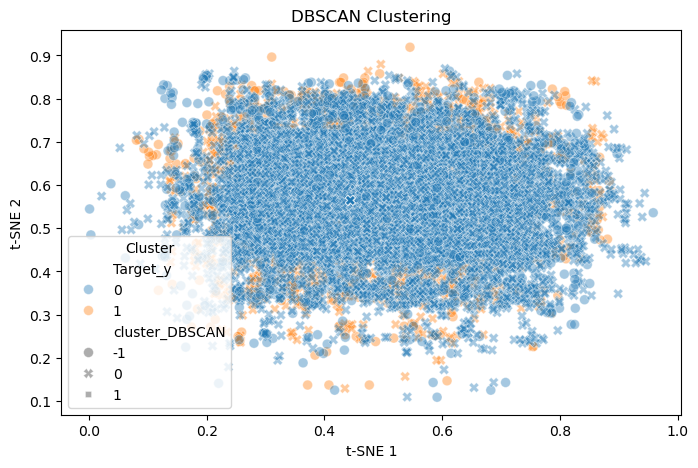

In [46]:
# Definir los estimadores de clustering
estimadores = {
    "KMeans": KMeans(n_clusters= 3, init='k-means++', n_init=10, random_state=22),
    "DBSCAN": DBSCAN(eps= 0.45, min_samples= 11, n_jobs=2)
}

# Aplicar los algoritmos de clustering
for nombre, estimador in estimadores.items():
    # Ajustar el estimador y predecir los clusters
    clusters = estimador.fit_predict(df_clases[cols_flaot_int])
    
    # Añadir los clusters al DataFrame
    df_clases[f'cluster_{nombre}'] = clusters

    # Visualizar los clusters
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='Leche Diaria_mean_movil', y='Coductividad Maxima 1_mean_movil', style=f'cluster_{nombre}', data= df_clases, palette='tab10', alpha=0.4, s=50, hue='Target_y')
    plt.title(f'{nombre} Clustering')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(title='Cluster')
    plt.show()

In [47]:
df_clases["cluster_DBSCAN"].value_counts() / df_clases.shape[0]*100

cluster_DBSCAN
 0    87.469957
-1    12.503338
 1     0.026705
Name: count, dtype: float64

In [48]:
(df_clases[["Target_y", "cluster_DBSCAN"]].value_counts()/ df_clases.shape[0]*100).reset_index().sort_values(["Target_y","cluster_DBSCAN"])

Target_y  cluster_DBSCAN      count
2         0              -1   7.306521
0         0               0  59.798109
4         0               1   0.021364
3         1              -1   5.196817
1         1               0  27.671847
5         1               1   0.005341

In [49]:
# CONCLUSION: DBSCAN parece identificar clusteres y porcentajes que coinciden con las categorias posibles: como son "enfermas o clinico" y "desconocido o dias previos, etc", pero en ninguna de las pruebas...
# logro coincidir con las etiquetas originales y sus proporciones

## SEPARACION DEL DATASET EN: set X y set Y (para clasificación)
#### (VARIABLES INDEPENDIENTES Y LA VARIABLE DEPENDIENTE)

In [51]:
df_clases

lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
3829                    0.333997                         0.694075   
3830                    0.431501                         0.694120   
3831                    0.334730                         0.694256   
3832                    0.651676                         0.097521   
3833                    0.355180                         0.694332   
...                          ...                              ...   
875259                  0.797580                         0.138028   
875260                  0.695594                         0.138073   
875261                  0.684197                         0.138164   
875262                  0.708514                         0.138225   
875263                  0.734501                         0.138285   

        Porduccion del Turno  \
3829                0.345692   
3830                0.484110   
3831                0.409605   
3832                0.230862   
3833                0.340042   
...                      ...   
875259              0.258651   
875260              0.290007   
875261              0.314230   
875262              0.255438   
875263              0.240466   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
3829                                             0.707410                               
3830                                             0.435288                               
3831                                             0.467867                               
3832                                             0.422864                               
3833                                             0.542143                               
...                                                   ...                               
875259                                           0.461521                               
875260                                           0.551484                               
875261                                           0.352699                               
875262                                           0.474973                               
875263                                           0.392027                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
3829                                   0.20                        0.585642   
3830                                   0.28                        0.506297   
3831                                   0.30                        0.471033   
3832                                   0.78                        0.224181   
3833                                   0.33                        0.447103   
...                                     ...                             ...   
875259                                 0.92                        0.197733   
875260                                 0.88                        0.258186   
875261                                 0.38                        0.375315   
875262                                 0.62                        0.274559   
875263                                 0.24                        0.511335   

        Flujo Pico leche durante el ordeño  \
3829                              0.206452   
3830                              0.309677   
3831                              0.296774   
3832                              0.470968   
3833                              0.270968   
...                                    ...   
875259                            0.541935   
875260                            0.593548   
875261                            0.283871   
875262                            0.341935   
875263                            0.148387   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
3829                                             0.447115                                       
3830                         

In [52]:
df_independientes = df_clases[cols_flaot_int].copy()
print(df_independientes.shape, "Forma de df_independientes")
df_dependiente = df_clases["Target_y"].copy()
print(df_dependiente.shape, "Forma de df_dependiente")

(18723, 28) Forma de df_independientes
(18723,) Forma de df_dependiente


In [53]:
print(df_dependiente.value_counts())
df_dependiente.value_counts() / df_dependiente.shape[0]*100

Target_y
0    12568
1     6155
Name: count, dtype: int64


Target_y
0    67.125995
1    32.874005
Name: count, dtype: float64

#### DIVISION DEL SET EN 2 GRUPOS (Uno para entrenar algoritmos de clasificacion y otro para probar en el final del proceso de SSL)

In [54]:
random_seed = 26

In [55]:
# Division de los datos en entrenamiento y prueba final (separar un set antes de sobre muestrear)
X_80, X_set_final, y_80, y_set_final = train_test_split( df_independientes, df_dependiente, test_size= 0.2, random_state= random_seed, stratify = df_dependiente)

#### Revision del set separado para pruebas al final del aprendizaje semi supervisado

In [58]:
print(X_set_final.shape, "Forma de X_set_final")
X_set_final.head()

(3745, 28) Forma de X_set_final


lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
234652                  0.663249                         0.012620   
499347                  0.775548                         0.363651   
845786                  0.132661                         0.855692   
815449                  0.620256                         0.037722   
684917                  0.667995                         0.148590   

        Porduccion del Turno  \
234652              0.312500   
499347              0.302260   
845786              0.498764   
815449              0.304590   
684917              0.635946   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
234652                                           0.440785                               
499347                                           0.479174                               
845786                                           0.532177                               
815449                                           0.439355                               
684917                                           0.554165                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
234652                                 0.61                        0.289673   
499347                                 0.64                        0.293451   
845786                                 0.38                        0.695214   
815449                                 0.49                        0.328715   
684917                                 0.21                        0.622166   

        Flujo Pico leche durante el ordeño  \
234652                            0.393548   
499347                            0.387097   
845786                            0.541935   
815449                            0.380645   
684917                            0.483871   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
234652                                           0.538889                                       
499347                                           0.426663                                       
845786                                           0.551504                                       
815449                                           0.421811                                       
684917                                           0.658506                                       

        Eventos de Salud del sistema enlos ultimos 365 dias  \
234652                                           0.173913     
499347                                           0.130435     
845786                                           0.000000     
815449                                           0.043478     
684917                                           0.086957     

        Indice de Salud de Vacas en Ordeño  Leche Diaria_mean_movil  \
234652                            0.904776                 0.588402   
499347                            0.578008                 0.673715   
845786                            1.000000                 0.482173   
815449                            0.910612                 0.568722   
684917                            1.000000                 0.334569   

        Actividad Diaria_mean_movil  Ruminacion Diaria_mean_movil  \
234652                     0.292689                      0.612200   
499347                     0.328475                      0.142538   
845786                     0.345603                      0.697273   
815449                     0.403374                      0.693098   
684917                     0.490031                      0.577208   

        Coductividad Maxima 1_mean_movil  \
234652                          0.339733   
499347                          0.703822   
845786                          0.506311   
815449                          0.658311   
684917                          0.547733   

        sgdos al Pico de leche durante el Ti

In [59]:
# EXPORTACIÓN DE LOS DATOS DE ENTRENAMIENTO Y PRUEBA FINAL
indices = X_set_final.index
print(len(indices), ": cantidad de indices")
print("")
X_set_final["Target_y"] = y_set_final.values
X_set_final.reset_index().to_csv("X_y_set_final.csv", sep=";", decimal=",", float_format='%.3f')
df.loc[indices].reset_index().to_csv("df_set_final.csv", sep=";", decimal=",", float_format='%.3f')
X_set_final.drop(columns=["Target_y"], inplace=True)
X_set_final

3745 : cantidad de indices



lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
234652                  0.663249                         0.012620   
499347                  0.775548                         0.363651   
845786                  0.132661                         0.855692   
815449                  0.620256                         0.037722   
684917                  0.667995                         0.148590   
...                          ...                              ...   
316593                  0.448025                         0.719677   
412486                  0.704852                         0.412541   
176105                  0.716571                         0.352197   
212043                  0.386617                         0.706316   
113561                  0.045588                         0.594480   

        Porduccion del Turno  \
234652              0.312500   
499347              0.302260   
845786              0.498764   
815449              0.304590   
684917              0.635946   
...                      ...   
316593              0.307910   
412486              0.338630   
176105              0.277542   
212043              0.235169   
113561              0.211511   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
234652                                           0.440785                               
499347                                           0.479174                               
845786                                           0.532177                               
815449                                           0.439355                               
684917                                           0.554165                               
...                                                   ...                               
316593                                           0.499732                               
412486                                           0.483643                               
176105                                           0.571997                               
212043                                           0.546702                               
113561                                           0.481632                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
234652                                 0.61                        0.289673   
499347                                 0.64                        0.293451   
845786                                 0.38                        0.695214   
815449                                 0.49                        0.328715   
684917                                 0.21                        0.622166   
...                                     ...                             ...   
316593                                 0.36                        0.376574   
412486                                 0.65                        0.343829   
176105                                 0.47                        0.536524   
212043                                 0.69                        0.268262   
113561                                 0.81                        0.207809   

        Flujo Pico leche durante el ordeño  \
234652                            0.393548   
499347                            0.387097   
845786                            0.541935   
815449                            0.380645   
684917                            0.483871   
...                                    ...   
316593                            0.290323   
412486                            0.483871   
176105                            0.361290   
212043                            0.341935   
113561                            0.380645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
234652                                           0.538889                                       
499347                       

In [60]:
print(y_set_final.shape, "Forma de y_set_final")
print(y_set_final.value_counts())
print(y_set_final.value_counts() / y_set_final.shape[0]*100)
y_set_final.head()

(3745,) Forma de y_set_final
Target_y
0    2514
1    1231
Name: count, dtype: int64
Target_y
0    67.129506
1    32.870494
Name: count, dtype: float64


234652    0
499347    0
845786    0
815449    0
684917    1
Name: Target_y, dtype: int64

#### Inicio del trabajo con el set separado que contiene el 80% de los datos

In [61]:
#Verificacion de las formas del set con el 80% de los datos originales para trabajarlos
print(X_80.shape, ": Forma de X_80")
print(y_80.shape, ": Forma de y_80")

(14978, 28) : Forma de X_80
(14978,) : Forma de y_80


In [62]:
#Observacion de la distribucion de las clases en el set con el 80% de los datos originales
y_80.value_counts() / y_80.shape[0] *100

Target_y
0    67.125117
1    32.874883
Name: count, dtype: float64

### MODELADO DE CLASIFICADORES PARA APRENDIZAJE SEMI SUPERVISADO

In [63]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [64]:
#Comprobación de la forma del set original y con las columnas int y float
print(X_80.shape)
print(X_80[cols_flaot_int].shape)

(14978, 28)
(14978, 28)


In [65]:
print(y_80.shape)
print(y_80.value_counts())
print(y_80.value_counts() / y_80.shape[0]*100)

(14978,)
Target_y
0    10054
1     4924
Name: count, dtype: int64
Target_y
0    67.125117
1    32.874883
Name: count, dtype: float64


In [68]:
size_test = 0.25
random_seed = 32

In [69]:
# Dividir en conjunto con el 80% en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_80, y_80, test_size = size_test, random_state= random_seed , stratify = y_80)

In [70]:
#Observacion de la distribucion de las clases en el set de entrenamiento
print(X_train.shape, y_train.shape, "Forma del set de entrenamiento")
print("")
print("y_train:")
print(y_train.value_counts())
print("y_train:")
y_train.value_counts() / y_train.shape[0] *100

(11233, 28) (11233,) Forma del set de entrenamiento

y_train:
Target_y
0    7540
1    3693
Name: count, dtype: int64
y_train:


Target_y
0    67.123654
1    32.876346
Name: count, dtype: float64

In [71]:
#Observacion de la distribucion de las clases en el set de prueba
print(X_test.shape, y_test.shape, "Forma del set de prueba")
print("")
print("y_test:")
print(y_test.value_counts())
print("y_test:")
y_test.value_counts() / y_test.shape[0] *100

(3745, 28) (3745,) Forma del set de prueba

y_test:
Target_y
0    2514
1    1231
Name: count, dtype: int64
y_test:


Target_y
0    67.129506
1    32.870494
Name: count, dtype: float64

#### EVALUACION DE ALGORITMOS DE CLASIFICACION PARA LUEGO OPTIMIZAR LOS MEJORES

In [72]:
# Definir algoritmos a probar
algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Label Propagation": LabelPropagation(),
    "Label Spreading": LabelSpreading()
}

# Resultados de evaluación
results = {}

for name, clf in algorithms.items():
    print("")
    print("============================================================================")
    print(f"Evaluando {name}...")
    
    # Para Label Propagation y Label Spreading, los datos necesitan ser semi-supervisados
    if name in ["Label Propagation", "Label Spreading"]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    else:
        # Entrenar el clasificador
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    #report = classification_report(y_test, y_pred, output_dict=True)
    
    results[name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "precision": precision,
        "recall": recall
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}\n")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}\n")

# Mostrar los resultados
results_df = pd.DataFrame(results).T


Evaluando Logistic Regression...
Logistic Regression - Accuracy: 0.7079, F1 Score: 0.6581

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81      2514
           1       0.66      0.23      0.34      1231

    accuracy                           0.71      3745
   macro avg       0.69      0.59      0.58      3745
weighted avg       0.70      0.71      0.66      3745



Evaluando Random Forest...
Random Forest - Accuracy: 0.7551, F1 Score: 0.7225

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      2514
           1       0.79      0.35      0.48      1231

    accuracy                           0.76      3745
   macro avg       0.77      0.65      0.66      3745
weighted avg       0.76      0.76      0.72      3745



Evaluando Gradient Boosting...
Gradient Boosting - Accuracy: 0.7356, F1 Score: 0.70

In [73]:
results_df.sort_values("F1 Score", ascending=False)

Accuracy  F1 Score  precision    recall
Random Forest              0.755140  0.722472   0.762322  0.755140
K-Nearest Neighbors        0.731642  0.712713   0.718437  0.731642
Gradient Boosting          0.735648  0.700956   0.732038  0.735648
Logistic Regression        0.707877  0.658053   0.695755  0.707877
Support Vector Classifier  0.717757  0.651384   0.743270  0.717757
Label Propagation          0.708411  0.634341   0.731006  0.708411
Label Spreading            0.705474  0.625989   0.734151  0.705474

#### ENTRENAMIENTO 0: CON EL MEJOR DE LOS CLASIFICADORES y el SET CON 80% CREADO

In [ ]:
import xgboost as xgb

In [75]:
print("y_train:", y_train.shape)
print(y_train.value_counts())
y_train.value_counts() / y_train.shape[0]*100

y_train: (11233,)
Target_y
0    7540
1    3693
Name: count, dtype: int64


Target_y
0    67.123654
1    32.876346
Name: count, dtype: float64

In [76]:
#Relacion existente entre una clase y otra clase
print(y_train[y_train==0].shape[0] /y_train[y_train==1].shape[0])

# Calcular scale_pos_weight
num_pos0 = np.sum(y_train == 1)
num_neg0 = np.sum(y_train == 0)
scale_pos_weight0 = num_neg0 / num_pos0
print(f'scale_pos_weight: {scale_pos_weight0}')

2.041700514486867
scale_pos_weight: 2.041700514486867


In [77]:
# Crear un clasificador con pesos de clase ajustados
# Configurar los parámetros de XGBoost
params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': 1,
    'eta': 0.01,
    'max_depth': 8,
    'eval_metric': 'map',
    'seed': random_seed
}

# Crear el DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Entrenar el modelo
model0 = xgb.train(params, dtrain, num_boost_round=2000)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2514
           1       0.83      0.54      0.65      1231

    accuracy                           0.81      3745
   macro avg       0.82      0.74      0.76      3745
weighted avg       0.82      0.81      0.80      3745

Accuracy: 0.8125500667556742


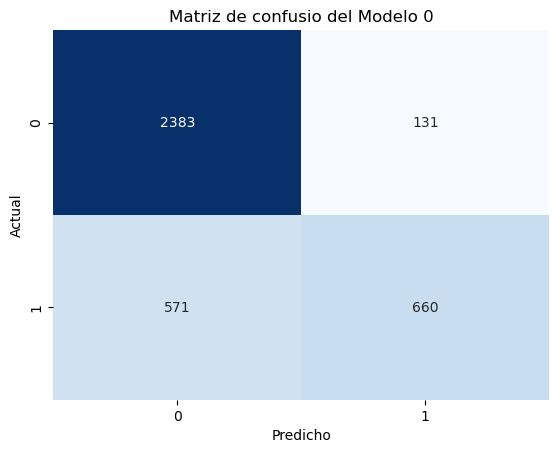

In [78]:
#PRIMER RESULTADO DEL MODELO 0 CON XGBOOST CON EL 80% DE LOS DATOS

# Predicciones en el conjunto de prueba
y_pred_prob0 = model0.predict(dtest)
y_pred0 = (y_pred_prob0 > 0.5).astype(int)
# Reporte de clasificación
classification_report0 = classification_report(y_test, y_pred0)
print(classification_report0)
# Precisión del modelo
accuracy0 = accuracy_score(y_test, y_pred0)
print('Accuracy:', accuracy0)

# Calcular la matriz de confusión
cm0 = confusion_matrix(y_test, y_pred0)

# Graficar la matriz de confusión
sns.heatmap(cm0 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusio del Modelo 0')
plt.show()

## TECNICAS DE SOBRE MUESTREO (para mejorar la predicción)

In [79]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, AllKNN
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import TomekLinks
from collections import Counter

1. Pipeline de Preprocesamiento

Puedes crear un pipeline de preprocesamiento que incluya tanto técnicas de submuestreo como de sobre muestreo. Por ejemplo, puedes aplicar SMOTE para sobre muestrear la clase minoritaria y luego aplicar NearMiss para submuestrear la clase mayoritaria.

2. Técnicas de Mezcla de Datos

Algunas técnicas híbridas combinan ejemplos sintéticos generados por sobre muestreo con ejemplos originales para formar un nuevo conjunto de datos. Por ejemplo, puedes generar ejemplos sintéticos con SMOTE y luego mezclarlos con ejemplos originales de la clase minoritaria.

3. Ensembles de Modelos

Puedes entrenar varios modelos en subconjuntos de datos generados por diferentes técnicas de muestreo y luego combinar las predicciones de estos modelos para hacer una predicción final. Esto se conoce como ensemble de modelos y puede ayudar a reducir el sesgo y la varianza del modelo.

4. Métodos Adaptativos

Algunos métodos de muestreo adaptativo ajustan dinámicamente la proporción de sobre muestreo y submuestreo en función de la dificultad del problema. Por ejemplo, puedes sobre muestrear más agresivamente cuando la clase minoritaria está muy subrepresentada y submuestrear cuando hay una proporción más equilibrada entre las clases.

No hay una regla estricta sobre qué técnica debe aplicarse primero, submuestreo o sobre muestreo. La elección entre submuestreo y sobre muestreo, y el orden en que se aplican, depende de la naturaleza del conjunto de datos y de los objetivos específicos del problema.

Aquí hay algunas consideraciones para decidir el orden:

Submuestreo primero:
Para conjuntos de datos grandes: Si tienes un conjunto de datos grande y la clase mayoritaria está muy sobre representada, el submuestreo primero puede reducir el tamaño del conjunto de datos y hacer que sea más eficiente de manejar.
Si la clase mayoritaria es muy grande: Si la clase mayoritaria es significativamente más grande que la clase minoritaria y hay una cantidad sustancial de ejemplos redundantes, el submuestreo primero puede ayudar a reducir la redundancia y mejorar la generalización del modelo.

Sobre muestreo primero:
Para conjuntos de datos pequeños: Si tienes un conjunto de datos pequeño y la clase minoritaria está muy subrepresentada, el sobre muestreo primero puede aumentar la cantidad de ejemplos de la clase minoritaria y ayudar al modelo a aprender patrones importantes.
Si la clase minoritaria es muy pequeña: Si la clase minoritaria es muy pequeña y corre el riesgo de ser ignorada por el modelo debido a su falta de ejemplos, el sobre muestreo primero puede ayudar a equilibrar las clases y evitar el sesgo del modelo hacia la clase mayoritaria.
Enfoques híbridos:
También puedes considerar enfoques híbridos donde combinas submuestreo y sobre muestreo en un pipeline de preprocesamiento. Por ejemplo, puedes aplicar una combinación de submuestreo y sobre muestreo en etapas secuenciales o paralelas y evaluar el rendimiento del modelo con diferentes configuraciones.

En resumen, la elección entre submuestreo y sobre muestreo primero depende de las características específicas del conjunto de datos y de los objetivos del problema. Experimenta con diferentes enfoques para determinar cuál funciona mejor para tu situación particular.

### BALANCE MEDIANTE SOBRE MUESTREO

In [82]:
print("Correspondencia de la clase mayoritaria con la minoritaria")
print(round(y_80[y_80==1].shape[0] / y_80[y_80==0].shape[0], 2),":de relacion")

Correspondencia de la clase mayoritaria con la minoritaria
0.49 :de relacion


In [83]:
# value_samples : Es el porcentaje al que se quiere llegar a representar respecto de la clase mayoritaria
# ej: 0.33 significa que se quiere alcanzar un 33% de la clase mayoritaria
value_samples = 0.75
value_samples

0.75

In [87]:
#El resultado es un nuevo conjunto de datos balanceado, donde se han añadido muestras sintéticas a la clase minoritaria para igualar el tamaño de la clase mayoritaria.

# Inicializar el algoritmo SMOTE
smote = SMOTE(sampling_strategy= value_samples, k_neighbors=5, random_state= random_seed)

# Aplicar SMOTE al conjunto de datos
X_smote, y_smote = smote.fit_resample(X_80, y_80)

print("X_smote:", X_smote.shape)
print("y_smote:", y_smote.shape)
print("")
print("y_smote value counts:", y_smote.value_counts())
print("")
print("y_smote value counts %:", y_smote.value_counts() / y_smote.shape[0]*100)
print("")
print("Porcentaje de relación:", y_smote[y_smote==1].shape[0] / y_smote[y_smote==0].shape[0])

X_smote: (17594, 28)
y_smote: (17594,)

y_smote value counts: Target_y
0    10054
1     7540
Name: count, dtype: int64

y_smote value counts %: Target_y
0    57.144481
1    42.855519
Name: count, dtype: float64

Porcentaje de relación: 0.7499502685498309


In [88]:
X_smote

lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0                      0.295295                         0.665522   
1                      0.388492                         0.666944   
2                      0.780089                         0.311206   
3                      0.280631                         0.908032   
4                      0.332650                         0.638361   
...                         ...                              ...   
17589                  0.668596                         0.220395   
17590                  0.799868                         0.348926   
17591                  0.635732                         0.054353   
17592                  0.288268                         0.901082   
17593                  0.260028                         0.807264   

       Porduccion del Turno  \
0                  0.336864   
1                  0.504944   
2                  0.276130   
3                  0.198093   
4                  0.348870   
...                     ...   
17589              0.342521   
17590              0.214173   
17591              0.650003   
17592              0.281763   
17593              0.186596   

       Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                               0.414819                               
1                                               0.280122                               
2                                               0.671076                               
3                                               0.170674                               
4                                               0.497721                               
...                                                  ...                               
17589                                           0.497044                               
17590                                           0.613950                               
17591                                           0.617951                               
17592                                           0.479864                               
17593                                           0.481466                               

       Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                 0.390000                        0.366499   
1                                 0.290000                        0.768262   
2                                 0.360000                        0.400504   
3                                 0.360000                        0.397985   
4                                 0.360000                        0.462217   
...                                    ...                             ...   
17589                             0.601688                        0.284708   
17590                             0.782482                        0.223596   
17591                             0.317721                        0.748567   
17592                             0.458887                        0.348131   
17593                             0.312120                        0.361914   

       Flujo Pico leche durante el ordeño  \
0                                0.322581   
1                                0.296774   
2                                0.464516   
3                                0.180645   
4                                0.329032   
...                                   ...   
17589                            0.462086   
17590                            0.401029   
17591                            0.449941   
17592                            0.306593   
17593                            0.221884   

       Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                                               0.446928                                       
1                                               0.613943                                  

In [89]:
y_smote

0        0
1        0
2        0
3        0
4        0
        ..
17589    1
17590    1
17591    1
17592    1
17593    1
Name: Target_y, Length: 17594, dtype: int64

In [90]:
set(X_smote)

{'Actividad Diaria_mean_movil',
 'Actividad Diaria_std_movil',
 'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos',
 'Coductividad Maxima 1_mean_movil',
 'Coductividad Maxima 1_std_movil',
 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal',
 'Eventos de Salud del sistema enlos ultimos 365 dias',
 'Flujo Pico leche durante el ordeño',
 'Flujo a los 15 segundos_mean_movil',
 'Flujo a los 15 segundos_std_movil',
 'Hora inicio del ordeño en sgdos',
 'Indice de Salud de Vacas en Ordeño',
 'Leche Diaria_mean_movil',
 'Leche Diaria_std_movil',
 'Porcentaje de leche a los 2 minutos',
 'Porduccion del Turno',
 'Ruminacion Diaria_mean_movil',
 'Ruminacion Diaria_std_movil',
 'diff_Actividad Diaria_mean_movil',
 'diff_Actividad Diaria_var_movil',
 'diff_Leche Diaria_mean_movil',
 'diff_Leche Diaria_var_movil',
 'diff_Ruminacion Diaria_var_movil',
 'diff_sgdos al Pico de leche durante el Tiempo de ordeño_mean_movil',
 'duracion en 

In [91]:
#SMOTE (Synthetic Minority Over-sampling Technique): Sobremuestrea la clase minoritaria generando nuevas muestras sintéticas.
#Tomek links: Submuestrea eliminando las muestras de la clase mayoritaria que están cerca de la frontera con la clase minoritaria.
#El resultado es un nuevo conjunto de datos balanceado, donde se han añadido muestras sintéticas a la clase minoritaria y...
#...se han eliminado las muestras de la clase mayoritaria que forman Tomek links con las muestras de la clase minoritaria.

# Inicializar el combinador SMOTE-Tomek
smt = SMOTETomek(random_state= random_seed , sampling_strategy= value_samples)

# Aplicar SMOTE-Tomek al conjunto de datos
X_STomek, y_STomek = smt.fit_resample(X_80, y_80) # No puede contener Nan

print("X_STomek:",X_STomek.shape)
print("y_STomek:",y_STomek.shape)
print("")
print("y_STomek value counts:",y_STomek.value_counts())
print("")
print("y_STomek value counts %:",y_STomek.value_counts() / y_STomek.shape[0]*100)
print("")
print("Porcentaje de relación:",y_STomek[y_STomek==1].shape[0] / y_STomek[y_STomek==0].shape[0])

X_STomek: (17256, 28)
y_STomek: (17256,)

y_STomek value counts: Target_y
0    9885
1    7371
Name: count, dtype: int64

y_STomek value counts %: Target_y
0    57.284423
1    42.715577
Name: count, dtype: float64

Porcentaje de relación: 0.7456752655538695


In [92]:
X_STomek

lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0                      0.295295                         0.665522   
1                      0.388492                         0.666944   
2                      0.780089                         0.311206   
3                      0.280631                         0.908032   
4                      0.332650                         0.638361   
...                         ...                              ...   
17251                  0.668596                         0.220395   
17252                  0.799868                         0.348926   
17253                  0.635732                         0.054353   
17254                  0.288268                         0.901082   
17255                  0.260028                         0.807264   

       Porduccion del Turno  \
0                  0.336864   
1                  0.504944   
2                  0.276130   
3                  0.198093   
4                  0.348870   
...                     ...   
17251              0.342521   
17252              0.214173   
17253              0.650003   
17254              0.281763   
17255              0.186596   

       Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                               0.414819                               
1                                               0.280122                               
2                                               0.671076                               
3                                               0.170674                               
4                                               0.497721                               
...                                                  ...                               
17251                                           0.497044                               
17252                                           0.613950                               
17253                                           0.617951                               
17254                                           0.479864                               
17255                                           0.481466                               

       Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                 0.390000                        0.366499   
1                                 0.290000                        0.768262   
2                                 0.360000                        0.400504   
3                                 0.360000                        0.397985   
4                                 0.360000                        0.462217   
...                                    ...                             ...   
17251                             0.601688                        0.284708   
17252                             0.782482                        0.223596   
17253                             0.317721                        0.748567   
17254                             0.458887                        0.348131   
17255                             0.312120                        0.361914   

       Flujo Pico leche durante el ordeño  \
0                                0.322581   
1                                0.296774   
2                                0.464516   
3                                0.180645   
4                                0.329032   
...                                   ...   
17251                            0.462086   
17252                            0.401029   
17253                            0.449941   
17254                            0.306593   
17255                            0.221884   

       Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                                               0.446928                                       
1                                               0.613943                                  

In [93]:
y_STomek

0        0
1        0
2        0
3        0
4        0
        ..
17251    1
17252    1
17253    1
17254    1
17255    1
Name: Target_y, Length: 17256, dtype: int64

SMOTEENN es una técnica de sobremuestreo que combina la generación de muestras sintéticas mediante SMOTE con la eliminación de ejemplos mediante la técnica de Edición de Vecinos Cercanos (ENN).

In [94]:
# SMOTE-ENN
smote_enn = SMOTEENN(sampling_strategy = value_samples, random_state= random_seed, smote=smote, enn=EditedNearestNeighbours(sampling_strategy='majority'))

X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_80, y_80)

print("X_smote_enn:",X_smote_enn.shape)
print("y_smote_enn:",y_smote_enn.shape)
print("")
print("y_smote_enn value counts:",y_smote_enn.value_counts())
print("")
print("y_smote_enn value counts %:",y_smote_enn.value_counts() / y_smote_enn.shape[0]*100)
print("")
print("Porcentaje de relación:",y_smote_enn[y_smote_enn==0].shape[0] / y_smote_enn[y_smote_enn==1].shape[0])

X_smote_enn: (12566, 28)
y_smote_enn: (12566,)

y_smote_enn value counts: Target_y
1    7540
0    5026
Name: count, dtype: int64

y_smote_enn value counts %: Target_y
1    60.003183
0    39.996817
Name: count, dtype: float64

Porcentaje de relación: 0.66657824933687


In [95]:
X_smote_enn

lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0                      0.295295                         0.665522   
1                      0.780089                         0.311206   
2                      0.670436                         0.088185   
3                      0.801652                         0.137756   
4                      0.180564                         0.911134   
...                         ...                              ...   
12561                  0.668596                         0.220395   
12562                  0.799868                         0.348926   
12563                  0.635732                         0.054353   
12564                  0.288268                         0.901082   
12565                  0.260028                         0.807264   

       Porduccion del Turno  \
0                  0.336864   
1                  0.276130   
2                  0.271893   
3                  0.568150   
4                  0.263771   
...                     ...   
12561              0.342521   
12562              0.214173   
12563              0.650003   
12564              0.281763   
12565              0.186596   

       Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                               0.414819                               
1                                               0.671076                               
2                                               0.535842                               
3                                               0.650518                               
4                                               0.489453                               
...                                                  ...                               
12561                                           0.497044                               
12562                                           0.613950                               
12563                                           0.617951                               
12564                                           0.479864                               
12565                                           0.481466                               

       Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                 0.390000                        0.366499   
1                                 0.360000                        0.400504   
2                                 0.560000                        0.319899   
3                                 0.540000                        0.314861   
4                                 0.380000                        0.384131   
...                                    ...                             ...   
12561                             0.601688                        0.284708   
12562                             0.782482                        0.223596   
12563                             0.317721                        0.748567   
12564                             0.458887                        0.348131   
12565                             0.312120                        0.361914   

       Flujo Pico leche durante el ordeño  \
0                                0.322581   
1                                0.464516   
2                                0.329032   
3                                0.606452   
4                                0.303226   
...                                   ...   
12561                            0.462086   
12562                            0.401029   
12563                            0.449941   
12564                            0.306593   
12565                            0.221884   

       Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                                               0.446928                                       
1                                               0.462827                                  

In [96]:
y_smote_enn

0        0
1        0
2        0
3        0
4        0
        ..
12561    1
12562    1
12563    1
12564    1
12565    1
Name: Target_y, Length: 12566, dtype: int64

## SEPARACION DEL SET EN x y y ESCALAMIENTO (3 versiones)

#### ENTRENAMIENTO 1: CON EL MODELO xgboost CON MEJOR DESEMPEÑO y sobre muestreo: Smote

In [97]:
print(y_smote.value_counts())
y_smote.value_counts() / y_smote.shape[0] *100

Target_y
0    10054
1     7540
Name: count, dtype: int64


Target_y
0    57.144481
1    42.855519
Name: count, dtype: float64

In [98]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split( X_smote , y_smote , test_size= size_test, random_state= random_seed, stratify= y_smote)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13195, 28) (4399, 28) (13195,) (4399,)


In [99]:
print(y_test.value_counts())
y_test.value_counts() / y_test.shape[0] *100

Target_y
0    2514
1    1885
Name: count, dtype: int64


Target_y
0    57.149352
1    42.850648
Name: count, dtype: float64

In [100]:
#Relacion existente entre una clase y otra clase
print(y_train[y_train==0].shape[0] /y_train[y_train==1].shape[0])

# Calcular scale_pos_weight
num_pos1 = np.sum(y_train == 1)
num_neg1 = np.sum(y_train == 0)
scale_pos_weight1 = num_neg1 / num_pos1
print(f'scale_pos_weight: {scale_pos_weight1}')

1.3333333333333333
scale_pos_weight: 1.3333333333333333


In [101]:
# Crear un clasificador con pesos de clase ajustados
# Configurar los parámetros de XGBoost
params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': 1,
    'eta': 0.01,
    'max_depth': 8,
    'eval_metric': 'map',
    'seed': random_seed
}

# Crear el DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Entrenar el modelo
model1 = xgb.train(params, dtrain, num_boost_round=2000)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2514
           1       0.87      0.77      0.82      1885

    accuracy                           0.85      4399
   macro avg       0.85      0.84      0.85      4399
weighted avg       0.85      0.85      0.85      4399

Accuracy: 0.8506478745169357


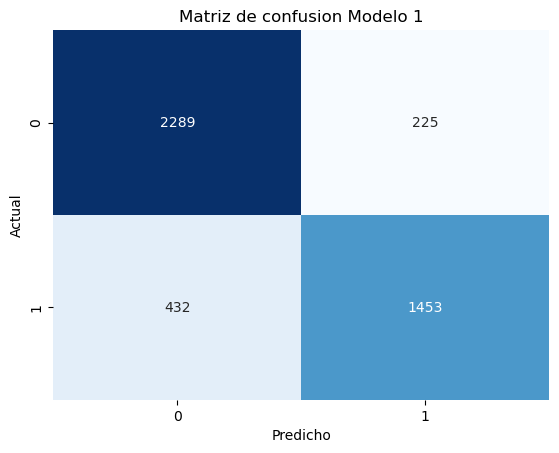

In [102]:
# Predicciones en el conjunto de prueba
y_pred_prob1 = model1.predict(dtest)
y_pred1 = (y_pred_prob1 > 0.5).astype(int)
# Reporte de clasificación
classification_report1 = classification_report(y_test, y_pred1)
print(classification_report1)
# Precisión del modelo
accuracy1 = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy1)

# Calcular la matriz de confusión
cm1 = confusion_matrix(y_test, y_pred1)

# Graficar la matriz de confusión
sns.heatmap(cm1 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo 1')
plt.show()

#### ENTRENAMIENTO 2: CON EL MODELO xgboost CON MEJOR DESEMPEÑO y sobre muestreo: STomek

In [103]:
print(y_STomek.value_counts())
y_STomek.value_counts() / y_STomek.shape[0] *100

Target_y
0    9885
1    7371
Name: count, dtype: int64


Target_y
0    57.284423
1    42.715577
Name: count, dtype: float64

In [104]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_STomek , y_STomek , test_size= size_test, random_state= random_seed, stratify= y_STomek)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12942, 28) (4314, 28) (12942,) (4314,)


In [105]:
print(y_test.value_counts())
y_test.value_counts() / y_test.shape[0] *100

Target_y
0    2471
1    1843
Name: count, dtype: int64


Target_y
0    57.278628
1    42.721372
Name: count, dtype: float64

In [106]:
#Relacion existente entre una clase y otra clase
print(y_train[y_train==0].shape[0] /y_train[y_train==1].shape[0])

# Calcular scale_pos_weight
num_pos2 = np.sum(y_train == 1)
num_neg2 = np.sum(y_train == 0)
scale_pos_weight2 = num_neg2 / num_pos2
print(f'scale_pos_weight: {scale_pos_weight2}')

1.3411722141823443
scale_pos_weight: 1.3411722141823443


In [107]:
# Crear un clasificador con pesos de clase ajustados
# Configurar los parámetros de XGBoost
params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': 1,
    'eta': 0.01,
    'max_depth': 8,
    'eval_metric': 'map',
    'seed': random_seed
}

# Crear el DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Entrenar el modelo
model2 = xgb.train(params, dtrain, num_boost_round=2000)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2471
           1       0.89      0.78      0.83      1843

    accuracy                           0.86      4314
   macro avg       0.87      0.85      0.86      4314
weighted avg       0.87      0.86      0.86      4314

Accuracy: 0.8639313861845155


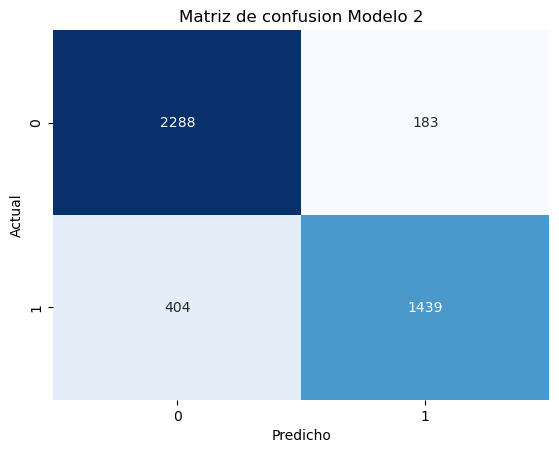

In [108]:
# Predicciones en el conjunto de prueba
y_pred_prob2 = model2.predict(dtest)
y_pred2 = (y_pred_prob2 > 0.5).astype(int)
# Reporte de clasificación
classification_report2 = classification_report(y_test, y_pred2)
print(classification_report2)
# Precisión del modelo
accuracy2 = accuracy_score(y_test, y_pred2)
print('Accuracy:', accuracy2)

# Calcular la matriz de confusión
cm2 = confusion_matrix(y_test, y_pred2)

# Graficar la matriz de confusión
sns.heatmap(cm2 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo 2')
plt.show()

#### ENTRENAMIENTO 3: CON EL MODELO xgboost CON MEJOR DESEMPEÑO y sobre muestreo: Smote Enn

In [109]:
print(y_smote_enn.value_counts())
y_smote_enn.value_counts() / y_smote_enn.shape[0] *100

Target_y
1    7540
0    5026
Name: count, dtype: int64


Target_y
1    60.003183
0    39.996817
Name: count, dtype: float64

In [110]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote_enn , y_smote_enn , test_size= size_test, random_state= random_seed, stratify=y_smote_enn)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9424, 28) (3142, 28) (9424,) (3142,)


In [111]:
print(y_test.value_counts())
y_test.value_counts() / y_test.shape[0] *100

Target_y
1    1885
0    1257
Name: count, dtype: int64


Target_y
1    59.993635
0    40.006365
Name: count, dtype: float64

In [112]:
#Relacion existente entre una clase y otra clase
print(y_train[y_train==0].shape[0] /y_train[y_train==1].shape[0])

# Calcular scale_pos_weight
num_pos3 = np.sum(y_train == 1)
num_neg3 = np.sum(y_train == 0)
scale_pos_weight3 = num_neg3 / num_pos3
print(f'scale_pos_weight: {scale_pos_weight3}')

0.6664898320070733
scale_pos_weight: 0.6664898320070733


In [113]:
# Crear un clasificador
params = {
    'objective': 'binary:logistic',
    'scale_pos_weight': 1,
    'eta': 0.01,
    'max_depth': 8,
    'eval_metric': 'map',
    'seed': random_seed
}

# Crear el DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Entrenar el modelo
model3 = xgb.train(params, dtrain, num_boost_round=2000)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1257
           1       0.87      0.92      0.90      1885

    accuracy                           0.87      3142
   macro avg       0.87      0.86      0.86      3142
weighted avg       0.87      0.87      0.87      3142

Accuracy: 0.8707829408020369


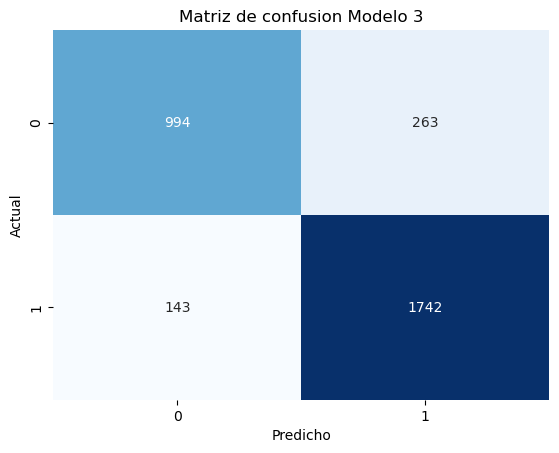

In [114]:
# Predicciones en el conjunto de prueba
y_pred_prob3 = model3.predict(dtest)
y_pred3 = (y_pred_prob3 > 0.5).astype(int)
# Reporte de clasificación
classification_report3 = classification_report(y_test, y_pred3)
print(classification_report3)
# Precisión del modelo
accuracy3 = accuracy_score(y_test, y_pred3)
print('Accuracy:', accuracy3)

# Calcular la matriz de confusión
cm3 = confusion_matrix(y_test, y_pred3)

# Graficar la matriz de confusión
sns.heatmap(cm3 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo 3')
plt.show()

## PRUEBA CON EL SET de TESTEO CREADO ANTES DE HACER SOBREMUESTREO

In [115]:
#Primero visualizacion con el conjunto de prueba del propio modelo
print("accuracy0 original :", accuracy0)
print("accuracy1 Smote    :", accuracy1)
print("accuracy2 STomelink:", accuracy2)
print("accuracy2 Smote ENN:", accuracy3)

accuracy0 original : 0.8125500667556742
accuracy1 Smote    : 0.8506478745169357
accuracy2 STomelink: 0.8639313861845155
accuracy2 Smote ENN: 0.8707829408020369


In [116]:
#CREACION DE LA MATRIZ CON LOS DATOS SEPARADOS PARA TESTEO FINAL
dtest_final = xgb.DMatrix(X_set_final, label= y_set_final)

In [117]:
print(X_set_final.shape)
dtest_final.get_data().toarray().shape

(3745, 28)


(3745, 28)

In [118]:
#MODELO ORIGINAL NORMALIZADO CON EL 80% DE LOS DATOS
print("Modelo 0:", "Modelo sin sobre muestreo")
# Predicciones en el conjunto de prueba
y_pred_prob_final0 = model0.predict(dtest_final)
y_pred_final0 = (y_pred_prob_final0 > 0.5).astype(int)
# Reporte de clasificación
cr0 = classification_report(y_set_final, y_pred_final0)
print(cr0)
# Precisión del modelo
ac0 = accuracy_score(y_set_final, y_pred_final0)
print('Accuracy:', ac0)
# Precision score
ps0 = precision_score(y_set_final, y_pred_final0, average='weighted')
print('Precision:', ps0)
# Recall score o sensibilidad
rs0 = recall_score(y_set_final, y_pred_final0, average='weighted')
print('Recall:', rs0)
# F1 score
f1_0 = f1_score(y_set_final, y_pred_final0, average='weighted')
print('F1 Score:', f1_0)

Modelo 0: Modelo sin sobre muestreo
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2514
           1       0.83      0.53      0.65      1231

    accuracy                           0.81      3745
   macro avg       0.82      0.74      0.76      3745
weighted avg       0.81      0.81      0.80      3745

Accuracy: 0.811214953271028
Precision: 0.8141277141883211
Recall: 0.811214953271028
F1 Score: 0.7983110736634368


In [119]:
# Predicciones en el conjunto de prueba
print("Modelo 1:", "Modelo con tecnica de SM de Smote")
y_pred_prob_final1 = model1.predict(dtest_final)
y_pred_final1 = (y_pred_prob_final1 > 0.5).astype(int)
# Reporte de clasificación
cr1 = classification_report(y_set_final, y_pred_final1)
print(cr1)
# Precisión del modelo
ac1 = accuracy_score(y_set_final, y_pred_final1)
print('Accuracy:', ac1)
# Precision score
ps1 = precision_score(y_set_final, y_pred_final1, average='weighted')
print('Precision:', ps1)
# Recall score o sensibilidad
rs1 = recall_score(y_set_final, y_pred_final1, average='weighted')
print('Recall:', rs1)
# F1 score
f1_1 = f1_score(y_set_final, y_pred_final1, average='weighted')
print('F1 Score:', f1_1)

Modelo 1: Modelo con tecnica de SM de Smote
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2514
           1       0.78      0.63      0.69      1231

    accuracy                           0.82      3745
   macro avg       0.81      0.77      0.78      3745
weighted avg       0.82      0.82      0.81      3745

Accuracy: 0.8186915887850468
Precision: 0.8151572138320193
Recall: 0.8186915887850468
F1 Score: 0.8131161186307674


In [120]:
# Predicciones en el conjunto de prueba
print("Modelo 2:", "Modelo con tecnica de SM de Smote Tomek")
y_pred_prob_final2 = model2.predict(dtest_final)
y_pred_final2 = (y_pred_prob_final2 > 0.5).astype(int)
# Reporte de clasificación
cr2 = classification_report(y_set_final, y_pred_final2)
print(cr2)
# Precisión del modelo
ac2 = accuracy_score(y_set_final, y_pred_final2)
print('Accuracy:', ac2)
# Precision score
ps2 = precision_score(y_set_final, y_pred_final2, average='weighted')
print('Precision:', ps2)
# Recall score o sensibilidad
rs2 = recall_score(y_set_final, y_pred_final2, average='weighted')
print('Recall:', rs2)
# F1 score
f1_2 = f1_score(y_set_final, y_pred_final2, average='weighted')
print('F1 Score:', f1_2)

Modelo 2: Modelo con tecnica de SM de Smote Tomek
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2514
           1       0.80      0.63      0.70      1231

    accuracy                           0.83      3745
   macro avg       0.82      0.78      0.79      3745
weighted avg       0.82      0.83      0.82      3745

Accuracy: 0.825634178905207
Precision: 0.8230292545721778
Recall: 0.825634178905207
F1 Score: 0.8195980910402259


In [121]:
# Predicciones en el conjunto de prueba
print("Modelo 3:", "Modelo con tecnica de SM de Smote ENN")
y_pred_prob_final3 = model3.predict(dtest_final)
y_pred_final3 = (y_pred_prob_final3 > 0.5).astype(int)
# Reporte de clasificación
cr3 = classification_report(y_set_final, y_pred_final3)
print(cr3)
# Precisión del modelo
ac3 = accuracy_score(y_set_final, y_pred_final3)
print('Accuracy:', ac3)
# Precision score
ps3 = precision_score(y_set_final, y_pred_final3, average='weighted')
print('Precision:', ps3)
# Recall score o sensibilidad
rs3 = recall_score(y_set_final, y_pred_final3, average='weighted')
print('Recall:', rs3)
# F1 score
f1_3 = f1_score(y_set_final, y_pred_final3, average='weighted')
print('F1 Score:', f1_3)

Modelo 3: Modelo con tecnica de SM de Smote ENN
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      2514
           1       0.56      0.86      0.67      1231

    accuracy                           0.73      3745
   macro avg       0.73      0.76      0.72      3745
weighted avg       0.79      0.73      0.74      3745

Accuracy: 0.7287049399198932
Precision: 0.7901568317766865
Recall: 0.7287049399198932
F1 Score: 0.7368819911554221


#### SUMMARY PREVIOUSLY

In [122]:
# Crear listas para almacenar los resultados
modelo = []
nombre = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

modelos = {"Modelo 0":"80 original","Modelo 1":"SMOTE", "Modelo 2":"STOMEK", "Modelo 3":"SMOTE ENN"}
# Iterar y almacenar los resultados
for num, name in enumerate(modelos.items()):
    print(num, name)
    print(eval(f"cm{num}"))
    print(eval(f"cr{num}"))
    print("")
    nombre.append(name)
    accuracies.append(round(eval(f"ac{num}"), 5))
    precisions.append(round(eval(f"ps{num}"), 5))
    recalls.append(round(eval(f"rs{num}"), 5))
    f1_scores.append(round(eval(f"f1_{num}"), 5))

# Crear un diccionario con los resultados
resultados = {
    "Nombre" : nombre,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
}
# Crear un DataFrame
df_tester_final = pd.DataFrame(resultados)

0 ('Modelo 0', '80 original')
[[2383  131]
 [ 571  660]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2514
           1       0.83      0.53      0.65      1231

    accuracy                           0.81      3745
   macro avg       0.82      0.74      0.76      3745
weighted avg       0.81      0.81      0.80      3745


1 ('Modelo 1', 'SMOTE')
[[2289  225]
 [ 432 1453]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2514
           1       0.78      0.63      0.69      1231

    accuracy                           0.82      3745
   macro avg       0.81      0.77      0.78      3745
weighted avg       0.82      0.82      0.81      3745


2 ('Modelo 2', 'STOMEK')
[[2288  183]
 [ 404 1439]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2514
           1       0.80      0.63      0.70      1231

    accuracy        

In [123]:
df_tester_final.sort_values("F1 Score", ascending=False, inplace=True)
df_tester_final

Nombre  Accuracy  Precision   Recall  F1 Score
2       (Modelo 2, STOMEK)   0.82563    0.82303  0.82563   0.81960
1        (Modelo 1, SMOTE)   0.81869    0.81516  0.81869   0.81312
0  (Modelo 0, 80 original)   0.81121    0.81413  0.81121   0.79831
3    (Modelo 3, SMOTE ENN)   0.72870    0.79016  0.72870   0.73688

### GRID SEARCH para mejor rendimiento

In [124]:
#DEBO OPTIMIZAR EL MODELO QUE HAYA PRESENTANDO MEJOR DESEMPEÑO
##EN EL CASO QUE SEA UN MODELO CON SOBREMUESTREO, DEBO ANALIZAR COMO PROCEDER CON ESO
###PARA QUE LUEGO SE AUTO ENTRENE SEGUN LAS NUEVAS ETIQUETAS

In [125]:
## DEBO DICIDIR SI ENTRENAR EL MODELO CON LOS DATOS ORIGINALES Y OPTIMIZAR EL MODELO
## DEBO DECIDIR SI ENTRENAR EL MODELO CON DATOS MODIFICADOS POR TECNICAS DE SOBRE MUESTREO PARA AUMENTAR EL LIMITE DE SEPARACION ENTRE LAS CLASES


# EL MEJOR MODELO DE ACUERDO AL PARAMETRO DE PRECISION FUE BAJO LA TECNICA DE MUESTREO ???? HIBRIDO

In [126]:
del(X_train, X_test, y_train, y_test)

In [127]:
print("ELEGIR EL MODELO CON MEJOR DESEMPEÑO BAJO LA TECNICA DE SOBRE O SUB MUESTREO PARA OPTIMIZAR POR HIPERPARAMETROS")
#Sera: X_80 #datos normalizados originales
#Sera: X #datos normalizados sobre muestreados

#Sera: X_smote #proviene de X_80
#Sera: y_smote #proviene de y_80

#Sera: X_smote_enn #proviene de X_80
#Sera: y_smote_enn #proviene de y_80

set_x = X_STomek #proviene de X_80
set_y = y_STomek #proviene de y_80

#set_x = X_smote_enn.copy()
#set_y = y_smote_enn.copy()

ELEGIR EL MODELO CON MEJOR DESEMPEÑO BAJO LA TECNICA DE SOBRE O SUB MUESTREO PARA OPTIMIZAR POR HIPERPARAMETROS


In [131]:
# Dividir en entrenamiento y prueba CON EL SET: ?????

print(size_test)

X_train, X_test, y_train, y_test = train_test_split( set_x , set_y , test_size= size_test, random_state= random_seed, stratify = set_y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

0.25


#### OPTIMIZACION DE PARAMETROS POR GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

#Crear el clasificador XGBoost
modelo_grid = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc')

#Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [12, 13],
    'learning_rate': [0.1],
    'n_estimators': [250, 300],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.8, 0.9],
    'gamma': [0],
    'n_jobs': [2],
    'random_state': [random_seed],
    'scale_pos_weight': [scale_pos_weight, 1],
    'min_child_weight': [0.5, 1, 2],
    'reg_alpha': [0.01, 0.05], 
}


#Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator = modelo_grid, param_grid= param_grid, cv=5, verbose=1, n_jobs=3 ,scoring='precision_macro') #precision

#Realizar la búsqueda de cuadrícula
grid_search.fit(X_train, y_train)

#Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

#Evaluar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Classification Report:\n{report}")

In [ ]:
print(best_model)
print(best_params)

#### OPTIMIZACION DE PARAMETROS POR RANDOM SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Crear el clasificador XGBoost
modelo_ramdom = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc')

#Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [11, 12, 13],
    'learning_rate': [0.1],
    'n_estimators': [300],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.5, 0.9],
    'random_state': [random_seed],
    'scale_pos_weight': [scale_pos_weight, 1],
    'gamma': [0],
    'n_jobs': [1],
    'min_child_weight': [0.5, 1],
    'reg_alpha': [0.01, 0.05, 0.1]
}

#Configurar la búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(estimator= modelo_ramdom, param_distributions=param_grid, n_iter = 100, cv=5, n_jobs=2, verbose=2, scoring='precision_macro') #precision

#Realizar la búsqueda aleatoria
random_search.fit(X_train, y_train)

#Obtener los mejores parámetros
best_params_random = random_search.best_params_
print(f"Mejores hiperparámetros: {best_params_random}")

#Evaluar el modelo con los mejores parámetros
best_random = random_search.best_estimator_
y_pred_random = best_random.predict(X_test)

accuracy_random = accuracy_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random, average='weighted')
report_random = classification_report(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random, average='weighted')
recall_random = recall_score(y_test, y_pred_random, average='weighted')


In [ ]:
print(f"Accuracy: {accuracy_random:.4f}")
print(f"Precision: {precision_random:.4f}")
print(f"Recall: {recall_random:.4f}")
print(f"F1 Score: {f1_random:.4f}")
print(f"Classification Report:\n{report_random}")

In [ ]:
print(best_random)
print(best_params_random)

## PREPARACION, ENTRENAMIENTO Y EVALUACION DE LOS MODELOS

------------------------------------

## REVISION CLASIFICADOR OPTIMIZADO MEDIANTE GRID SEARCH

In [1]:
#EXPORTAR EL MODELO ENTRENADO
import joblib

# Guardar el modelo usando el método save_model
best_model.save_model('xgb_model_grid_stomek.json')

# O puedes usar joblib para guardar el modelo completo (incluye parámetros y estructura del modelo)
joblib.dump(best_model, 'xgb_model_grid_stomek.pkl')

In [2]:
# AQUI DEBO SELECCIONAR EL MODELO PARA CARGAR

#Cargar el modelo usando el método load_model
#loaded_model_grid = xgb.XGBClassifier()
#loaded_model_grid.load_model('xgb_model_grid_stomek.json')

#Cargar el modelo completo usando joblib
#loaded_model_grid = joblib.load('xgb_model_grid_stomek.pkl')

In [ ]:
#Predecir y evaluar
y_pred_grid = best_model.predict(X_test)
#Reporte de clasificación
print(classification_report(y_test, y_pred_grid))
#Precisión del modelo
print('Accuracy:', accuracy_score(y_test, y_pred_grid))
#Precision score
print('Precision:', precision_score(y_test, y_pred_grid, average='weighted'))
#Recall score o sensibilidad
print('Recall:', recall_score(y_test, y_pred_grid, average='weighted'))
#F1 score
print('F1 Score:', f1_score(y_test, y_pred_grid, average='weighted'))
#Calcular la matriz de confusión
cm_grid = confusion_matrix(y_test, y_pred_grid)
#Graficar la matriz de confusión
#plt.figure(figsize=(6, 4))
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion')
plt.show()

In [ ]:
#Calcular la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, y_pred_grid)

#Calcular el AUC
auc_grid = roc_auc_score(y_test, y_pred_grid)
print(f"AUC: {auc_grid}")

#Graficar la curva ROC
plt.figure()
plt.plot(fpr_grid, tpr_grid, color='blue', lw=1, label=f'ROC curve (area = {auc_grid:0.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('CURVA ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cols_importance_grid = pd.DataFrame( best_model.feature_importances_, columns=["Importancia"], index=X_80.columns).sort_values("Importancia", ascending=False).reset_index(names="Columna")
cols_importance_grid

## REVISION CLASIFICADOR OPTIMIZADO MEDIANTE RANDOM SEARCH

In [4]:
#EXPORTAR EL MODELO ENTRENADO
import joblib

# Guardar el modelo usando el método save_model
best_random.save_model('xgb_model_random_con_stomek.json')

# O puedes usar joblib para guardar el modelo completo (incluye parámetros y estructura del modelo)
joblib.dump(best_random, 'xgb_model_random_con_stomek.pkl')


In [5]:
#Cargar el modelo usando el método load_model
#loaded_model = xgb.XGBClassifier()
#loaded_model.load_model('xgb_model_random_con_stomek.json')

#Cargar el modelo completo usando joblib
#loaded_model_random = joblib.load('xgb_model_random_con_stomek.pkl')

In [ ]:
#Predecir y evaluar con el modelo optimizado por Random Search
y_pred_random = best_random.predict(X_test)
#Reporte de clasificación
print(classification_report(y_test, y_pred_random))
#Precisión del modelo
print('Accuracy:', accuracy_score(y_test, y_pred_random))
#Precision score
print('Precision:', precision_score(y_test, y_pred_random, average='weighted'))
#Recall score o sensibilidad
print('Recall:', recall_score(y_test, y_pred_random, average='weighted'))
#F1 score
print('F1 Score:', f1_score(y_test, y_pred_random, average='weighted'))
#Calcular la matriz de confusión
cm_random = confusion_matrix(y_test, y_pred_random)
#Graficar la matriz de confusión
#plt.figure(figsize=(6, 4))
sns.heatmap(cm_random, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion')
plt.show()

In [ ]:
#Calcular la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

fpr_random, tpr_random, thresholds_random = roc_curve(y_test, y_pred_random)

#Calcular el AUC
auc_random = roc_auc_score(y_test, y_pred_random)
print(f"AUC: {auc_random}")

#Graficar la curva ROC
plt.figure()
plt.plot(fpr_random, tpr_random, color='blue', lw=1, label=f'ROC curve (area = {auc_random:0.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('CURVA ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
cols_importance_random = pd.DataFrame( best_random.feature_importances_, columns=["Importancia"], index=X_80.columns).sort_values("Importancia", ascending=False).reset_index(names="Columna")
cols_importance_random

## EVALUACION FINAL CON EL SET SEPARADO AL INICIO PARA TEST

In [ ]:
print("Set separado al inicio para testeo final:")
print(X_set_final.shape)

In [139]:
print("Set separado al inicio para testeo final:")
print(y_set_final.shape)
print(y_set_final.value_counts())
print(y_set_final.value_counts() / y_set_final.shape[0]*100)

Set separado al inicio para testeo final:
(3745,)
Target_y
0    2514
1    1231
Name: count, dtype: int64
Target_y
0    67.129506
1    32.870494
Name: count, dtype: float64


## MODELOS GRID SEARCH DE PRUEBA EN EL SET APARTADO PARA TESTEO

In [ ]:
#MODELO OPTIMIZADO CON GRID SEARCH
#umbral = 0.5

#Predecir y evaluar
#y_pred_prob_final_grid = best_model.predict_proba(X_set_final)[:, 1]
y_pred_final_grid = best_model.predict(X_set_final)

#Convertir las probabilidades en etiquetas de clase
#y_pred_final_grid = (y_pred_prob_final_grid >= umbral ).astype(int)

#Reporte de clasificación
print(classification_report(y_set_final, y_pred_final_grid))
#Precisión del modelo
print('Accuracy:', accuracy_score(y_set_final, y_pred_final_grid))
#Precision score
print('Precision:', precision_score(y_set_final, y_pred_final_grid, average='weighted'))
#Recall score o sensibilidad
print('Recall:', recall_score(y_set_final, y_pred_final_grid, average='weighted'))
#F1 score
print('F1 Score:', f1_score(y_set_final, y_pred_final_grid, average='weighted'))

#Calcular la matriz de confusión
cm_final_grid = confusion_matrix(y_set_final, y_pred_final_grid)

#Graficar la matriz de confusión
#plt.figure(figsize=(6, 4))
sns.heatmap(cm_final_grid, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo Grid')
plt.show()

### OTRO MODELO GUARDADO GRID SEARCH ANTERIOR

In [141]:
#CARGA DEL MODELO ANTEIOR ENTRENADO Y GUARDADO

#Cargar el modelo completo usando joblib
loaded_model_grid = joblib.load('xgb_model_grid_stomek.pkl')
print(loaded_model_grid.get_params())
loaded_model_grid

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 13, 'max_leaves': None, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': 2, 'num_parallel_tree': None, 'predictor': None, 'random_state': 32, 'reg_alpha': 0.05, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=2, num_parallel_tree=None,
              predictor=None, random_state=32, ...)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2514
           1       0.86      0.66      0.75      1231

    accuracy                           0.85      3745
   macro avg       0.86      0.80      0.82      3745
weighted avg       0.85      0.85      0.85      3745

Accuracy: 0.8531375166889186
Precision: 0.8537084979864311
Recall: 0.8531375166889186
F1 Score: 0.8475383512092386


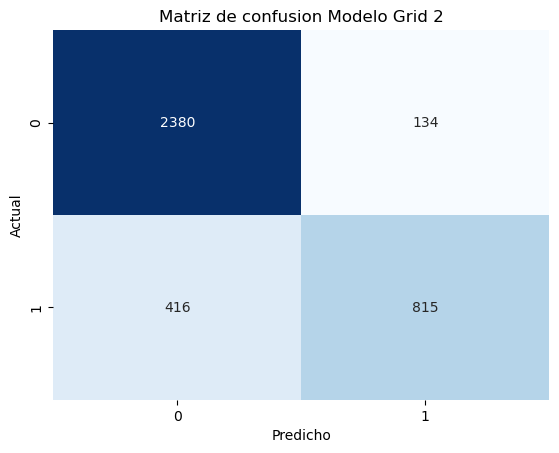

In [142]:
#MODELO OPTIMIZADO CON GRID SEARCH
#umbral = 0.5

# Predecir y evaluar
#y_pred_prob_final_grid = best_model.predict_proba(X_set_final)[:, 1]
y_pred_final_grid2 = loaded_model_grid.predict(X_set_final)

# Convertir las probabilidades en etiquetas de clase
#y_pred_final_grid = (y_pred_prob_final_grid >= umbral ).astype(int)

# Reporte de clasificación
print(classification_report(y_set_final, y_pred_final_grid2))
# Precisión del modelo
print('Accuracy:', accuracy_score(y_set_final, y_pred_final_grid2))
# Precision score
print('Precision:', precision_score(y_set_final, y_pred_final_grid2, average='weighted'))
# Recall score o sensibilidad
print('Recall:', recall_score(y_set_final, y_pred_final_grid2, average='weighted'))
# F1 score
print('F1 Score:', f1_score(y_set_final, y_pred_final_grid2, average='weighted'))

# Calcular la matriz de confusión
cm_final_grid2 = confusion_matrix(y_set_final, y_pred_final_grid2)

# Graficar la matriz de confusión
#plt.figure(figsize=(6, 4))
sns.heatmap(cm_final_grid2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo Grid 2')
plt.show()

## MODELOS RANDOM SEARCH DE PRUEBA EN EL SET APARTADO PARA TESTEO

In [ ]:
#MODELO OPTIMIZADO CON RANDOM SEARCH
#umbral = 0.5

#Predecir y evaluar
#y_pred_prob_final_random = best_random.predict_proba(X_set_final)[:, 1]
y_pred_final_random = best_random.predict(X_set_final)

#Convertir las probabilidades en etiquetas de clase
#y_pred_final_random = (y_pred_prob_final_random >= umbral ).astype(int)

#Reporte de clasificación
print(classification_report(y_set_final, y_pred_final_random))
#Precisión del modelo
print('Accuracy:', accuracy_score(y_set_final, y_pred_final_random))
#Precision score
print('Precision:', precision_score(y_set_final, y_pred_final_random, average='weighted'))
#Recall score o sensibilidad
print('Recall:', recall_score(y_set_final, y_pred_final_random, average='weighted'))
#F1 score
print('F1 Score:', f1_score(y_set_final, y_pred_final_random, average='weighted'))

#Calcular la matriz de confusión
cm_final_random = confusion_matrix(y_set_final, y_pred_final_random)

#Graficar la matriz de confusión
#plt.figure(figsize=(6, 4))
sns.heatmap(cm_final_random, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo Random')
plt.show()

### OTRO MODELO RANDOM SEARCH ANTERIOR

In [144]:
#CARGA DEL MODELO ANTEIOR ENTRENADO Y GUARDADO

#Cargar el modelo completo usando joblib
loaded_model_random = joblib.load('xgb_model_random_con_stomek.pkl')
print(loaded_model_random.get_params())
loaded_model_random

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 11, 'max_leaves': None, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': 1, 'num_parallel_tree': None, 'predictor': None, 'random_state': 32, 'reg_alpha': 0.05, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 0.7456164014027515, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=1, num_parallel_tree=None,
              predictor=None, random_state=32, ...)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2514
           1       0.86      0.64      0.73      1231

    accuracy                           0.85      3745
   macro avg       0.85      0.79      0.81      3745
weighted avg       0.85      0.85      0.84      3745

Accuracy: 0.8467289719626169
Precision: 0.8480063343687118
Recall: 0.8467289719626169
F1 Score: 0.8400307972108368


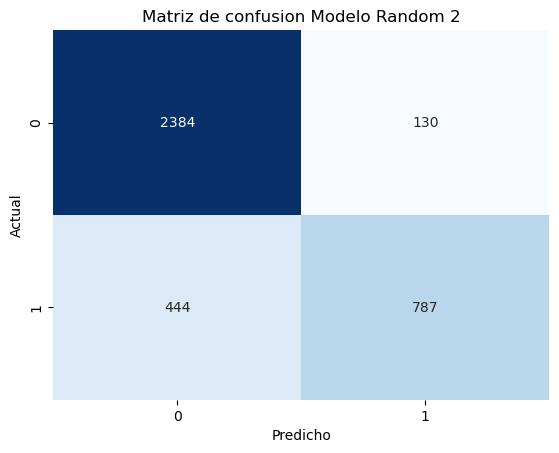

In [145]:
#MODELO OPTIMIZADO CON RANDOM SEARCH
#umbral = 0.5

# Predecir y evaluar
#y_pred_prob_final_random = best_random.predict_proba(X_set_final)[:, 1]
y_pred_final_random2 = loaded_model_random.predict(X_set_final)

# Convertir las probabilidades en etiquetas de clase
#y_pred_final_random = (y_pred_prob_final_random >= umbral ).astype(int)

# Reporte de clasificación
print(classification_report(y_set_final, y_pred_final_random2))
# Precisión del modelo
print('Accuracy:', accuracy_score(y_set_final, y_pred_final_random2))
# Precision score
print('Precision:', precision_score(y_set_final, y_pred_final_random2, average='weighted'))
# Recall score o sensibilidad
print('Recall:', recall_score(y_set_final, y_pred_final_random2, average='weighted'))
# F1 score
print('F1 Score:', f1_score(y_set_final, y_pred_final_random2, average='weighted'))

# Calcular la matriz de confusión
cm_final_random2 = confusion_matrix(y_set_final, y_pred_final_random2)

# Graficar la matriz de confusión
#plt.figure(figsize=(6, 4))
sns.heatmap(cm_final_random2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo Random 2')
plt.show()

### RESUMEN DE LOS 4 MODELOS OPTIMIZADOS (2 GUARDADOS + 2 CREADOS AHORA)

### SELECCION DEL MEJOR MODELO RESPECTO DE LAS MUESTRAS CORRECTAMENTE POSITIVAS

In [147]:
#MEJOR MODELO ES: ...

#print(best_model)
#print(best_params)

In [148]:
print("-Verificación de la forma de las matriz contengan la misma cantidad de columnas:")
print("")
print(X_set_final.shape, ": forma de la matriz separada para testeo final")
print(df_int_float_scaled.drop("Target_y", axis=1).shape, ": forma de set o matriz original sin etiquetas")
print(df_clases.drop(["Target_y","cluster_KMeans","cluster_DBSCAN"], axis=1).shape, ": forma de set o matriz original sin etiquetas usado para entrenar los modelos y tecnicas de sobremuestreo")

-Verificación de la forma de las matriz contengan la misma cantidad de columnas:

(3745, 28) : forma de la matriz separada para testeo final
(876611, 28) : forma de set o matriz original sin etiquetas
(18723, 28) : forma de set o matriz original sin etiquetas usado para entrenar los modelos y tecnicas de sobremuestreo


In [150]:
df_int_float_scaled["Target_y"].value_counts()

Target_y
0    857888
2     12568
1      6155
Name: count, dtype: int64

In [151]:
df_clases["Target_y"].value_counts()

Target_y
0    12568
1     6155
Name: count, dtype: int64

In [152]:
print("Se trabajara iterativament con el df: df_int_float_scaled que contiene todos los targes y se le agregara en cada entrenamiento etiquetas")
print(df_int_float_scaled.shape)
print("")
df_int_float_scaled

Se trabajara iterativament con el df: df_int_float_scaled que contiene todos los targes y se le agregara en cada entrenamiento etiquetas
(876611, 29)



lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0                       0.613985                         0.011364   
1                       0.629175                         0.011379   
2                       0.625928                         0.011485   
3                       0.611878                         0.011621   
4                       0.637168                         0.011697   
...                          ...                              ...   
876606                  0.681706                         0.092574   
876607                  0.689777                         0.097204   
876608                  0.603217                         0.097249   
876609                  0.705789                         0.097385   
876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                                                0.439576                                       
1                            

### PREDICCION DE CLASES Y SUS PROBABILIDADES EN EL SET SIN ETIQUETAS

In [153]:
#ANALISIS = El set original escalado con etiquetas ceros contiene casos no identificados o diagnosticados de MC por varias causas (omision, evasión, mal registro, no registradas, no identificada)...
# y que probablemente hayan presentado un evento de mastitis, ya sea en menor grado y que no fue detectado ni tratrado (no agudo clinico: que es cuando deberían detectar y tratar una vaca enferma)
# Por ende, se debería observar en estas instancias que el algoritmo predice con la misma probabilidad acerca de la prevalencia de la enfermedad en los predios, que va desde 1 a 3 % de vacas enfermas.

In [154]:
# CREACION DE UNA MUESTRA (SAMPLE) PARA REVISAR QUE EL PREDICTOR ESTE FUNCIONANDO CORRECTAMENTE
sub_sample_df = df_int_float_scaled.sample(n=10000, random_state=random_seed)
print(sub_sample_df.shape)

print(loaded_model_grid.predict_proba(sub_sample_df.drop("Target_y", axis=1)).shape)
loaded_model_random.predict_proba(sub_sample_df.drop("Target_y", axis=1))

(10000, 29)
(10000, 2)


array([[0.9484131 , 0.05158691],
       [0.72541964, 0.2745804 ],
       [0.99701214, 0.00298786],
       ...,
       [0.97463894, 0.02536109],
       [0.73309904, 0.26690096],
       [0.8068282 , 0.1931718 ]], dtype=float32)

In [155]:
loaded_model_grid.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.9,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'auc',
 'feature_types': None,
 'gamma': 0,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 13,
 'max_leaves': None,
 'min_child_weight': 0.5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 300,
 'n_jobs': 2,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 32,
 'reg_alpha': 0.05,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 0.9,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### PRUEBA DEL FUNCIONAMIENTO DEL MODELO OPTIMIZADO EN EL SET COMPLETO

In [156]:
test_labels = loaded_model_grid.predict(df_int_float_scaled.drop("Target_y", axis=1))
print(test_labels.shape)

(876611,)


In [157]:
df_int_float_scaled["Target_y_new"] = test_labels
df_int_float_scaled

lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0                       0.613985                         0.011364   
1                       0.629175                         0.011379   
2                       0.625928                         0.011485   
3                       0.611878                         0.011621   
4                       0.637168                         0.011697   
...                          ...                              ...   
876606                  0.681706                         0.092574   
876607                  0.689777                         0.097204   
876608                  0.603217                         0.097249   
876609                  0.705789                         0.097385   
876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                                                0.439576                                       
1                            

### EVALUACIÓN PRELIMINAR DEL ANALISIS DE PCA EN 2D EN LAS ETIQUETAS DE PRUEBA DE TODO EL SET
#### (CON EL FIN DE VER GRAFICAMENTE ALGUN PATRON)

(876611, 30) :forma del conjunto de datos normalizado
(876611, 2) :forma del conjunto de datos reducido por PCA
Varianza explicada por cada componente principal: [0.28720476 0.12500725]
Varianza total explicada: 0.4122120075678437


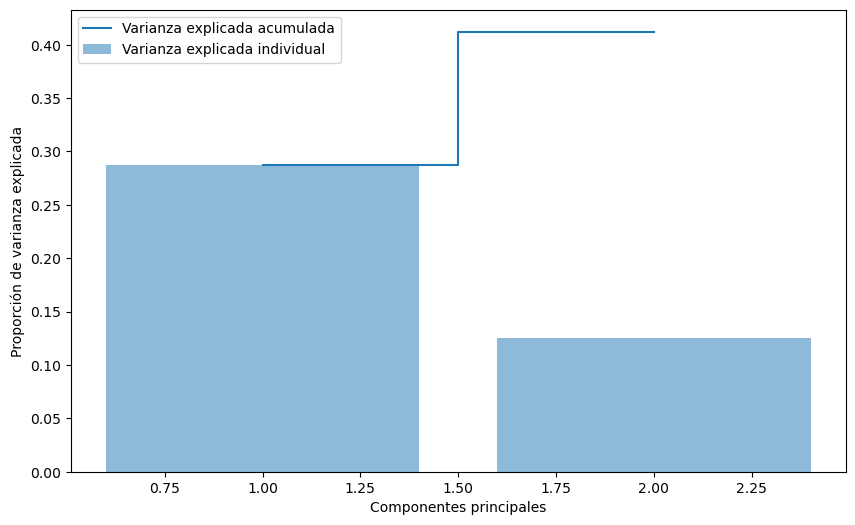

In [158]:
#Reducir la dimensionalidad de los datos
print(df_int_float_scaled.shape, ":forma del conjunto de datos normalizado")
pca_test = PCA(n_components = 2)
pca_test_df = pca_test.fit_transform(df_int_float_scaled.drop(["Target_y","Target_y_new"], axis=1))


#Crear un DataFrame con las componentes principales
pca_test_df = pd.DataFrame(data = pca_test_df, columns= [f"PCA{i}" for i in range(1, pca_test.n_components_ + 1)])
print(pca_test_df.shape, ":forma del conjunto de datos reducido por PCA")

#Analizar la varianza explicada por cada componente principal
explained_variance_test = pca_test.explained_variance_ratio_

print(f'Varianza explicada por cada componente principal: {explained_variance_test}')
print(f'Varianza total explicada: {np.sum(explained_variance_test)}')

#Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_test) + 1), explained_variance_test, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, len(explained_variance_test) + 1), np.cumsum(explained_variance_test), where='mid', label='Varianza explicada acumulada')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

            PCA1      PCA2  Target
0      -0.478602  0.134626       0
1      -0.483368  0.153232       0
2      -0.410922 -0.022467       0
3      -0.420971 -0.008795       0
4      -0.510246  0.253973       0
...          ...       ...     ...
876606 -0.339943 -0.134363       1
876607 -0.335082 -0.160224       1
876608 -0.232171 -0.280212       1
876609 -0.262173 -0.357103       1
876610 -0.294418 -0.373651       1

[876611 rows x 3 columns]
Target
0    717182
1    159429
Name: count, dtype: int64
Target
0    81.813028
1    18.186972
Name: count, dtype: float64


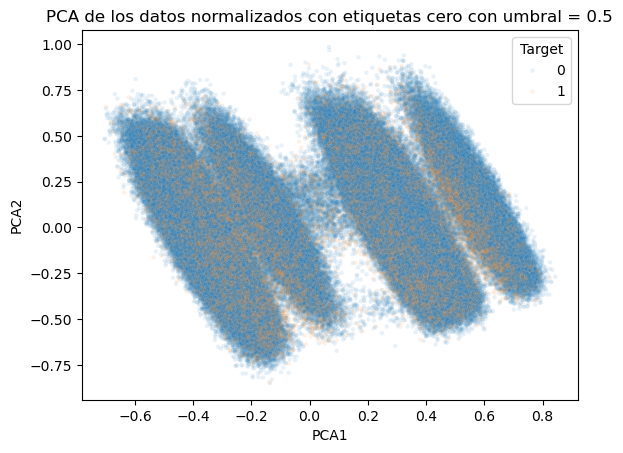

In [159]:
pca_test_df["Target"] = df_int_float_scaled["Target_y_new"].values
print(pca_test_df)
print(pca_test_df["Target"].value_counts())
print(pca_test_df["Target"].value_counts() / pca_test_df.shape[0]*100)
sns.scatterplot(data=pca_test_df, x="PCA1", y="PCA2", hue="Target", alpha=0.1, s=10)
plt.title("PCA de los datos normalizados con etiquetas cero con umbral = 0.5")
plt.show()

In [160]:
#ELIMINACION DE LAS ETIQUETAS RECIEN CREADAS UNICAMENTE PARA EL ANALISIS DE LA VISUALIZACION
df_int_float_scaled.drop("Target_y_new", axis=1, inplace=True)
df_int_float_scaled.shape

(876611, 29)

## PREDICCION DE LA PROBABILIDAD DE PERTENENCIA A UNA CLASE (0 ó 1) MODELO OPTIMIZADO

In [162]:
#COPIA DEL SET ESCALADO PARA RESGUARDO DE POSIBLES ERRORES
df_sm  = df_int_float_scaled.copy()
print(df_sm.shape)
df_sm

(876611, 29)


lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0                       0.613985                         0.011364   
1                       0.629175                         0.011379   
2                       0.625928                         0.011485   
3                       0.611878                         0.011621   
4                       0.637168                         0.011697   
...                          ...                              ...   
876606                  0.681706                         0.092574   
876607                  0.689777                         0.097204   
876608                  0.603217                         0.097249   
876609                  0.705789                         0.097385   
876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                                                0.439576                                       
1                            

In [163]:
print(df_sm["Target_y"].value_counts())

Target_y
0    857888
2     12568
1      6155
Name: count, dtype: int64


In [164]:
df_sm.reset_index(inplace=True)

In [165]:
cols_predict = ['lapso_sgdos_a_ordeña_ant', 'Hora inicio del ordeño en sgdos','Porduccion del Turno','Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal',
 'Porcentaje de leche a los 2 minutos', 'duracion en sgdos total ordeño','Flujo Pico leche durante el ordeño','Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos',
 'Eventos de Salud del sistema enlos ultimos 365 dias','Indice de Salud de Vacas en Ordeño', 'Leche Diaria_mean_movil','Actividad Diaria_mean_movil', 'Ruminacion Diaria_mean_movil',
 'Coductividad Maxima 1_mean_movil','sgdos al Pico de leche durante el Tiempo de ordeño_mean_movil','Flujo a los 15 segundos_mean_movil', 'Leche Diaria_std_movil','Actividad Diaria_std_movil',
 'Ruminacion Diaria_std_movil', 'Coductividad Maxima 1_std_movil', 'sgdos al Pico de leche durante el Tiempo de ordeño_std_movil', 'Flujo a los 15 segundos_std_movil', 'diff_Leche Diaria_mean_movil',
 'diff_Actividad Diaria_mean_movil', 'diff_sgdos al Pico de leche durante el Tiempo de ordeño_mean_movil', 'diff_Leche Diaria_var_movil', 'diff_Actividad Diaria_var_movil', 
 'diff_Ruminacion Diaria_var_movil']

cols_predict

['lapso_sgdos_a_ordeña_ant',
 'Hora inicio del ordeño en sgdos',
 'Porduccion del Turno',
 'Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal',
 'Porcentaje de leche a los 2 minutos',
 'duracion en sgdos total ordeño',
 'Flujo Pico leche durante el ordeño',
 'Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos',
 'Eventos de Salud del sistema enlos ultimos 365 dias',
 'Indice de Salud de Vacas en Ordeño',
 'Leche Diaria_mean_movil',
 'Actividad Diaria_mean_movil',
 'Ruminacion Diaria_mean_movil',
 'Coductividad Maxima 1_mean_movil',
 'sgdos al Pico de leche durante el Tiempo de ordeño_mean_movil',
 'Flujo a los 15 segundos_mean_movil',
 'Leche Diaria_std_movil',
 'Actividad Diaria_std_movil',
 'Ruminacion Diaria_std_movil',
 'Coductividad Maxima 1_std_movil',
 'sgdos al Pico de leche durante el Tiempo de ordeño_std_movil',
 'Flujo a los 15 segundos_std_movil',
 'diff_Leche Diaria_mean_movil',
 'diff_Actividad Diaria_mean_mov

#### PREDICCION DE LAS ETIQUETAS PARA EL METODO DE UMBRAL DE CONFIANZA Y REFUERZO POR DUPLICIDAD

In [166]:
predicts_clases = loaded_model_grid.predict_proba(df_sm[cols_predict])
predicts_clases.shape

(876611, 2)

In [167]:
df_sm["prob_clase_neg_0"] = predicts_clases[:,0]
df_sm["prob_clase_pos_1"] = predicts_clases[:,1]

In [169]:
df_sm["Target_y_1"] = np.nan
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

## 1RA PREDICCIÓN CON EL MODELO OPTIMIZADO MEDIANTE GRID SEARCH
### CON EL SET PEQUEÑO ETIQUETADO Y SOBRE MUESTREADO POR SMOTE

#### PREDICCION DE LA CLASE  (NEGATIVA = SANA) MAYORES AL 90% CON EL MODELO ENTRENADO

In [170]:
trues_ceros = df_sm["prob_clase_neg_0"] > 0.9
indices_ceros = trues_ceros[trues_ceros].index
print(len(indices_ceros), "número de instancias que superan el umbral de 0.9 para la clase negativa")

391926 número de instancias que superan el umbral de 0.9 para la clase negativa


In [171]:
df_sm.loc[indices_ceros, "Target_y_1"] = 0
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

#### PREDICCION DE LA CLASE UNO (POSITIVA = MASTITIS) MAYORES AL 90% CON EL MODELO ENTRENADO

In [172]:
trues_unos = df_sm["prob_clase_pos_1"] > 0.9
indices_unos = trues_unos[trues_unos].index
print(len(indices_unos), "número de instancias que superan el umbral de 0.9 para la clase positiva")

32278 número de instancias que superan el umbral de 0.9 para la clase positiva


In [173]:
df_sm.loc[indices_unos, "Target_y_1"] = 1
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

#### REVISION DE LA DISTRIBUCION LUEGO DE LA ASIGNACION DE LAS ETIQUETAS SOBRE 90% DE CONFIABILIDAD

In [174]:
print(df_sm[df_sm["Target_y_1"].notna()]["Target_y_1"].value_counts())
print(df_sm[df_sm["Target_y_1"].notna()]["Target_y_1"].value_counts() / df_sm[df_sm["Target_y_1"].notna()]["Target_y_1"].shape[0]*100)

Target_y_1
0.0    391926
1.0     32278
Name: count, dtype: int64
Target_y_1
0.0    92.390925
1.0     7.609075
Name: count, dtype: float64


In [175]:
#CANTIDAD DE NUEVAS ETIQUETAS POR SOBRE EL 90% DE PROBABILIDAD
print(df_sm["Target_y_1"].isna().sum())
print(df_sm["Target_y_1"].isna().sum() / df_sm.shape[0] * 100)

452407
51.60863826714473


### CREACION DEL DATASET QUE CONTENDRÁ LAS NUEVAS ETIQUETAS PARA RE-ENTRENAR EL MODELO

In [177]:
df_sm[["Target_y","Target_y_1"]].value_counts().sort_index()

Target_y  Target_y_1
0         0.0           380653
          1.0            27814
1         0.0              209
          1.0             4435
2         0.0            11064
          1.0               29
Name: count, dtype: int64

In [178]:
df_sm[["Target_y","Target_y_1"]].notna().sum()

Target_y      876611
Target_y_1    424204
dtype: int64

In [179]:
print(df_sm[ (df_sm["Target_y_1"]==1)].shape)
print(df_sm[ (df_sm["Target_y_1"]==0)].shape)

(32278, 33)
(391926, 33)


In [180]:
df_c1_t1 = df_sm[ (df_sm["Target_y_1"]==1) & (df_sm["Target_y"]==1)]
print(df_c1_t1.shape)
df_c1_t1

(4435, 33)


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
3832      3832                  0.651676                         0.097521   
3834      3834                  0.419284                         0.694407   
3835      3835                  0.394615                         0.694438   
3836      3836                  0.471229                         0.694801   
3843      3843                  0.429187                         0.702533   
...        ...                       ...                              ...   
875302  875302                  0.671071                         0.145367   
875303  875303                  0.681649                         0.145533   
875304  875304                  0.685515                         0.145548   
875305  875305                  0.672741                         0.145730   
875306  875306                  0.697574                         0.152055   

        Porduccion del Turno  \
3832                0.230862   
3834                0.382415   
3835                0.614760   
3836                0.512006   
3843                0.386299   
...                      ...   
875302              0.180968   
875303              0.194880   
875304              0.360558   
875305              0.203778   
875306              0.309958   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
3832                                             0.422864                               
3834                                             0.489945                               
3835                                             0.444762                               
3836                                             0.476761                               
3843                                             0.536870                               
...                                                   ...                               
875302                                           0.427824                               
875303                                           0.406507                               
875304                                           0.442304                               
875305                                           0.634340                               
875306                                           0.473096                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
3832                                   0.78                        0.224181   
3834                                   0.33                        0.479849   
3835                                   0.53                        0.321159   
3836                                   0.24                        0.561713   
3843                                   0.45                        0.350126   
...                                     ...                             ...   
875302                                 0.44                        0.356423   
875303                                 0.76                        0.230479   
875304                                 0.31                        0.498741   
875305                                 0.56                        0.355164   
875306                                 0.44                        0.365239   

        Flujo Pico leche durante el ordeño  \
3832                              0.470968   
3834                              0.309677   
3835                              0.632258   
3836                              0.296774   
3843                              0.361290   
...                                    ...   
875302                            0.193548   
875303                            0.322581   
875304                            0.258065   
875305                            0.419355   
875306                            0.341935   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
3832                           

In [181]:
df_c0_t1 = df_sm[ (df_sm["Target_y_1"]==0) & (df_sm["Target_y"]==0)]
print(df_c0_t1.shape)
df_c0_t1

(380653, 33)


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876570  876570                  0.678601                         0.085522   
876596  876596                  0.668464                         0.091318   
876597  876597                  0.747832                         0.091318   
876599  876599                  0.702522                         0.091499   
876600  876600                  0.803293                         0.091575   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876570              0.306038   
876596              0.367655   
876597              0.359110   
876599              0.520869   
876600              0.337394   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876570                                           0.465052                               
876596                                           0.395156                               
876597                                           0.493877                               
876599                                           0.547372                               
876600                                           0.479174                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876570                                 0.41                        0.367758   
876596                                 0.49                        0.350126   
876597                                 0.43                        0.408060   
876599                                 0.52                        0.346348   
876600                                 0.42                        0.381612   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876570                            0.303226   
876596                            0.387097   
876597                            0.329032   
876599                            0.554839   
876600                            0.374194   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

#### EL DATASET A CREAR CON NANS BUSCAR INCLUIR LAS ETIQUETAS RECIEN PREDICHAS, PERO SIN CONCIDENCIA
#### (ya que al ser la 1ra etapa de autoetiquetado se agregan para aumentar en el sgte paso la posibilidad de duplicidad o coincidencia de la prediccion y así iterativamente)
#### (ya que set para entrenar siempre considerara solo las etiquetas con duplicidad y las potenciales de duplicidad entre la actual iteracion y la anterior (la ante anterior se descarta))
#### (ya que el modelo y las predicciones de alta confianza son las que van conduciendo el modelo y luego la duplicidad, no así las predicciones muy antiguas)

In [182]:
df_nan_t1 = df_sm[df_sm["Target_y_1"].notna()] #tiene por nombre inicial nan ya que son los datos que tendra finalmente (nan)
indices_c0 = df_c0_t1.index
indices_c1 = df_c1_t1.index
indices_merge = indices_c0.append(indices_c1)
print(len(indices_merge))
df_nan_t1.drop(indices_merge, inplace=True)
print(df_nan_t1["Target_y_1"].value_counts())
df_nan_t1

385088
Target_y_1
1.0    27843
0.0    11273
Name: count, dtype: int64


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_29784/2223829257.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_t1.drop(indices_merge, inplace=True)


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
157        157                  0.678064                         0.098475   
419        419                  0.303557                         0.637438   
491        491                  0.381372                         0.675796   
1145      1145                  0.362915                         0.662798   
2475      2475                  0.359838                         0.678565   
...        ...                       ...                              ...   
876589  876589                  0.678659                         0.090803   
876605  876605                  0.653053                         0.092437   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   

        Porduccion del Turno  \
157                 0.585099   
419                 0.439972   
491                 0.391243   
1145                0.608051   
2475                0.280014   
...                      ...   
876589              0.287500   
876605              0.247246   
876606              0.317090   
876607              0.303884   
876608              0.306038   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
157                                              0.490749                               
419                                              0.485297                               
491                                              0.322578                               
1145                                             0.492403                               
2475                                             0.516044                               
...                                                   ...                               
876589                                           0.382463                               
876605                                           0.376296                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
157                                    0.14                        0.841310   
419                                    0.38                        0.369018   
491                                    0.28                        0.434509   
1145                                   0.34                        0.467254   
2475                                   0.46                        0.382872   
...                                     ...                             ...   
876589                                 0.71                        0.284635   
876605                                 0.95                        0.215365   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   

        Flujo Pico leche durante el ordeño  \
157                               0.225806   
419                               0.419355   
491                               0.322581   
1145                              0.438710   
2475                              0.303226   
...                                    ...   
876589                            0.593548   
876605                            0.619355   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
157                            

In [183]:
df_sm_re_trained = pd.concat([df_c1_t1, df_c0_t1, df_nan_t1])
print(df_sm_re_trained.shape)
print(df_sm_re_trained["Target_y_1"].value_counts())
print(df_sm_re_trained["Target_y_1"].value_counts() / df_sm_re_trained.shape[0]*100)
df_sm_re_trained


(424204, 33)
Target_y_1
0.0    391926
1.0     32278
Name: count, dtype: int64
Target_y_1
0.0    92.390925
1.0     7.609075
Name: count, dtype: float64


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
3832      3832                  0.651676                         0.097521   
3834      3834                  0.419284                         0.694407   
3835      3835                  0.394615                         0.694438   
3836      3836                  0.471229                         0.694801   
3843      3843                  0.429187                         0.702533   
...        ...                       ...                              ...   
876589  876589                  0.678659                         0.090803   
876605  876605                  0.653053                         0.092437   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   

        Porduccion del Turno  \
3832                0.230862   
3834                0.382415   
3835                0.614760   
3836                0.512006   
3843                0.386299   
...                      ...   
876589              0.287500   
876605              0.247246   
876606              0.317090   
876607              0.303884   
876608              0.306038   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
3832                                             0.422864                               
3834                                             0.489945                               
3835                                             0.444762                               
3836                                             0.476761                               
3843                                             0.536870                               
...                                                   ...                               
876589                                           0.382463                               
876605                                           0.376296                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
3832                                   0.78                        0.224181   
3834                                   0.33                        0.479849   
3835                                   0.53                        0.321159   
3836                                   0.24                        0.561713   
3843                                   0.45                        0.350126   
...                                     ...                             ...   
876589                                 0.71                        0.284635   
876605                                 0.95                        0.215365   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   

        Flujo Pico leche durante el ordeño  \
3832                              0.470968   
3834                              0.309677   
3835                              0.632258   
3836                              0.296774   
3843                              0.361290   
...                                    ...   
876589                            0.593548   
876605                            0.619355   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
3832                           

### IDENTIFICACION DE LAS INSTANCIAS USADAS PARA EL ENTRENAMIENTO PARA ELIMINARLAS DE LAS NUEVAS ETIQUETAS

In [185]:
indices_final = X_set_final.index
print(len(indices_final), ": n° de instancias en el set final") # o sea del set con el 20% separado previamente

3745 : n° de instancias en el set final


In [186]:
print("N° de instancias en el set original que son del set para el testeo final:")
print(df_sm_re_trained[df_sm_re_trained["index"].isin(indices_final)].shape)
print("")
print("Estas instancias deben ser eliminadas para continuar con un set nunca visto para el testeo")

N° de instancias en el set original que son del set para el testeo final:
(2301, 33)

Estas instancias deben ser eliminadas para continuar con un set nunca visto para el testeo


In [187]:
indices_delete = df_sm_re_trained[df_sm_re_trained["index"].isin(indices_final)].index
print(len(indices_delete), ": n° de instancias a eliminar")

2301 : n° de instancias a eliminar


In [188]:
# NO SE SI ELIMINAR EL SET DE TESTEO
#df_sm_re_trained.drop(indices_delete, inplace=True)
print(df_sm_re_trained.shape)
df_sm_re_trained

(424204, 33)


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
3832      3832                  0.651676                         0.097521   
3834      3834                  0.419284                         0.694407   
3835      3835                  0.394615                         0.694438   
3836      3836                  0.471229                         0.694801   
3843      3843                  0.429187                         0.702533   
...        ...                       ...                              ...   
876589  876589                  0.678659                         0.090803   
876605  876605                  0.653053                         0.092437   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   

        Porduccion del Turno  \
3832                0.230862   
3834                0.382415   
3835                0.614760   
3836                0.512006   
3843                0.386299   
...                      ...   
876589              0.287500   
876605              0.247246   
876606              0.317090   
876607              0.303884   
876608              0.306038   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
3832                                             0.422864                               
3834                                             0.489945                               
3835                                             0.444762                               
3836                                             0.476761                               
3843                                             0.536870                               
...                                                   ...                               
876589                                           0.382463                               
876605                                           0.376296                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
3832                                   0.78                        0.224181   
3834                                   0.33                        0.479849   
3835                                   0.53                        0.321159   
3836                                   0.24                        0.561713   
3843                                   0.45                        0.350126   
...                                     ...                             ...   
876589                                 0.71                        0.284635   
876605                                 0.95                        0.215365   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   

        Flujo Pico leche durante el ordeño  \
3832                              0.470968   
3834                              0.309677   
3835                              0.632258   
3836                              0.296774   
3843                              0.361290   
...                                    ...   
876589                            0.593548   
876605                            0.619355   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
3832                           

In [189]:
df_sm_re_trained["Target_y_1"].value_counts()

Target_y_1
0.0    391926
1.0     32278
Name: count, dtype: int64

### ANALISIS GRAFICO MEDIANTE PCA
#### (para visuzuazlizar graficamente un patron espacial de las clases)

(424204, 33) :forma del conjunto de datos normalizado
(424204, 2) :forma del conjunto de datos reducido por PCA
Varianza explicada por cada componente principal: [0.29499502 0.13073148]
Varianza total explicada: 0.42572649772441407


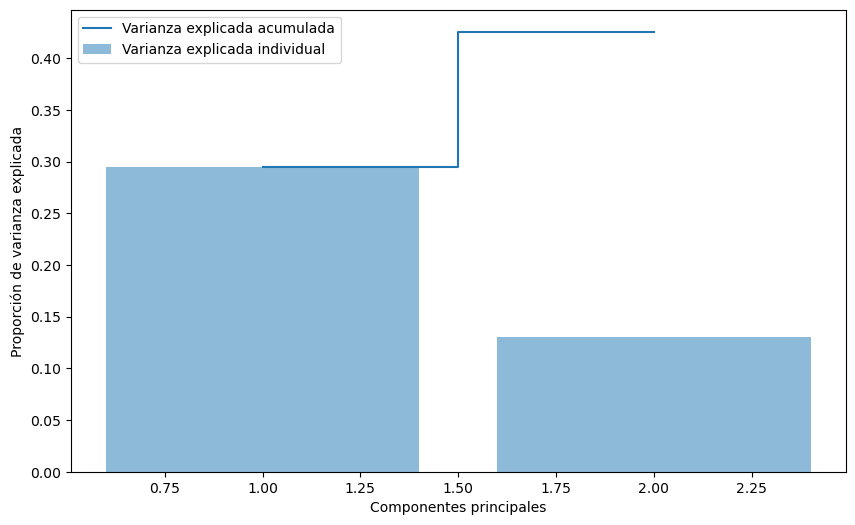

In [190]:
#Reducir la dimensionalidad de los datos
print(df_sm_re_trained.shape, ":forma del conjunto de datos normalizado")
pca_new = PCA(n_components = 2)
X_new_pca = pca_new.fit_transform(df_sm_re_trained[cols_predict])


#Crear un DataFrame con las componentes principales
X_new_pca_df = pd.DataFrame(data = X_new_pca, columns= [f"PCA{i}" for i in range(1, pca_new.n_components_ + 1)])
print(X_new_pca_df.shape, ":forma del conjunto de datos reducido por PCA")

#Analizar la varianza explicada por cada componente principal
explained_variance_new = pca_new.explained_variance_ratio_

print(f'Varianza explicada por cada componente principal: {explained_variance_new}')
print(f'Varianza total explicada: {np.sum(explained_variance_new)}')

#Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_new) + 1), explained_variance_new, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, len(explained_variance_new) + 1), np.cumsum(explained_variance_new), where='mid', label='Varianza explicada acumulada')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

Target_y
0.0    391926
1.0     32278
Name: count, dtype: int64
            PCA1      PCA2  Target_y
0      -0.221933 -0.407998       1.0
1       0.183123  0.420369       1.0
2       0.197193  0.105694       1.0
3       0.093279  0.473464       1.0
4       0.247007  0.134861       1.0
...          ...       ...       ...
424199 -0.261553 -0.393778       1.0
424200 -0.198251 -0.655146       1.0
424201 -0.367137 -0.113784       1.0
424202 -0.363034 -0.139275       1.0
424203 -0.263767 -0.258993       1.0

[424204 rows x 3 columns]


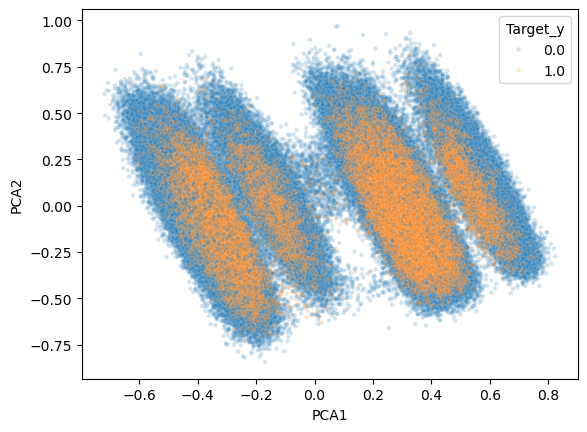

In [191]:
X_new_pca_df["Target_y"] = df_sm_re_trained["Target_y_1"].values
print(X_new_pca_df["Target_y"].value_counts())
print(X_new_pca_df)

sns.scatterplot(data=X_new_pca_df, x="PCA1", y="PCA2", hue="Target_y", alpha=0.2, s=10)
plt.show()

### REENTRENAMIENTO DEL MODELO CON LAS NUEVAS ETIQUETAS

### SEPARACION DEL SET EN ENTRENAMIENTO Y TESTEO

In [197]:
# Dividir en entrenamiento y prueba
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split( df_sm_re_trained[cols_predict] , df_sm_re_trained["Target_y_1"] , test_size= 0.15, random_state = random_seed)

print(X_new_train.shape, X_new_test.shape, y_new_train.shape, y_new_test.shape)

(360573, 28) (63631, 28) (360573,) (63631,)


In [198]:
print(y_new_test.value_counts())
y_new_test.value_counts() / y_new_test.shape[0] *100

Target_y_1
0.0    58881
1.0     4750
Name: count, dtype: int64


Target_y_1
0.0    92.535085
1.0     7.464915
Name: count, dtype: float64

In [199]:
print(loaded_model_grid.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 13, 'max_leaves': None, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': 2, 'num_parallel_tree': None, 'predictor': None, 'random_state': 32, 'reg_alpha': 0.05, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [200]:
#COPIA DEL MEJOR MODELO ENTRENADO PARA CAMBIAR ALGUNOS HIPERPARAMETROS
from sklearn.base import clone

# Clonar el modelo
model_re_trained = clone(loaded_model_grid)

In [201]:
## MODIFICACION DE ALGUNOS HIPERPARAMETROS DEL MODELO CON MEJOR DESEMPEÑO RECIEN COPIADO
#model_re_trained.set_params(eval_metric='auc')
print(model_re_trained.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 13, 'max_leaves': None, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': 2, 'num_parallel_tree': None, 'predictor': None, 'random_state': 32, 'reg_alpha': 0.05, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [202]:
model_re_trained.fit(X_new_train, y_new_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=2, num_parallel_tree=None,
              predictor=None, random_state=32, ...)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     58881
         1.0       0.99      0.92      0.95      4750

    accuracy                           0.99     63631
   macro avg       0.99      0.96      0.97     63631
weighted avg       0.99      0.99      0.99     63631

Accuracy: 0.9932580031745533


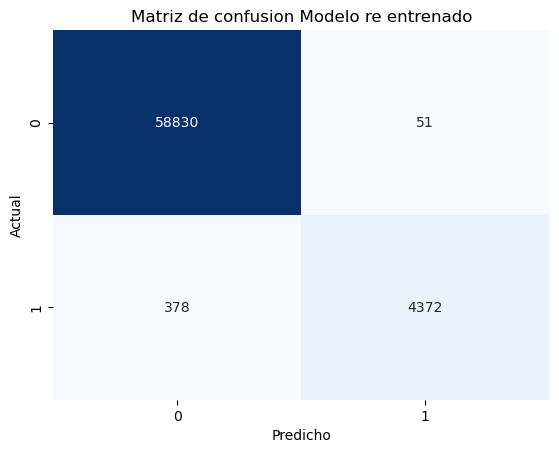

In [203]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob = best_random.predict(X_new_test)
#y_new_pred = (y_new_pred_prob > 0.5).astype(int)
y_new_pred = model_re_trained.predict(X_new_test)

# Reporte de clasificación
classification_report_new = classification_report(y_new_test, y_new_pred)
print(classification_report_new)
# Precisión del modelo
accuracy_new = accuracy_score(y_new_test, y_new_pred)
print('Accuracy:', accuracy_new)

# Calcular la matriz de confusión
cm_new = confusion_matrix(y_new_test, y_new_pred)

# Graficar la matriz de confusión
sns.heatmap(cm_new , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo re entrenado')
plt.show()

#### REVISION DEL NUEVO MODELO RE ENTRENADO CON LAS NUEVAS ETIQUETAS PREDICHAS EN EL SET SEPARADO PARA TESTEO

(3745, 28) : forma de la matriz separada para testeo final
              precision    recall  f1-score   support

           0       0.79      0.93      0.86      2514
           1       0.78      0.50      0.61      1231

    accuracy                           0.79      3745
   macro avg       0.79      0.72      0.73      3745
weighted avg       0.79      0.79      0.78      3745

Accuracy: 0.7901201602136182


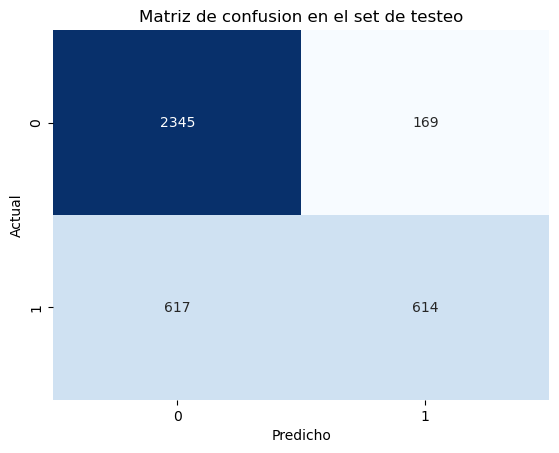

In [204]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob2 = modelo_re_entrando.predict(X_set_final)
#y_new_pred2 = (y_new_pred_prob > 0.5).astype(int)
print(X_set_final.shape, ": forma de la matriz separada para testeo final")
y_new_pred2 = model_re_trained.predict(X_set_final)
# Reporte de clasificación
cr_final2 = classification_report(y_set_final, y_new_pred2)
print(cr_final2)
# Precisión del modelo
accuracy_final2 = accuracy_score(y_set_final, y_new_pred2)
print('Accuracy:', accuracy_final2)

# Calcular la matriz de confusión
cm_final2 = confusion_matrix(y_set_final, y_new_pred2)

# Graficar la matriz de confusión
sns.heatmap(cm_final2 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion en el set de testeo')
plt.show()

#### PREDICCION DE NUEVAS ETIQUETAS CON EL MODELO RE ENTRENADO

In [205]:
predicts_clases = model_re_trained.predict_proba(df_sm[cols_predict])
predicts_clases

array([[9.99973655e-01, 2.63714192e-05],
       [9.99886632e-01, 1.13387701e-04],
       [9.99892473e-01, 1.07523214e-04],
       ...,
       [5.72204590e-06, 9.99994278e-01],
       [3.31407785e-03, 9.96685922e-01],
       [2.39921212e-01, 7.60078788e-01]], dtype=float32)

In [206]:
df_sm["prob_clase_neg_0"] = predicts_clases[:,0]
df_sm["prob_clase_pos_1"] = predicts_clases[:,1]
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [207]:
df_sm["Target_y_2"] = np.nan
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [208]:
trues_ceros = df_sm["prob_clase_neg_0"] > 0.85
indices_ceros = trues_ceros[trues_ceros].index
print(len(indices_ceros), "número de instancias que superan el umbral de 0.9 para la clase negativa")

735436 número de instancias que superan el umbral de 0.9 para la clase negativa


In [209]:
df_sm.loc[indices_ceros, "Target_y_2"] = 0

In [210]:
trues_unos = df_sm["prob_clase_pos_1"] > 0.85
indices_unos = trues_unos[trues_unos].index
print(len(indices_unos), "número de instancias que superan el umbral de 0.9 para la clase positiva")

75261 número de instancias que superan el umbral de 0.9 para la clase positiva


In [211]:
df_sm.loc[indices_unos, "Target_y_2"] = 1

In [212]:
print(df_sm["Target_y_2"].value_counts())
print(df_sm["Target_y_2"].value_counts() / df_sm[df_sm["Target_y_2"].notna()].shape[0]*100)

Target_y_2
0.0    735436
1.0     75261
Name: count, dtype: int64
Target_y_2
0.0    90.716507
1.0     9.283493
Name: count, dtype: float64


In [213]:
df_sm["Target_y_2"].isna().sum()

65914

### IDENTIFICACION DE ETIQUETAS DUPLICADAS PARA SER USADAS COMO RE ENTRENAMIENTO

In [214]:
print(df_sm["Target_y_2"].notna().sum(), ": n° de instancias con etiquetas nuevas")
print(df_sm[ (df_sm["Target_y_2"].notna()) & (df_sm["Target_y_1"].isna())].shape[0],": n° de instancias con etiquetas nuevas y sin etiquetas anteriores")
print(df_sm[["Target_y_2","Target_y_1"]].value_counts().sum(), ": n° de instancias con etiquetas nuevas y anteriores coincidentes")

810697 : n° de instancias con etiquetas nuevas
386950 : n° de instancias con etiquetas nuevas y sin etiquetas anteriores
423747 : n° de instancias con etiquetas nuevas y anteriores coincidentes


In [215]:
print(df_sm[["Target_y_2","Target_y_1"]].value_counts().sum())
print(df_sm[["Target_y_2","Target_y_1"]].value_counts().sort_index())

423747
Target_y_2  Target_y_1
0.0         0.0           391818
            1.0              238
1.0         0.0               21
            1.0            31670
Name: count, dtype: int64


In [216]:
df_c1_t2 = df_sm[ (df_sm["Target_y_2"]==1) & (df_sm["Target_y_1"]==1)]
df_c1_t2.shape

(31670, 34)

In [217]:
df_c0_t2 = df_sm[ (df_sm["Target_y_2"]==0) & (df_sm["Target_y_1"]==0)]
df_c0_t2.shape

(391818, 34)

In [218]:
df_nan_t2 = df_sm[df_sm["Target_y_2"].notna()]
indices_c0 = df_c0_t2.index
indices_c1 = df_c1_t2.index
indices_merge = indices_c0.append(indices_c1)
print(len(indices_merge))
df_nan_t2.drop(indices_merge, inplace=True)
print(df_nan_t2["Target_y_2"].value_counts())
df_nan_t2

423488
Target_y_2
0.0    343618
1.0     43591
Name: count, dtype: int64


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_29784/2219890568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_t2.drop(indices_merge, inplace=True)


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
38          38                  0.643980                         0.029264   
42          42                  0.602820                         0.035816   
45          45                  0.620625                         0.036467   
55          55                  0.634679                         0.044123   
64          64                  0.637052                         0.044819   
...        ...                       ...                              ...   
876598  876598                  0.615786                         0.091439   
876602  876602                  0.593109                         0.091711   
876603  876603                  0.718865                         0.091756   
876604  876604                  0.625601                         0.091847   
876609  876609                  0.705789                         0.097385   

        Porduccion del Turno  \
38                  0.719633   
42                  0.367938   
45                  0.192797   
55                  0.538136   
64                  0.766243   
...                      ...   
876598              0.343079   
876602              0.466349   
876603              0.412924   
876604              0.370162   
876609              0.283581   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
38                                               0.666428                               
42                                               0.431668                               
45                                               0.270960                               
55                                               0.596443                               
64                                               0.594521                               
...                                                   ...                               
876598                                           0.413792                               
876602                                           0.413836                               
876603                                           0.469968                               
876604                                           0.346174                               
876609                                           0.472962                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
38                                     0.19                        0.783375   
42                                     0.38                        0.350126   
45                                     0.09                        0.376574   
55                                     0.17                        0.826196   
64                                     0.19                        0.614610   
...                                     ...                             ...   
876598                                 0.54                        0.358942   
876602                                 0.28                        0.476071   
876603                                 0.32                        0.435768   
876604                                 0.48                        0.346348   
876609                                 0.66                        0.353904   

        Flujo Pico leche durante el ordeño  \
38                                0.406452   
42                                0.335484   
45                                0.270968   
55                                0.264516   
64                                0.400000   
...                                    ...   
876598                            0.406452   
876602                            0.329032   
876603                            0.329032   
876604                            0.367742   
876609                            0.367742   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
38                             

In [219]:
df_sm_re_trained = pd.concat([df_c1_t2, df_c0_t2, df_nan_t2])
print(df_sm_re_trained.shape)
print(df_sm_re_trained["Target_y_2"].value_counts())
print(df_sm_re_trained["Target_y_2"].value_counts() / df_sm_re_trained.shape[0]*100)
df_sm_re_trained

(810697, 34)
Target_y_2
0.0    735436
1.0     75261
Name: count, dtype: int64
Target_y_2
0.0    90.716507
1.0     9.283493
Name: count, dtype: float64


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
157        157                  0.678064                         0.098475   
419        419                  0.303557                         0.637438   
491        491                  0.381372                         0.675796   
1145      1145                  0.362915                         0.662798   
2475      2475                  0.359838                         0.678565   
...        ...                       ...                              ...   
876598  876598                  0.615786                         0.091439   
876602  876602                  0.593109                         0.091711   
876603  876603                  0.718865                         0.091756   
876604  876604                  0.625601                         0.091847   
876609  876609                  0.705789                         0.097385   

        Porduccion del Turno  \
157                 0.585099   
419                 0.439972   
491                 0.391243   
1145                0.608051   
2475                0.280014   
...                      ...   
876598              0.343079   
876602              0.466349   
876603              0.412924   
876604              0.370162   
876609              0.283581   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
157                                              0.490749                               
419                                              0.485297                               
491                                              0.322578                               
1145                                             0.492403                               
2475                                             0.516044                               
...                                                   ...                               
876598                                           0.413792                               
876602                                           0.413836                               
876603                                           0.469968                               
876604                                           0.346174                               
876609                                           0.472962                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
157                                    0.14                        0.841310   
419                                    0.38                        0.369018   
491                                    0.28                        0.434509   
1145                                   0.34                        0.467254   
2475                                   0.46                        0.382872   
...                                     ...                             ...   
876598                                 0.54                        0.358942   
876602                                 0.28                        0.476071   
876603                                 0.32                        0.435768   
876604                                 0.48                        0.346348   
876609                                 0.66                        0.353904   

        Flujo Pico leche durante el ordeño  \
157                               0.225806   
419                               0.419355   
491                               0.322581   
1145                              0.438710   
2475                              0.303226   
...                                    ...   
876598                            0.406452   
876602                            0.329032   
876603                            0.329032   
876604                            0.367742   
876609                            0.367742   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
157                            

### VERIFICACION DE LA UBICACION ESPACIAL DE LAS ETIQUETAS EN 2D

(810697, 34) :forma del conjunto de datos normalizado
(810697, 2) :forma del conjunto de datos reducido por PCA
Varianza explicada por cada componente principal: [0.28833949 0.12572614]
Varianza total explicada: 0.4140656221809133


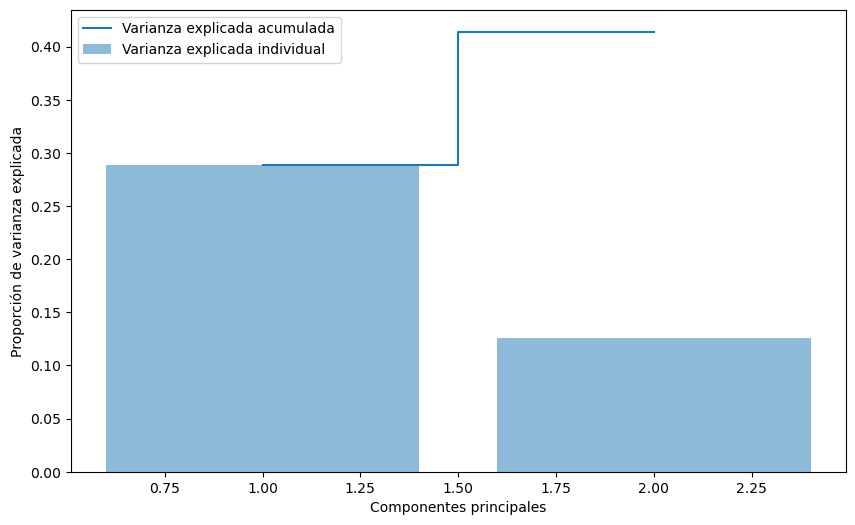

In [220]:
#Reducir la dimensionalidad de los datos
print(df_sm_re_trained.shape, ":forma del conjunto de datos normalizado")
pca = PCA(n_components = 2)
pca_news_labels = pca.fit_transform(df_sm_re_trained[cols_predict])


#Crear un DataFrame con las componentes principales
pca_news_labels = pd.DataFrame(data = pca_news_labels, columns= [f"PCA{i}" for i in range(1, pca.n_components_ + 1)])
print(pca_news_labels.shape, ":forma del conjunto de datos reducido por PCA")

#Analizar la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

print(f'Varianza explicada por cada componente principal: {explained_variance}')
print(f'Varianza total explicada: {np.sum(explained_variance)}')

#Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='Varianza explicada acumulada')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [221]:
print(df_sm_re_trained["Target_y_2"].value_counts())
print(df_sm_re_trained["Target_y_2"].value_counts() / df_sm_re_trained.shape[0]*100)
print(df_sm_re_trained.shape)

Target_y_2
0.0    735436
1.0     75261
Name: count, dtype: int64
Target_y_2
0.0    90.716507
1.0     9.283493
Name: count, dtype: float64
(810697, 34)


            PCA1      PCA2  Target_y
0      -0.550501  0.472516       1.0
1       0.256555  0.117305       1.0
2       0.206215  0.292835       1.0
3       0.182915  0.250055       1.0
4       0.309954  0.109575       1.0
...          ...       ...       ...
810692 -0.250810 -0.241795       0.0
810693 -0.352624  0.078477       0.0
810694 -0.393952  0.010719       0.0
810695 -0.288878 -0.172892       1.0
810696 -0.261885 -0.358088       1.0

[810697 rows x 3 columns]


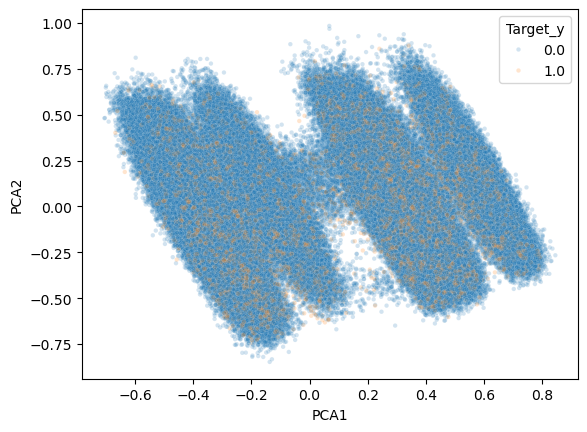

In [222]:
pca_news_labels["Target_y"] = df_sm_re_trained["Target_y_2"].values
print(pca_news_labels)

sns.scatterplot(data= pca_news_labels, x="PCA1", y="PCA2", hue="Target_y", alpha=0.2, s=10)
plt.show()

### REENTRENAMIENTO CON LAS NUEVAS ETIQUETAS RECIENTEMENTE AGREGADAS

In [223]:
print(df_sm_re_trained.shape)
print(df_sm_re_trained["Target_y_2"].isna().sum())

(810697, 34)
0


In [224]:
# Dividir en entrenamiento y prueba
X_new_train2, X_new_test2, y_new_train2, y_new_test2 = train_test_split( df_sm_re_trained[cols_predict] , df_sm_re_trained["Target_y_2"] , test_size= 0.15, random_state = random_seed)

print(X_new_train2.shape, X_new_test2.shape, y_new_train2.shape, y_new_test2.shape)

print(y_new_test2.value_counts())
y_new_test2.value_counts() / y_new_test2.shape[0] *100

(689092, 28) (121605, 28) (689092,) (121605,)
Target_y_2
0.0    110342
1.0     11263
Name: count, dtype: int64


Target_y_2
0.0    90.738045
1.0     9.261955
Name: count, dtype: float64

In [225]:
print(model_re_trained.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 13, 'max_leaves': None, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': 2, 'num_parallel_tree': None, 'predictor': None, 'random_state': 32, 'reg_alpha': 0.05, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [227]:
model_re_trained2 = model_re_trained.fit(X_new_train2, y_new_train2 )

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    110342
         1.0       0.99      0.93      0.96     11263

    accuracy                           0.99    121605
   macro avg       0.99      0.97      0.98    121605
weighted avg       0.99      0.99      0.99    121605

Accuracy: 0.9928045721804202


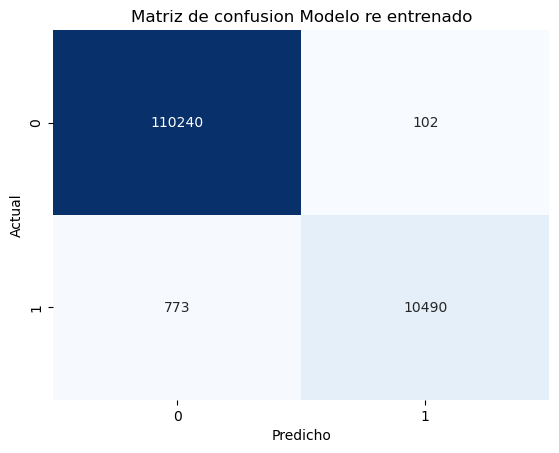

In [228]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob = best_random.predict(X_new_test)
#y_new_pred = (y_new_pred_prob > 0.5).astype(int)
y_new_pred2 = model_re_trained2.predict(X_new_test2)

# Reporte de clasificación
classification_report_new2 = classification_report(y_new_test2, y_new_pred2)
print(classification_report_new2)
# Precisión del modelo
accuracy_new2 = accuracy_score(y_new_test2, y_new_pred2)
print('Accuracy:', accuracy_new2)

# Calcular la matriz de confusión
cm_new2 = confusion_matrix(y_new_test2, y_new_pred2)

# Graficar la matriz de confusión
sns.heatmap(cm_new2 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo re entrenado')
plt.show()

(3745, 28) : forma de la matriz separada para testeo final
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      2514
           1       0.76      0.45      0.57      1231

    accuracy                           0.77      3745
   macro avg       0.77      0.69      0.71      3745
weighted avg       0.77      0.77      0.75      3745

Accuracy: 0.7722296395193592


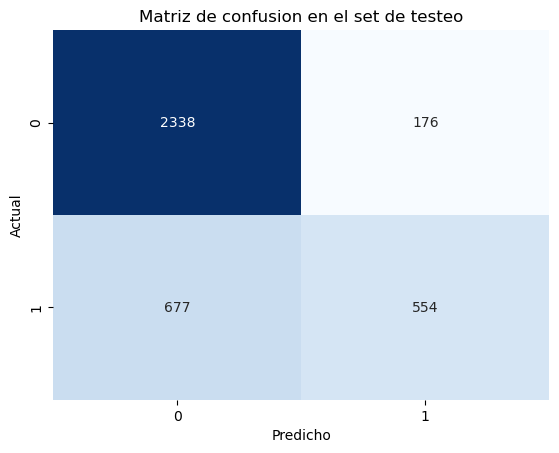

In [229]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob2 = modelo_re_entrando.predict(X_set_final)
#y_new_pred2 = (y_new_pred_prob > 0.5).astype(int)
print(X_set_final.shape, ": forma de la matriz separada para testeo final")
y_new_pred3 = model_re_trained2.predict(X_set_final)
# Reporte de clasificación
cr_final3 = classification_report(y_set_final, y_new_pred3)
print(cr_final3)
# Precisión del modelo
accuracy_final3 = accuracy_score(y_set_final, y_new_pred3)
print('Accuracy:', accuracy_final3)

# Calcular la matriz de confusión
cm_final3 = confusion_matrix(y_set_final, y_new_pred3)

# Graficar la matriz de confusión
sns.heatmap(cm_final3 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion en el set de testeo')
plt.show()

### PREDICCION DE LAS ETIQUETAS PENDIENTES

In [230]:
df_sm["Target_y_3"] = np.nan
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [231]:
predicts_clases = model_re_trained2.predict_proba(df_sm[cols_predict])
print(predicts_clases.shape)
predicts_clases

(876611, 2)


array([[9.9997830e-01, 2.1689557e-05],
       [9.9997509e-01, 2.4887333e-05],
       [9.9987745e-01, 1.2252074e-04],
       ...,
       [4.7683716e-07, 9.9999952e-01],
       [4.5317411e-04, 9.9954683e-01],
       [9.5662236e-02, 9.0433776e-01]], dtype=float32)

In [232]:
df_sm["prob_clase_neg_0"] = predicts_clases[:,0]
df_sm["prob_clase_pos_1"] = predicts_clases[:,1]
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [233]:
trues_ceros = df_sm["prob_clase_neg_0"] > 0.8
indices_ceros = trues_ceros[trues_ceros].index
print(len(indices_ceros), "número de instancias que superan el umbral de 0.9 para la clase negativa")

770084 número de instancias que superan el umbral de 0.9 para la clase negativa


In [234]:
df_sm.loc[indices_ceros, "Target_y_3"] = 0

In [235]:
trues_unos = df_sm["prob_clase_pos_1"] > 0.8
indices_unos = trues_unos[trues_unos].index
print(len(indices_unos), "número de instancias que superan el umbral de 0.85 para la clase positiva")

82915 número de instancias que superan el umbral de 0.85 para la clase positiva


In [236]:
df_sm.loc[indices_unos, "Target_y_3"] = 1

In [237]:
print(df_sm["Target_y_3"].value_counts())
print(df_sm["Target_y_3"].value_counts() / df_sm[df_sm["Target_y_3"].notna()].shape[0]*100)

Target_y_3
0.0    770084
1.0     82915
Name: count, dtype: int64
Target_y_3
0.0    90.27959
1.0     9.72041
Name: count, dtype: float64


### IDENTIFICACION DE ETIQUETAS DUPLICADAS PARA SER USADAS COMO RE ENTRENAMIENTO

In [239]:
print(df_sm[["Target_y_3","Target_y_2"]].value_counts().sort_index())

Target_y_3  Target_y_2
0.0         0.0           735154
            1.0              443
1.0         0.0               53
            1.0            73889
Name: count, dtype: int64


In [240]:
df_c1_t3 = df_sm[ (df_sm["Target_y_3"]==1) & (df_sm["Target_y_2"]==1)]
df_c1_t3.shape

(73889, 35)

In [241]:
df_c0_t3 = df_sm[ (df_sm["Target_y_3"]==0) & (df_sm["Target_y_2"]==0)]
df_c0_t3.shape

(735154, 35)

In [242]:
df_nan_t3 = df_sm[df_sm["Target_y_3"].notna()]
indices_c0 = df_c0_t3.index
indices_c1 = df_c1_t3.index
indices_merge = indices_c0.append(indices_c1)
print(len(indices_merge))
df_nan_t3.drop(indices_merge, inplace=True)
print(df_nan_t3["Target_y_3"].value_counts())
df_nan_t3

809043
Target_y_3
0.0    34930
1.0     9026
Name: count, dtype: int64


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_29784/357076645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_t3.drop(indices_merge, inplace=True)


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
148        148                  0.656086                         0.091166   
154        154                  0.670354                         0.097945   
401        401                  0.342875                         0.630372   
425        425                  0.237519                         0.638028   
437        437                  0.376011                         0.646835   
...        ...                       ...                              ...   
876590  876590                  0.661539                         0.090909   
876591  876591                  0.771124                         0.090924   
876595  876595                  0.726151                         0.091166   
876601  876601                  0.602748                         0.091605   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
148                 0.408545   
154                 0.518715   
401                 0.503884   
425                 0.252119   
437                 0.428319   
...                      ...   
876590              0.291419   
876591              0.333828   
876595              0.243326   
876601              0.434993   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
148                                              0.449053                               
154                                              0.475778                               
401                                              0.605783                               
425                                              0.412719                               
437                                              0.396317                               
...                                                   ...                               
876590                                           0.496157                               
876591                                           0.511128                               
876595                                           0.387960                               
876601                                           0.349169                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
148                                    0.16                        0.668766   
154                                    0.25                        0.559194   
401                                    0.30                        0.598237   
425                                    0.56                        0.293451   
437                                    0.40                        0.420655   
...                                     ...                             ...   
876590                                 0.57                        0.283375   
876591                                 0.44                        0.317380   
876595                                 0.59                        0.302267   
876601                                 0.45                        0.313602   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
148                               0.219355   
154                               0.296774   
401                               0.387097   
425                               0.303226   
437                               0.425806   
...                                    ...   
876590                            0.380645   
876591                            0.361290   
876595                            0.380645   
876601                            0.541935   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
148                            

In [243]:
df_sm_re_trained = pd.concat([df_c1_t3, df_c0_t3, df_nan_t3])
print(df_sm_re_trained.shape)
print(df_sm_re_trained["Target_y_3"].value_counts())
print(df_sm_re_trained["Target_y_3"].value_counts() / df_sm_re_trained.shape[0]*100)
df_sm_re_trained

(852999, 35)
Target_y_3
0.0    770084
1.0     82915
Name: count, dtype: int64
Target_y_3
0.0    90.27959
1.0     9.72041
Name: count, dtype: float64


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
157        157                  0.678064                         0.098475   
330        330                  0.070989                         0.597991   
418        418                  0.343578                         0.637317   
419        419                  0.303557                         0.637438   
488        488                  0.300480                         0.670833   
...        ...                       ...                              ...   
876590  876590                  0.661539                         0.090909   
876591  876591                  0.771124                         0.090924   
876595  876595                  0.726151                         0.091166   
876601  876601                  0.602748                         0.091605   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
157                 0.585099   
330                 0.279308   
418                 0.289195   
419                 0.439972   
488                 0.326977   
...                      ...   
876590              0.291419   
876591              0.333828   
876595              0.243326   
876601              0.434993   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
157                                              0.490749                               
330                                              0.556668                               
418                                              0.426797                               
419                                              0.485297                               
488                                              0.537674                               
...                                                   ...                               
876590                                           0.496157                               
876591                                           0.511128                               
876595                                           0.387960                               
876601                                           0.349169                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
157                                    0.14                        0.841310   
330                                    0.49                        0.498741   
418                                    0.60                        0.264484   
419                                    0.38                        0.369018   
488                                    0.36                        0.433249   
...                                     ...                             ...   
876590                                 0.57                        0.283375   
876591                                 0.44                        0.317380   
876595                                 0.59                        0.302267   
876601                                 0.45                        0.313602   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
157                               0.225806   
330                               0.296774   
418                               0.354839   
419                               0.419355   
488                               0.277419   
...                                    ...   
876590                            0.380645   
876591                            0.361290   
876595                            0.380645   
876601                            0.541935   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
157                            

In [244]:
print(df_sm["Target_y_3"].value_counts())
print(df_sm["Target_y_3"].value_counts() / df_sm[df_sm["Target_y_3"].notna()].shape[0]*100)
print(df_sm[df_sm["Target_y_3"].notna()].shape)

Target_y_3
0.0    770084
1.0     82915
Name: count, dtype: int64
Target_y_3
0.0    90.27959
1.0     9.72041
Name: count, dtype: float64
(852999, 35)


### REENTRENAMIENTO CON LAS NUEVAS ETIQUETAS RECIENTEMENTE AGREGADAS

In [247]:
# Dividir en entrenamiento y prueba
X_new_train3, X_new_test3, y_new_train3, y_new_test3 = train_test_split( df_sm_re_trained[cols_predict] , df_sm_re_trained["Target_y_3"] , test_size= 0.15, random_state = random_seed)

print(X_new_train3.shape, X_new_test3.shape, y_new_train3.shape, y_new_test3.shape)


print(y_new_test3.value_counts())
y_new_test3.value_counts() / y_new_test3.shape[0] *100

(725049, 28) (127950, 28) (725049,) (127950,)
Target_y_3
0.0    115435
1.0     12515
Name: count, dtype: int64


Target_y_3
0.0    90.218835
1.0     9.781165
Name: count, dtype: float64

In [248]:
print(model_re_trained2.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 13, 'max_leaves': None, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': 2, 'num_parallel_tree': None, 'predictor': None, 'random_state': 32, 'reg_alpha': 0.05, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [250]:
model_re_trained3 = model_re_trained2.fit(X_new_train3, y_new_train3 )

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    115435
         1.0       0.99      0.92      0.95     12515

    accuracy                           0.99    127950
   macro avg       0.99      0.96      0.97    127950
weighted avg       0.99      0.99      0.99    127950

Accuracy: 0.9912465806955842


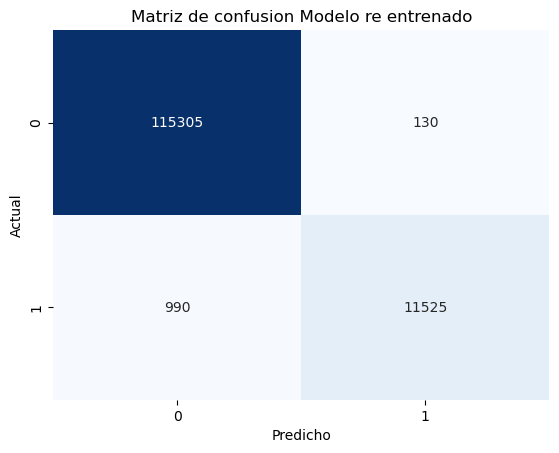

In [251]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob = best_random.predict(X_new_test)
#y_new_pred = (y_new_pred_prob > 0.5).astype(int)
y_new_pred3 = model_re_trained3.predict(X_new_test3)

# Reporte de clasificación
classification_report_new3 = classification_report(y_new_test3, y_new_pred3)
print(classification_report_new3)
# Precisión del modelo
accuracy_new3 = accuracy_score(y_new_test3, y_new_pred3)
print('Accuracy:', accuracy_new3)

# Calcular la matriz de confusión
cm_new3 = confusion_matrix(y_new_test3, y_new_pred3)

# Graficar la matriz de confusión
sns.heatmap(cm_new3 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo re entrenado')
plt.show()

(3745, 28) : forma de la matriz separada para testeo final
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      2514
           1       0.75      0.44      0.55      1231

    accuracy                           0.77      3745
   macro avg       0.76      0.68      0.70      3745
weighted avg       0.77      0.77      0.75      3745

Accuracy: 0.7682242990654206


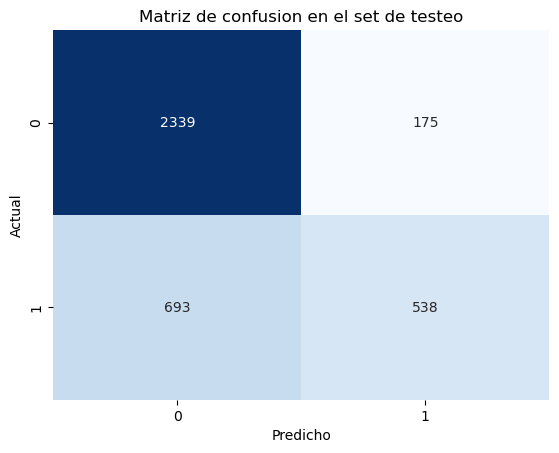

In [252]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob2 = modelo_re_entrando.predict(X_set_final)
#y_new_pred2 = (y_new_pred_prob > 0.5).astype(int)
print(X_set_final.shape, ": forma de la matriz separada para testeo final")
y_new_pred4 = model_re_trained3.predict(X_set_final)
# Reporte de clasificación
cr_final4 = classification_report(y_set_final, y_new_pred4)
print(cr_final4)
# Precisión del modelo
accuracy_final4 = accuracy_score(y_set_final, y_new_pred4)
print('Accuracy:', accuracy_final4)

# Calcular la matriz de confusión
cm_final4 = confusion_matrix(y_set_final, y_new_pred4)

# Graficar la matriz de confusión
sns.heatmap(cm_final4 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion en el set de testeo')
plt.show()

### PREDICCION DE LAS ETIQUETAS PENDIENTES

In [253]:
umbral = 0.75

In [254]:
df_sm["Target_y_4"] = np.nan
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [255]:
predicts_clases = model_re_trained3.predict_proba(df_sm[cols_predict])
print(predicts_clases.shape)
predicts_clases

(876611, 2)


array([[9.9999607e-01, 3.9284869e-06],
       [9.9999529e-01, 4.7378289e-06],
       [9.9998701e-01, 1.2975400e-05],
       ...,
       [1.0728836e-06, 9.9999893e-01],
       [2.3430586e-04, 9.9976569e-01],
       [1.3167083e-02, 9.8683292e-01]], dtype=float32)

In [256]:
df_sm["prob_clase_neg_0"] = predicts_clases[:,0]
df_sm["prob_clase_pos_1"] = predicts_clases[:,1]
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [257]:
trues_ceros = df_sm["prob_clase_neg_0"] > umbral
indices_ceros = trues_ceros[trues_ceros].index
print(len(indices_ceros), "número de instancias que superan el umbral de 0.9 para la clase negativa")

779612 número de instancias que superan el umbral de 0.9 para la clase negativa


In [258]:
df_sm.loc[indices_ceros, "Target_y_4"] = 0

In [259]:
trues_unos = df_sm["prob_clase_pos_1"] > umbral
indices_unos = trues_unos[trues_unos].index
print(len(indices_unos), "número de instancias que superan el umbral de 0.85 para la clase positiva")

84451 número de instancias que superan el umbral de 0.85 para la clase positiva


In [260]:
df_sm.loc[indices_unos, "Target_y_4"] = 1

In [261]:
print(df_sm["Target_y_4"].value_counts())
print(df_sm["Target_y_4"].value_counts() / df_sm[df_sm["Target_y_4"].notna()].shape[0]*100)

Target_y_4
0.0    779612
1.0     84451
Name: count, dtype: int64
Target_y_4
0.0    90.226291
1.0     9.773709
Name: count, dtype: float64


### IDENTIFICACION DE ETIQUETAS DUPLICADAS PARA SER USADAS COMO RE ENTRENAMIENTO

In [263]:
print(df_sm[["Target_y_4","Target_y_3","Target_y_2","Target_y_1"]].value_counts().sort_index())

Target_y_4  Target_y_3  Target_y_2  Target_y_1
0.0         0.0         0.0         0.0           391622
                                    1.0              238
                        1.0         1.0              382
            1.0         1.0         1.0              433
1.0         0.0         0.0         0.0               45
            1.0         0.0         0.0               47
                        1.0         0.0               21
                                    1.0            30325
Name: count, dtype: int64


In [264]:
df_c1_t4 = df_sm[ (df_sm["Target_y_4"]==1) & (df_sm["Target_y_3"]==1)]
df_c1_t4.shape

(81258, 36)

In [265]:
df_c0_t4 = df_sm[ (df_sm["Target_y_4"]==0) & (df_sm["Target_y_3"]==0)]
df_c0_t4.shape

(769702, 36)

In [266]:
df_nan_t4 = df_sm[df_sm["Target_y_4"].notna()]
indices_c0 = df_c0_t4.index
indices_c1 = df_c1_t4.index
indices_merge = indices_c0.append(indices_c1)
print(len(indices_merge))
df_nan_t4.drop(indices_merge, inplace=True)
print(df_nan_t4["Target_y_4"].value_counts())
df_nan_t4

850960
Target_y_4
0.0    9910
1.0    3193
Name: count, dtype: int64


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_29784/901269939.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_t4.drop(indices_merge, inplace=True)


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
1225      1225                  0.353832                         0.700853   
1843      1843                  0.293537                         0.679170   
2159      2159                  0.622290                         0.101032   
2302      2302                  0.737505                         0.417610   
2370      2370                  0.420837                         0.624259   
...        ...                       ...                              ...   
876328  876328                  0.581756                         0.031564   
876329  876329                  0.656657                         0.031685   
876411  876411                  0.570315                         0.049495   
876492  876492                  0.682941                         0.066926   
876563  876563                  0.721845                         0.085023   

        Porduccion del Turno  \
1225                0.285311   
1843                0.316031   
2159                0.514831   
2302                0.433969   
2370                0.355226   
...                      ...   
876328              0.412218   
876329              0.392973   
876411              0.311017   
876492              0.403637   
876563              0.341314   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
1225                                             0.859805                               
1843                                             0.515821                               
2159                                             0.330667                               
2302                                             0.513050                               
2370                                             0.581427                               
...                                                   ...                               
876328                                           0.440651                               
876329                                           0.365615                               
876411                                           0.463935                               
876492                                           0.445611                               
876563                                           0.491822                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
1225                                   0.84                        0.278338   
1843                                   0.19                        0.536524   
2159                                   0.50                        0.363980   
2302                                   0.22                        0.542821   
2370                                   0.42                        0.404282   
...                                     ...                             ...   
876328                                 0.67                        0.267003   
876329                                 0.54                        0.301008   
876411                                 0.26                        0.487406   
876492                                 0.54                        0.345088   
876563                                 0.30                        0.619647   

        Flujo Pico leche durante el ordeño  \
1225                              0.464516   
1843                              0.206452   
2159                              0.554839   
2302                              0.290323   
2370                              0.329032   
...                                    ...   
876328                            0.503226   
876329                            0.651613   
876411                            0.290323   
876492                            0.561290   
876563                            0.245161   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
1225                           

In [267]:
df_sm_re_trained = pd.concat([df_c1_t4, df_c0_t4, df_nan_t4])
print(df_sm_re_trained.shape)
print(df_sm_re_trained["Target_y_4"].value_counts())
print(df_sm_re_trained["Target_y_4"].value_counts() / df_sm_re_trained.shape[0]*100)
df_sm_re_trained

(864063, 36)
Target_y_4
0.0    779612
1.0     84451
Name: count, dtype: int64
Target_y_4
0.0    90.226291
1.0     9.773709
Name: count, dtype: float64


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
157        157                  0.678064                         0.098475   
330        330                  0.070989                         0.597991   
418        418                  0.343578                         0.637317   
419        419                  0.303557                         0.637438   
487        487                  0.442957                         0.670818   
...        ...                       ...                              ...   
876328  876328                  0.581756                         0.031564   
876329  876329                  0.656657                         0.031685   
876411  876411                  0.570315                         0.049495   
876492  876492                  0.682941                         0.066926   
876563  876563                  0.721845                         0.085023   

        Porduccion del Turno  \
157                 0.585099   
330                 0.279308   
418                 0.289195   
419                 0.439972   
487                 0.595339   
...                      ...   
876328              0.412218   
876329              0.392973   
876411              0.311017   
876492              0.403637   
876563              0.341314   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
157                                              0.490749                               
330                                              0.556668                               
418                                              0.426797                               
419                                              0.485297                               
487                                              0.544870                               
...                                                   ...                               
876328                                           0.440651                               
876329                                           0.365615                               
876411                                           0.463935                               
876492                                           0.445611                               
876563                                           0.491822                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
157                                    0.14                        0.841310   
330                                    0.49                        0.498741   
418                                    0.60                        0.264484   
419                                    0.38                        0.369018   
487                                    0.48                        0.333753   
...                                     ...                             ...   
876328                                 0.67                        0.267003   
876329                                 0.54                        0.301008   
876411                                 0.26                        0.487406   
876492                                 0.54                        0.345088   
876563                                 0.30                        0.619647   

        Flujo Pico leche durante el ordeño  \
157                               0.225806   
330                               0.296774   
418                               0.354839   
419                               0.419355   
487                               0.600000   
...                                    ...   
876328                            0.503226   
876329                            0.651613   
876411                            0.290323   
876492                            0.561290   
876563                            0.245161   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
157                            

### REENTRENAMIENTO CON LAS NUEVAS ETIQUETAS RECIENTEMENTE AGREGADAS

In [270]:
print(df_sm["Target_y_4"].value_counts())
print(df_sm[df_sm["Target_y_4"].notna()].shape)
print(df_sm[df_sm["Target_y_4"].isna()].shape)

Target_y_4
0.0    779612
1.0     84451
Name: count, dtype: int64
(864063, 36)
(12548, 36)


In [271]:
# Dividir en entrenamiento y prueba
X_new_train4, X_new_test4, y_new_train4, y_new_test4 = train_test_split( df_sm_re_trained[cols_predict] , df_sm_re_trained["Target_y_4"] , test_size= 0.15, random_state = random_seed)

print(X_new_train4.shape, X_new_test4.shape, y_new_train4.shape, y_new_test4.shape)


print(y_new_test4.value_counts())
y_new_test4.value_counts() / y_new_test4.shape[0] *100

(734453, 28) (129610, 28) (734453,) (129610,)
Target_y_4
0.0    116958
1.0     12652
Name: count, dtype: int64


Target_y_4
0.0    90.238408
1.0     9.761592
Name: count, dtype: float64

In [272]:
print(model_re_trained3.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 13, 'max_leaves': None, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': 2, 'num_parallel_tree': None, 'predictor': None, 'random_state': 32, 'reg_alpha': 0.05, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [274]:
model_re_trained4 = model_re_trained3.fit(X_new_train4, y_new_train4 )

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    116958
         1.0       0.98      0.90      0.94     12652

    accuracy                           0.99    129610
   macro avg       0.99      0.95      0.97    129610
weighted avg       0.99      0.99      0.99    129610

Accuracy: 0.9891520715994137


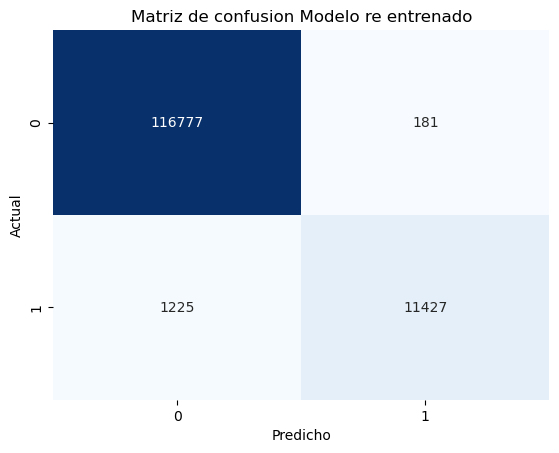

In [275]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob = best_random.predict(X_new_test)
#y_new_pred = (y_new_pred_prob > 0.5).astype(int)
y_new_pred4 = model_re_trained4.predict(X_new_test4)

# Reporte de clasificación
classification_report_new4 = classification_report(y_new_test4, y_new_pred4)
print(classification_report_new4)
# Precisión del modelo
accuracy_new4 = accuracy_score(y_new_test4, y_new_pred4)
print('Accuracy:', accuracy_new4)

# Calcular la matriz de confusión
cm_new4 = confusion_matrix(y_new_test4, y_new_pred4)

# Graficar la matriz de confusión
sns.heatmap(cm_new4 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo re entrenado')
plt.show()

(3745, 28) : forma de la matriz separada para testeo final
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      2514
           1       0.75      0.42      0.54      1231

    accuracy                           0.76      3745
   macro avg       0.76      0.68      0.69      3745
weighted avg       0.76      0.76      0.74      3745

Accuracy: 0.7639519359145527


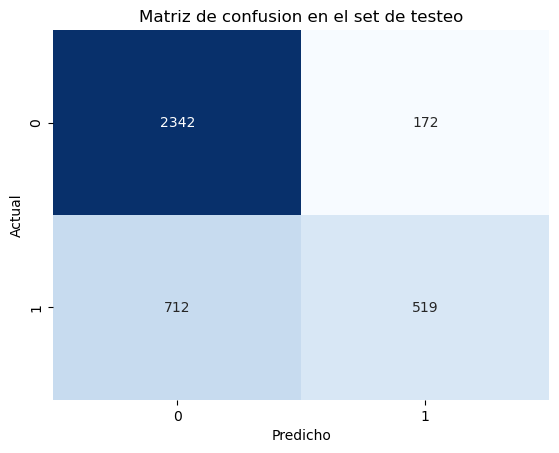

In [276]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob2 = modelo_re_entrando.predict(X_set_final)
#y_new_pred2 = (y_new_pred_prob > 0.5).astype(int)
print(X_set_final.shape, ": forma de la matriz separada para testeo final")
y_new_pred5 = model_re_trained4.predict(X_set_final)
# Reporte de clasificación
cr_final5 = classification_report(y_set_final, y_new_pred5)
print(cr_final5)
# Precisión del modelo
accuracy_final5 = accuracy_score(y_set_final, y_new_pred5)
print('Accuracy:', accuracy_final5)

# Calcular la matriz de confusión
cm_final5 = confusion_matrix(y_set_final, y_new_pred5)

# Graficar la matriz de confusión
sns.heatmap(cm_final5 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion en el set de testeo')
plt.show()

### PREDICCION DE LAS ETIQUETAS PENDIENTES

In [277]:
umbral = 0.7

In [278]:
df_sm["Target_y_5"] = np.nan
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [279]:
predicts_clases = model_re_trained4.predict_proba(df_sm[cols_predict])
print(predicts_clases.shape)
predicts_clases

(876611, 2)


array([[9.9999285e-01, 7.1756535e-06],
       [9.9999636e-01, 3.6237275e-06],
       [9.9998909e-01, 1.0878961e-05],
       ...,
       [4.7683716e-07, 9.9999952e-01],
       [1.7970800e-04, 9.9982029e-01],
       [4.0846962e-01, 5.9153038e-01]], dtype=float32)

In [280]:
df_sm["prob_clase_neg_0"] = predicts_clases[:,0]
df_sm["prob_clase_pos_1"] = predicts_clases[:,1]
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [281]:
trues_ceros = df_sm["prob_clase_neg_0"] > umbral
indices_ceros = trues_ceros[trues_ceros].index
print(len(indices_ceros), "número de instancias que superan el umbral de 0.9 para la clase negativa")

784585 número de instancias que superan el umbral de 0.9 para la clase negativa


In [282]:
df_sm.loc[indices_ceros, "Target_y_5"] = 0

In [283]:
trues_unos = df_sm["prob_clase_pos_1"] > umbral
indices_unos = trues_unos[trues_unos].index
print(len(indices_unos), "número de instancias que superan el umbral de 0.85 para la clase positiva")

84856 número de instancias que superan el umbral de 0.85 para la clase positiva


In [284]:
df_sm.loc[indices_unos, "Target_y_5"] = 1

In [285]:
print(df_sm["Target_y_5"].value_counts())
print(df_sm["Target_y_5"].value_counts() / df_sm[df_sm["Target_y_5"].notna()].shape[0]*100)

Target_y_5
0.0    784585
1.0     84856
Name: count, dtype: int64
Target_y_5
0.0    90.240166
1.0     9.759834
Name: count, dtype: float64


In [287]:
trues = df_sm[ (df_sm["Target_y_5"].isna())]["Target_y_4"] == df_sm[ (df_sm["Target_y_5"].isna())]["Target_y_3"]
indices = trues[trues].index
print(len(indices), "número de instancias que coinciden las etiquetas anteriores")
df_sm.loc[indices]

1001 número de instancias que coinciden las etiquetas anteriores


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
3676      3676                  0.330101                         0.622307   
3843      3843                  0.429187                         0.702533   
4246      4246                  0.716278                         0.191926   
6977      6977                  0.377681                         0.614817   
8766      8766                  0.678513                         0.093466   
...        ...                       ...                              ...   
875662  875662                  0.382544                         0.614484   
875822  875822                  0.412692                         0.656867   
875869  875869                  0.352660                         0.671635   
876495  876495                  0.641539                         0.067077   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
3676                0.336864   
3843                0.386299   
4246                0.757062   
6977                0.433616   
8766                0.545551   
...                      ...   
875662              0.220516   
875822              0.303178   
875869              0.127895   
876495              0.358404   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
3676                                             0.590052                               
3843                                             0.536870                               
4246                                             0.509162                               
6977                                             0.483152                               
8766                                             0.448025                               
...                                                   ...                               
875662                                           0.392206                               
875822                                           0.392251                               
875869                                           0.376788                               
876495                                           0.433768                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
3676                                   0.63                        0.270781   
3843                                   0.45                        0.350126   
4246                                   0.32                        0.797229   
6977                                   0.55                        0.333753   
8766                                   0.23                        0.541562   
...                                     ...                             ...   
875662                                 0.63                        0.280856   
875822                                 0.57                        0.270781   
875869                                 0.79                        0.220403   
876495                                 0.32                        0.404282   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
3676                              0.458065   
3843                              0.361290   
4246                              0.554839   
6977                              0.529032   
8766                              0.329032   
...                                    ...   
875662                            0.322581   
875822                            0.393548   
875869                            0.200000   
876495                            0.380645   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
3676                           

### IDENTIFICACION DE ETIQUETAS DUPLICADAS PARA SER USADAS COMO RE ENTRENAMIENTO

In [288]:
#EVOLUCION DE LAS PREDICCIONES DE LAS ETIQUETAS 
print(df_sm[["Target_y_5","Target_y_4","Target_y_3","Target_y_2","Target_y_1"]].value_counts().sort_index())

Target_y_5  Target_y_4  Target_y_3  Target_y_2  Target_y_1
0.0         0.0         0.0         0.0         0.0           391543
                                                1.0              238
                                    1.0         1.0              382
                        1.0         1.0         1.0              430
            1.0         1.0         0.0         0.0                1
                                    1.0         1.0              424
1.0         0.0         0.0         0.0         0.0               47
            1.0         0.0         0.0         0.0               45
                        1.0         0.0         0.0               45
                                    1.0         0.0               21
                                                1.0            29723
Name: count, dtype: int64


In [289]:
df_c1_t5 = df_sm[ (df_sm["Target_y_5"]==1) & (df_sm["Target_y_4"]==1)]
df_c1_t5.shape

(82721, 37)

In [290]:
df_c0_t5 = df_sm[ (df_sm["Target_y_5"]==0) & (df_sm["Target_y_4"]==0)]
df_c0_t5.shape

(779202, 37)

In [291]:
df_nan_t5 = df_sm[df_sm["Target_y_5"].notna()]
indices_c0 = df_c0_t5.index
indices_c1 = df_c1_t5.index
indices_merge = indices_c0.append(indices_c1)
print(len(indices_merge))
df_nan_t5.drop(indices_merge, inplace=True)
print(df_nan_t5["Target_y_5"].value_counts())
df_nan_t5

861923
Target_y_5
0.0    5383
1.0    2135
Name: count, dtype: int64


/var/folders/tj/2p_x5tgj0l352mp4vhh7mt9c0000gn/T/ipykernel_29784/461345015.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_t5.drop(indices_merge, inplace=True)


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
149        149                  0.686183                         0.091242   
416        416                  0.335785                         0.637150   
417        417                  0.452274                         0.637272   
486        486                  0.379966                         0.670757   
783        783                  0.537443                         0.072071   
...        ...                       ...                              ...   
876326  876326                  0.639136                         0.028023   
876330  876330                  0.617221                         0.031791   
876444  876444                  0.710946                         0.055729   
876560  876560                  0.655645                         0.084932   
876564  876564                  0.676315                         0.085129   

        Porduccion del Turno  \
149                 0.412782   
416                 0.398658   
417                 0.634181   
486                 0.529661   
783                 0.540254   
...                      ...   
876326              0.349506   
876330              0.363383   
876444              0.467797   
876560              0.368750   
876564              0.354838   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
149                                              0.438550                               
416                                              0.396988                               
417                                              0.532624                               
486                                              0.462058                               
783                                              0.370218                               
...                                                   ...                               
876326                                           0.377100                               
876330                                           0.442036                               
876444                                           0.421121                               
876560                                           0.409546                               
876564                                           0.326376                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
149                                    0.43                        0.362720   
416                                    0.40                        0.440806   
417                                    0.36                        0.523929   
486                                    0.31                        0.578086   
783                                    0.33                        0.493703   
...                                     ...                             ...   
876326                                 0.59                        0.299748   
876330                                 0.37                        0.443325   
876444                                 0.62                        0.317380   
876560                                 0.30                        0.415617   
876564                                 0.67                        0.338791   

        Flujo Pico leche durante el ordeño  \
149                               0.432258   
416                               0.322581   
417                               0.412903   
486                               0.400000   
783                               0.374194   
...                                    ...   
876326                            0.393548   
876330                            0.400000   
876444                            0.670968   
876560                            0.451613   
876564                            0.548387   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
149                            

In [292]:
df_sm_re_trained = pd.concat([df_c1_t5, df_c0_t5, df_nan_t5])
print(df_sm_re_trained.shape)
print(df_sm_re_trained["Target_y_4"].value_counts())
print(df_sm_re_trained["Target_y_4"].value_counts() / df_sm_re_trained.shape[0]*100)
df_sm_re_trained

(869441, 37)
Target_y_4
0.0    779290
1.0     83560
Name: count, dtype: int64
Target_y_4
0.0    89.631154
1.0     9.610773
Name: count, dtype: float64


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
157        157                  0.678064                         0.098475   
330        330                  0.070989                         0.597991   
418        418                  0.343578                         0.637317   
419        419                  0.303557                         0.637438   
487        487                  0.442957                         0.670818   
...        ...                       ...                              ...   
876326  876326                  0.639136                         0.028023   
876330  876330                  0.617221                         0.031791   
876444  876444                  0.710946                         0.055729   
876560  876560                  0.655645                         0.084932   
876564  876564                  0.676315                         0.085129   

        Porduccion del Turno  \
157                 0.585099   
330                 0.279308   
418                 0.289195   
419                 0.439972   
487                 0.595339   
...                      ...   
876326              0.349506   
876330              0.363383   
876444              0.467797   
876560              0.368750   
876564              0.354838   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
157                                              0.490749                               
330                                              0.556668                               
418                                              0.426797                               
419                                              0.485297                               
487                                              0.544870                               
...                                                   ...                               
876326                                           0.377100                               
876330                                           0.442036                               
876444                                           0.421121                               
876560                                           0.409546                               
876564                                           0.326376                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
157                                    0.14                        0.841310   
330                                    0.49                        0.498741   
418                                    0.60                        0.264484   
419                                    0.38                        0.369018   
487                                    0.48                        0.333753   
...                                     ...                             ...   
876326                                 0.59                        0.299748   
876330                                 0.37                        0.443325   
876444                                 0.62                        0.317380   
876560                                 0.30                        0.415617   
876564                                 0.67                        0.338791   

        Flujo Pico leche durante el ordeño  \
157                               0.225806   
330                               0.296774   
418                               0.354839   
419                               0.419355   
487                               0.600000   
...                                    ...   
876326                            0.393548   
876330                            0.400000   
876444                            0.670968   
876560                            0.451613   
876564                            0.548387   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
157                            

In [293]:
print(df_sm[df_sm["Target_y_5"].isna()].shape)
df_sm[df_sm["Target_y_5"].isna()]

(7170, 37)


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
402        402                  0.299036                         0.630614   
420        420                  0.341849                         0.637453   
1113      1113                  0.337718                         0.648363   
1221      1221                  0.400152                         0.700672   
1844      1844                  0.292717                         0.679548   
...        ...                       ...                              ...   
876386  876386                  0.657301                         0.043533   
876447  876447                  0.701922                         0.055820   
876495  876495                  0.641539                         0.067077   
876604  876604                  0.625601                         0.091847   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
402                 0.557203   
420                 0.395480   
1113                0.474223   
1221                0.432910   
1844                0.324859   
...                      ...   
876386              0.318856   
876447              0.276448   
876495              0.358404   
876604              0.370162   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
402                                              0.598990                               
420                                              0.476180                               
1113                                             0.502860                               
1221                                             0.420093                               
1844                                             0.610207                               
...                                                   ...                               
876386                                           0.404764                               
876447                                           0.404362                               
876495                                           0.433768                               
876604                                           0.346174                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
402                                    0.42                        0.375315   
420                                    0.18                        0.682620   
1113                                   0.40                        0.396725   
1221                                   0.62                        0.302267   
1844                                   0.38                        0.481108   
...                                     ...                             ...   
876386                                 0.73                        0.298489   
876447                                 0.96                        0.207809   
876495                                 0.32                        0.404282   
876604                                 0.48                        0.346348   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
402                               0.567742   
420                               0.212903   
1113                              0.419355   
1221                              0.535484   
1844                              0.296774   
...                                    ...   
876386                            0.587097   
876447                            0.619355   
876495                            0.380645   
876604                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
402                            

### REENTRENAMIENTO CON LAS NUEVAS ETIQUETAS RECIENTEMENTE AGREGADAS

In [295]:
print(df_sm["Target_y_5"].value_counts())
print(df_sm[df_sm["Target_y_5"].notna()].shape)
print(df_sm[df_sm["Target_y_5"].isna()].shape)

Target_y_5
0.0    784585
1.0     84856
Name: count, dtype: int64
(869441, 37)
(7170, 37)


In [296]:
# Dividir en entrenamiento y prueba
X_new_train5, X_new_test5, y_new_train5, y_new_test5 = train_test_split( df_sm_re_trained[cols_predict] , df_sm_re_trained["Target_y_5"] , test_size= 0.15, random_state = random_seed)

print(X_new_train5.shape, X_new_test5.shape, y_new_train5.shape, y_new_test5.shape)


print(y_new_test5.value_counts())
y_new_test5.value_counts() / y_new_test5.shape[0] *100

(739024, 28) (130417, 28) (739024,) (130417,)
Target_y_5
0.0    117632
1.0     12785
Name: count, dtype: int64


Target_y_5
0.0    90.19683
1.0     9.80317
Name: count, dtype: float64

In [297]:
print(model_re_trained4.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.9, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'auc', 'feature_types': None, 'gamma': 0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 13, 'max_leaves': None, 'min_child_weight': 0.5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': 2, 'num_parallel_tree': None, 'predictor': None, 'random_state': 32, 'reg_alpha': 0.05, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [299]:
model_re_trained5 = model_re_trained4.fit(X_new_train5, y_new_train5 )

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    117632
         1.0       0.98      0.90      0.94     12785

    accuracy                           0.99    130417
   macro avg       0.99      0.95      0.97    130417
weighted avg       0.99      0.99      0.99    130417

Accuracy: 0.9887054601777375


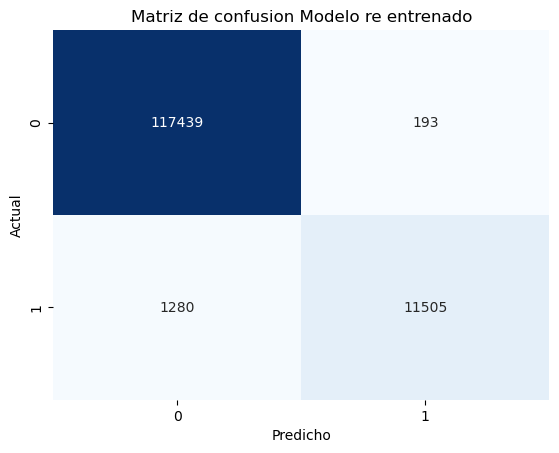

In [300]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob = best_random.predict(X_new_test)
#y_new_pred = (y_new_pred_prob > 0.5).astype(int)
y_new_pred5 = model_re_trained5.predict(X_new_test5)

# Reporte de clasificación
classification_report_new5 = classification_report(y_new_test5, y_new_pred5)
print(classification_report_new5)
# Precisión del modelo
accuracy_new5 = accuracy_score(y_new_test5, y_new_pred5)
print('Accuracy:', accuracy_new5)

# Calcular la matriz de confusión
cm_new5 = confusion_matrix(y_new_test5, y_new_pred5)

# Graficar la matriz de confusión
sns.heatmap(cm_new5 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion Modelo re entrenado')
plt.show()

(3745, 28) : forma de la matriz separada para testeo final
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      2514
           1       0.75      0.41      0.53      1231

    accuracy                           0.76      3745
   macro avg       0.76      0.67      0.69      3745
weighted avg       0.76      0.76      0.74      3745

Accuracy: 0.7618157543391189


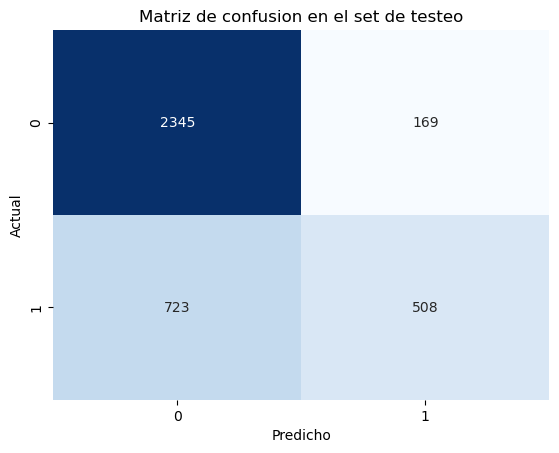

In [301]:
# Predicciones en el conjunto de prueba
#y_new_pred_prob2 = modelo_re_entrando.predict(X_set_final)
#y_new_pred2 = (y_new_pred_prob > 0.5).astype(int)
print(X_set_final.shape, ": forma de la matriz separada para testeo final")
y_new_pred6 = model_re_trained5.predict(X_set_final)
# Reporte de clasificación
cr_final6 = classification_report(y_set_final, y_new_pred6)
print(cr_final6)
# Precisión del modelo
accuracy_final6 = accuracy_score(y_set_final, y_new_pred6)
print('Accuracy:', accuracy_final6)

# Calcular la matriz de confusión
cm_final6 = confusion_matrix(y_set_final, y_new_pred6)

# Graficar la matriz de confusión
sns.heatmap(cm_final6 , annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Matriz de confusion en el set de testeo')
plt.show()

### PREDICCION DE LAS ETIQUETAS PENDIENTES

In [302]:
umbral = 0.7

In [303]:
df_sm["Target_y_6"] = np.nan
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [304]:
predicts_clases = model_re_trained5.predict_proba(df_sm[cols_predict])
print(predicts_clases.shape)
predicts_clases

(876611, 2)


array([[9.9999595e-01, 4.0331552e-06],
       [9.9999583e-01, 4.1933331e-06],
       [9.9998736e-01, 1.2651895e-05],
       ...,
       [1.1920929e-06, 9.9999881e-01],
       [2.5969744e-04, 9.9974030e-01],
       [1.4702249e-01, 8.5297751e-01]], dtype=float32)

In [305]:
df_sm["prob_clase_neg_0"] = predicts_clases[:,0]
df_sm["prob_clase_pos_1"] = predicts_clases[:,1]
df_sm

index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
0            0                  0.613985                         0.011364   
1            1                  0.629175                         0.011379   
2            2                  0.625928                         0.011485   
3            3                  0.611878                         0.011621   
4            4                  0.637168                         0.011697   
...        ...                       ...                              ...   
876606  876606                  0.681706                         0.092574   
876607  876607                  0.689777                         0.097204   
876608  876608                  0.603217                         0.097249   
876609  876609                  0.705789                         0.097385   
876610  876610                  0.678894                         0.097400   

        Porduccion del Turno  \
0                   0.633828   
1                   0.558969   
2                   0.441737   
3                   0.499294   
4                   0.522246   
...                      ...   
876606              0.317090   
876607              0.303884   
876608              0.306038   
876609              0.283581   
876610              0.415395   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
0                                                0.774401                               
1                                                0.435109                               
2                                                0.762156                               
3                                                0.471934                               
4                                                0.535529                               
...                                                   ...                               
876606                                           0.407714                               
876607                                           0.381033                               
876608                                           0.438506                               
876609                                           0.472962                               
876610                                           0.461477                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
0                                      0.29                        0.535264   
1                                      0.23                        0.556675   
2                                      0.35                        0.399244   
3                                      0.36                        0.452141   
4                                      0.20                        0.707809   
...                                     ...                             ...   
876606                                 0.37                        0.376574   
876607                                 0.38                        0.382872   
876608                                 0.56                        0.273300   
876609                                 0.66                        0.353904   
876610                                 0.64                        0.421914   

        Flujo Pico leche durante el ordeño  \
0                                 0.393548   
1                                 0.341935   
2                                 0.374194   
3                                 0.451613   
4                                 0.277419   
...                                    ...   
876606                            0.387097   
876607                            0.451613   
876608                            0.361290   
876609                            0.367742   
876610                            0.580645   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
0                              

In [306]:
trues_ceros = df_sm["prob_clase_neg_0"] > umbral
indices_ceros = trues_ceros[trues_ceros].index
print(len(indices_ceros), "número de instancias que superan el umbral de 0.9 para la clase negativa")

787086 número de instancias que superan el umbral de 0.9 para la clase negativa


In [307]:
df_sm.loc[indices_ceros, "Target_y_6"] = 0

In [308]:
trues_unos = df_sm["prob_clase_pos_1"] > umbral
indices_unos = trues_unos[trues_unos].index
print(len(indices_unos), "número de instancias que superan el umbral de 0.85 para la clase positiva")

84108 número de instancias que superan el umbral de 0.85 para la clase positiva


In [309]:
df_sm.loc[indices_unos, "Target_y_6"] = 1

In [310]:
print(df_sm["Target_y_6"].value_counts())
print(df_sm["Target_y_6"].value_counts() / df_sm[df_sm["Target_y_6"].notna()].shape[0]*100)

Target_y_6
0.0    787086
1.0     84108
Name: count, dtype: int64
Target_y_6
0.0    90.345664
1.0     9.654336
Name: count, dtype: float64


In [311]:
df_sm["Target_y_6"].isna().sum()

5417

In [312]:
trues = df_sm[ (df_sm["Target_y_6"].isna())]["Target_y_5"] == df_sm[ (df_sm["Target_y_6"].isna())]["Target_y_4"]
indices = trues[trues].index
print(len(indices), "número de instancias que coinciden las etiquetas anteriores")
df_sm.loc[indices]

1131 número de instancias que coinciden las etiquetas anteriores


index  lapso_sgdos_a_ordeña_ant  Hora inicio del ordeño en sgdos  \
7505      7505                  0.682175                         0.135698   
7784      7784                  0.356000                         0.674056   
8767      8767                  0.756240                         0.093572   
11218    11218                  0.411432                         0.717725   
13679    13679                  0.752837                         0.402993   
...        ...                       ...                              ...   
875648  875648                  0.332445                         0.609233   
875691  875691                  0.331185                         0.620930   
875732  875732                  0.430915                         0.633141   
876087  876087                  0.297053                         0.860610   
876210  876210                  0.261514                         0.916793   

        Porduccion del Turno  \
7505                0.437500   
7784                0.459040   
8767                0.629237   
11218               0.463277   
13679               0.572740   
...                      ...   
875648              0.218044   
875691              0.242267   
875732              0.256144   
876087              0.285734   
876210              0.263983   

        Diferencia entre el rendimiento de las ultimas 24 Horas y el promedio semanal  \
7505                                             0.511262                               
7784                                             0.493028                               
8767                                             0.515642                               
11218                                            0.428137                               
13679                                            0.600241                               
...                                                   ...                               
875648                                           0.442841                               
875691                                           0.346219                               
875732                                           0.454460                               
876087                                           0.405568                               
876210                                           0.412898                               

        Porcentaje de leche a los 2 minutos  duracion en sgdos total ordeño  \
7505                                   0.35                        0.433249   
7784                                   0.44                        0.360202   
8767                                   0.25                        0.541562   
11218                                  0.39                        0.345088   
13679                                  0.50                        0.332494   
...                                     ...                             ...   
875648                                 0.96                        0.197733   
875691                                 0.61                        0.306045   
875732                                 0.95                        0.187657   
876087                                 0.34                        0.356423   
876210                                 0.54                        0.323678   

        Flujo Pico leche durante el ordeño  \
7505                              0.361290   
7784                              0.438710   
8767                              0.406452   
11218                             0.496774   
13679                             0.606452   
...                                    ...   
875648                            0.664516   
875691                            0.367742   
875732                            0.535484   
876087                            0.309677   
876210                            0.296774   

        Cambio máxima en la conductividad en desviaciones estándar en los últimos tres turnos  \
7505                           

In [318]:
df_sm[df_sm["Target_y_6"].isna()].sort_values(["prob_clase_pos_1"], ascending=False)[["prob_clase_pos_1","prob_clase_neg_0"]]

prob_clase_pos_1  prob_clase_neg_0
619507          0.699563          0.300437
709293          0.699547          0.300453
360242          0.699542          0.300458
429165          0.699337          0.300663
146083          0.699182          0.300818
...                  ...               ...
558237          0.300192          0.699808
37342           0.300124          0.699876
633411          0.300091          0.699909
334930          0.300048          0.699952
184262          0.300039          0.699961

[5417 rows x 2 columns]

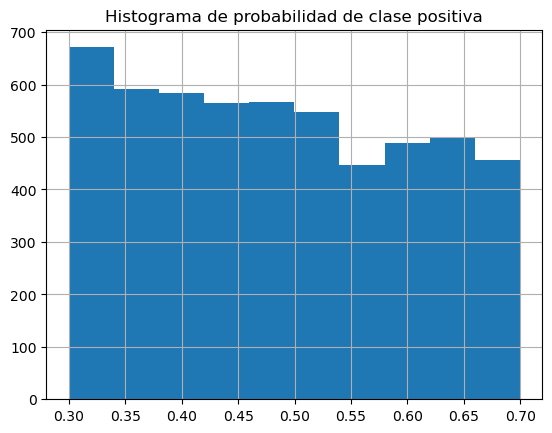

In [320]:
df_sm[df_sm["Target_y_6"].isna()]["prob_clase_pos_1"].hist()
plt.title("Histograma de probabilidad de clase positiva")
plt.show()

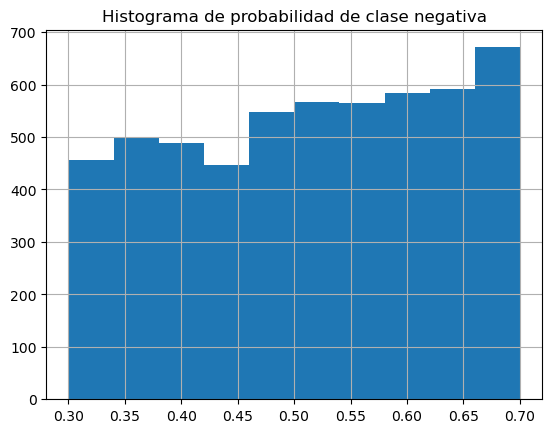

In [322]:
df_sm[df_sm["Target_y_6"].isna()]["prob_clase_neg_0"].hist()
plt.title("Histograma de probabilidad de clase negativa")
plt.show()

### CONFIRMANDO LAS DIMENSIONES DEL DATASET ENTRENADO Y EL DATASET ORIGINAL (EN SU ORDEN)
#### (para luego agregar la ultima prediccion y los target del modelo al set original)

In [326]:
df["Target_y_6"] = df_sm["Target_y_6"]
df["Target_y_6"].value_counts()

Target_y_6
0.0    787086
1.0     84108
Name: count, dtype: int64

In [330]:
df[df["Target_y_6"].isna()]["Target_y"].value_counts()

Target_y
0    5267
1      81
2      69
Name: count, dtype: int64

In [ ]:
os.getcwd()

'/Users/mfernandez9120/Library/CloudStorage/Dropbox/MARCOS FERNANDEZ/Magister Data Science/Proyecto de Grado 2/Proyecto-Grado-DS/BD procesada y sample/version 2'

In [331]:
df.to_csv("df_semi_supervisado.csv", index=False, sep=";", decimal=",", float_format="%.3f", date_format="%Y-%m-%d")